# Multi-variate Linear Regression on Boston Dataset

In [1]:
# This is a code to implement multivariate linear regression on boston dataset from scratch

# ===================================Importing libraries======================================================
import numpy as np                                    #for handling arrays and matrices
import pandas as pd                                   #for working with datasets and dataframes
from matplotlib import pyplot as plt                  #for visualisation purposes
from sklearn.datasets import load_boston              #importing the boston dataset from scikit-learn  

from sklearn.linear_model import LinearRegression     #to compare our results with standard library results
from sklearn.model_selection import train_test_split  #to split the dataset into test and train 

In [2]:
# loading dataset from sklearn
dataset = load_boston()                               #loading the contents of the dictionary-dataset into 'dataset'
print(dataset.keys())                                 #displaying the keys of the dictionary dataset

#=====================================DATASET INFORMATION======================================================
#data-input data
#target- results of each sample stored in the target variable
#feature_names- attribute names/column names in the input data
#DESCR- description of the dataset

print(dataset['feature_names'])                       #printing the names of the features

print(dataset.data.shape)                             #printing the shape (dimensional size) of the input data
print(dataset.target.shape)                           #printing the size of target variable
print(dataset.DESCR)                                  #describing the dataset

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD 

In [3]:
# storing features in x and target variable in y
x = dataset.data
y = dataset.target

y = y.reshape(y.shape[0], 1)

# converting into a dataframe
df = pd.DataFrame(x)
df.columns = dataset.feature_names
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [4]:
#adding target variable to our dataframe
df['PRICE'] = y

# =========================finding correlation between attributes and target variable=========================
print(np.corrcoef(np.transpose(df))[-1, :])

df.head()

[-0.38583169  0.36044534 -0.48372516  0.17526018 -0.42732077  0.69535995
 -0.37695457  0.24992873 -0.38162623 -0.46853593 -0.50778669  0.33346082
 -0.73766273  1.        ]


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [5]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [6]:
# =======================================normalising the dataset============================================

df =(df - df.mean()) / df.std()
df.head()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.417300  0.284548 -1.286636 -0.272329 -0.144075  0.413263 -0.119895   
1 -0.414859 -0.487240 -0.592794 -0.272329 -0.739530  0.194082  0.366803   
2 -0.414861 -0.487240 -0.592794 -0.272329 -0.739530  1.281446 -0.265549   
3 -0.414270 -0.487240 -1.305586 -0.272329 -0.834458  1.015298 -0.809088   
4 -0.410003 -0.487240 -1.305586 -0.272329 -0.834458  1.227362 -0.510674   

        DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
0  0.140075 -0.981871 -0.665949 -1.457558  0.440616 -1.074499  0.159528  
1  0.556609 -0.867024 -0.986353 -0.302794  0.440616 -0.491953 -0.101424  
2  0.556609 -0.867024 -0.986353 -0.302794  0.396035 -1.207532  1.322937  
3  1.076671 -0.752178 -1.105022  0.112920  0.415751 -1.360171  1.181589  
4  1.076671 -0.752178 -1.105022  0.112920  0.440616 -1.025487  1.486032

In [7]:
#===================================MULTI-VARIATE LINEAR REGRESSION=========================================

# ===================================INITIALISING HYPER-PARAMETERS==========================================
# Hyper-parameters for a multi-variate linear regression are: 
#  1. Theta (weights) which describe the line
#  2. epochs- number of times we run our linear regression to minimise the loss
#  3. alpha- the learning rate


# initialising theta with zeros 
theta = np.zeros((1, x.shape[1] + 1)) #its dimensions are (1,14) because of the presence of a bias term (intercept)
print(theta.shape)
print(theta)

#Both epoch and alpha can be changed and tested on different numbers to minimise loss at a different rate(Advisable)
epoch = 200000
alpha = 0.000001 

# creating bias vector x0
x0 = np.ones((x.shape[0], 1))

# forming input variable
X = np.concatenate((x0, x), axis = 1)
print(X.shape)

(1, 14)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(506, 14)


In [8]:
# =================================splitting the data into train and test====================================

def train_test_splitt(dataset, ratio = 0.7):
    m = len(df)
    
    #if ratio to be divided is given in percentage, multiply with 0.01
    if ratio > 1:
        train_ratio = int(ratio * 0.01 * m)
    else:
        train_ratio = int(ratio * m)

    x_train = dataset[:train_ratio, :-1]
    x_test = dataset[train_ratio: , :-1]
    
    y_train = dataset[:train_ratio, -1:]
    y_test = dataset[train_ratio: , -1:]
    
    return x_train, x_test, y_train, y_test

# data = np.concatenate((X, y), axis = 1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# x_train, x_test, y_train, y_test = train_test_split(data)
y_train = y_train.reshape((y_train.shape[0], 1))
y_test = y_test.reshape((y_test.shape[0], 1))

print(df.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(506, 14)
(354, 14)
(152, 14)
(354, 1)
(152, 1)


In [9]:
# ======================================= DEFINING COST FUNCTION ============================================
def cost_function(X, y, theta):
    h = X.dot(theta.T)
    loss = h - y
    return np.sum(loss ** 2)/ (2 * len(X))

# For testing the function
cost = cost_function(x_train, y_train, theta)
print(cost)

308.8122316384181


In [10]:
# ====================================== DEFINING GRADIENT DESCENT =============================================
def grad_descent(X, y, theta, alpha):
    h = X.dot(theta.T)
    loss = h - y
    dj = (loss.T).dot(X)
    theta = theta - (alpha/len(X)) * dj
    return theta

# For testing the function 
cost = cost_function(x_train, y_train, theta)
print("Cost before: ", cost)

theta = grad_descent(x_train, y_train, theta, 0.0000001)

cost = cost_function(x_train, y_train, theta)
print("Cost after: ", cost)

Cost before:  308.8122316384181
Cost after:  293.9748649185804


In [11]:
# =================================== DEFINING OUR LINEAR REGRESSION =======================================
def linear_reg(epoch, X, y, theta, alpha):
    for ep in range(epoch):
        
        #calculate new theta
        theta = grad_descent(X, y, theta, alpha)
        
        #compute new loss
        loss = cost_function(X, y, theta)
        print("Cost function: ", loss)
        
    return theta

theta = linear_reg(epoch, x_train, y_train, theta, alpha)

Cost function:  174.5423273098458
Cost function:  117.76124665361907
Cost function:  90.47124747892367
Cost function:  77.07607517656588
Cost function:  70.23981394284262
Cost function:  66.51137800220695
Cost function:  64.2667369556045
Cost function:  62.741156109527495
Cost function:  61.57406366188878
Cost function:  60.595002959832996
Cost function:  59.722965536763276
Cost function:  58.9190464485983
Cost function:  58.16417680368044
Cost function:  57.448649998556085
Cost function:  56.7671945209823
Cost function:  56.116655329679624
Cost function:  55.49490209077319
Cost function:  54.90031445457542
Cost function:  54.33153876590878
Cost function:  53.787372480727555
Cost function:  53.26670869277906
Cost function:  52.76850897803664
Cost function:  52.29178960311077
Cost function:  51.83561406295807
Cost function:  51.39908863760106
Cost function:  50.98135940921255
Cost function:  50.58161000478376
Cost function:  50.19905971712903
Cost function:  49.83296183930924
Cost funct

Cost function:  41.066188720861106
Cost function:  41.06311770989169
Cost function:  41.060049484263025
Cost function:  41.056984020032075
Cost function:  41.053921294174664
Cost function:  41.05086128454571
Cost function:  41.0478039698413
Cost function:  41.04474932956228
Cost function:  41.041697343979536
Cost function:  41.038647994100735
Cost function:  41.03560126163848
Cost function:  41.03255712897991
Cost function:  41.02951557915756
Cost function:  41.02647659582156
Cost function:  41.02344016321296
Cost function:  41.02040626613825
Cost function:  41.01737488994498
Cost function:  41.01434602049847
Cost function:  41.01131964415951
Cost function:  41.00829574776294
Cost function:  41.005274318597344
Cost function:  41.00225534438548
Cost function:  40.99923881326557
Cost function:  40.99622471377351
Cost function:  40.99321303482568
Cost function:  40.99020376570269
Cost function:  40.987196896033666
Cost function:  40.984192415781344
Cost function:  40.981190315227714
Cost 

Cost function:  40.03181967713859
Cost function:  40.02946881357146
Cost function:  40.02711939973816
Cost function:  40.024771433990296
Cost function:  40.022424914681835
Cost function:  40.02007984016904
Cost function:  40.017736208810476
Cost function:  40.01539401896705
Cost function:  40.01305326900195
Cost function:  40.01071395728067
Cost function:  40.00837608217101
Cost function:  40.00603964204308
Cost function:  40.00370463526922
Cost function:  40.00137106022414
Cost function:  39.99903891528478
Cost function:  39.99670819883037
Cost function:  39.99437890924243
Cost function:  39.99205104490475
Cost function:  39.98972460420339
Cost function:  39.98739958552666
Cost function:  39.985075987265176
Cost function:  39.98275380781176
Cost function:  39.98043304556153
Cost function:  39.97811369891185
Cost function:  39.97579576626231
Cost function:  39.973479246014776
Cost function:  39.971164136573336
Cost function:  39.96885043634433
Cost function:  39.96653814373634
Cost fun

Cost function:  39.24494288551064
Cost function:  39.24303480668538
Cost function:  39.24112769799571
Cost function:  39.23922155845123
Cost function:  39.23731638706283
Cost function:  39.235412182842744
Cost function:  39.23350894480449
Cost function:  39.23160667196291
Cost function:  39.22970536333412
Cost function:  39.22780501793559
Cost function:  39.22590563478606
Cost function:  39.22400721290557
Cost function:  39.22210975131548
Cost function:  39.220213249038416
Cost function:  39.218317705098315
Cost function:  39.21642311852041
Cost function:  39.21452948833122
Cost function:  39.21263681355855
Cost function:  39.21074509323149
Cost function:  39.20885432638042
Cost function:  39.206964512037004
Cost function:  39.205075649234175
Cost function:  39.203187737006154
Cost function:  39.20130077438844
Cost function:  39.19941476041782
Cost function:  39.197529694132314
Cost function:  39.195645574571245
Cost function:  39.193762400775206
Cost function:  39.191880171786046
Cost

Cost function:  38.80254530321614
Cost function:  38.8008489789004
Cost function:  38.799153416260296
Cost function:  38.797458614576044
Cost function:  38.79576457312877
Cost function:  38.7940712912005
Cost function:  38.7923787680742
Cost function:  38.79068700303369
Cost function:  38.78899599536374
Cost function:  38.78730574435
Cost function:  38.78561624927904
Cost function:  38.783927509438314
Cost function:  38.782239524116186
Cost function:  38.78055229260191
Cost function:  38.778865814185664
Cost function:  38.77718008815849
Cost function:  38.77549511381233
Cost function:  38.773810890440046
Cost function:  38.77212741733536
Cost function:  38.77044469379289
Cost function:  38.76876271910818
Cost function:  38.7670814925776
Cost function:  38.765401013498476
Cost function:  38.76372128116895
Cost function:  38.7620422948881
Cost function:  38.76036405395587
Cost function:  38.758686557673094
Cost function:  38.757009805341454
Cost function:  38.75533379626356
Cost function

Cost function:  38.255166532861764
Cost function:  38.25369687136294
Cost function:  38.25222776832662
Cost function:  38.25075922328137
Cost function:  38.24929123575636
Cost function:  38.24782380528126
Cost function:  38.24635693138632
Cost function:  38.24489061360233
Cost function:  38.24342485146064
Cost function:  38.24195964449312
Cost function:  38.240494992232215
Cost function:  38.239030894210906
Cost function:  38.23756734996273
Cost function:  38.23610435902175
Cost function:  38.2346419209226
Cost function:  38.23318003520042
Cost function:  38.231718701390925
Cost function:  38.230257919030365
Cost function:  38.22879768765552
Cost function:  38.22733800680373
Cost function:  38.22587887601285
Cost function:  38.224420294821286
Cost function:  38.22296226276799
Cost function:  38.22150477939245
Cost function:  38.22004784423467
Cost function:  38.21859145683521
Cost function:  38.21713561673518
Cost function:  38.21568032347617
Cost function:  38.21422557660038
Cost func

Cost function:  37.8532702341593
Cost function:  37.851943901665365
Cost function:  37.850618011924325
Cost function:  37.84929256459584
Cost function:  37.84796755933994
Cost function:  37.84664299581701
Cost function:  37.8453188736878
Cost function:  37.843995192613455
Cost function:  37.842671952255465
Cost function:  37.8413491522757
Cost function:  37.840026792336396
Cost function:  37.83870487210016
Cost function:  37.83738339122995
Cost function:  37.8360623493891
Cost function:  37.834741746241335
Cost function:  37.8334215814507
Cost function:  37.832101854681625
Cost function:  37.830782565598916
Cost function:  37.82946371386773
Cost function:  37.8281452991536
Cost function:  37.82682732112239
Cost function:  37.82550977944035
Cost function:  37.82419267377411
Cost function:  37.822876003790626
Cost function:  37.82155976915725
Cost function:  37.82024396954164
Cost function:  37.81892860461188
Cost function:  37.81761367403635
Cost function:  37.81629917748387
Cost functi

Cost function:  37.38188699458332
Cost function:  37.380706370187184
Cost function:  37.379526082637334
Cost function:  37.378346131703545
Cost function:  37.37716651715585
Cost function:  37.37598723876446
Cost function:  37.37480829629986
Cost function:  37.37362968953275
Cost function:  37.37245141823401
Cost function:  37.371273482174814
Cost function:  37.37009588112651
Cost function:  37.3689186148607
Cost function:  37.367741683149205
Cost function:  37.36656508576405
Cost function:  37.365388822477506
Cost function:  37.36421289306205
Cost function:  37.363037297290404
Cost function:  37.36186203493549
Cost function:  37.36068710577047
Cost function:  37.359512509568724
Cost function:  37.35833824610384
Cost function:  37.35716431514966
Cost function:  37.35599071648021
Cost function:  37.35481744986975
Cost function:  37.353644515092775
Cost function:  37.35247191192399
Cost function:  37.35129964013833
Cost function:  37.35012769951093
Cost function:  37.34895608981714
Cost f

Cost function:  37.02337633648491
Cost function:  37.022292045693625
Cost function:  37.02120802877622
Cost function:  37.02012428556199
Cost function:  37.019040815880345
Cost function:  37.01795761956088
Cost function:  37.01687469643334
Cost function:  37.01579204632761
Cost function:  37.01470966907374
Cost function:  37.013627564501924
Cost function:  37.012545732442526
Cost function:  37.011464172726036
Cost function:  37.01038288518312
Cost function:  37.00930186964459
Cost function:  37.0082211259414
Cost function:  37.00714065390467
Cost function:  37.00606045336567
Cost function:  37.00498052415581
Cost function:  37.00390086610667
Cost function:  37.00282147904996
Cost function:  37.00174236281755
Cost function:  37.00066351724148
Cost function:  36.99958494215391
Cost function:  36.99850663738716
Cost function:  36.99742860277372
Cost function:  36.9963508381462
Cost function:  36.99527334333738
Cost function:  36.9941961181802
Cost function:  36.99311916250772
Cost functio

Cost function:  36.56565744976721
Cost function:  36.5646801552539
Cost function:  36.56370307158284
Cost function:  36.56272619863714
Cost function:  36.5617495363
Cost function:  36.560773084454745
Cost function:  36.55979684298477
Cost function:  36.558820811773565
Cost function:  36.55784499070473
Cost function:  36.55686937966193
Cost function:  36.55589397852898
Cost function:  36.554918787189706
Cost function:  36.553943805528085
Cost function:  36.55296903342818
Cost function:  36.55199447077412
Cost function:  36.55102011745017
Cost function:  36.55004597334064
Cost function:  36.549072038329975
Cost function:  36.54809831230268
Cost function:  36.547124795143375
Cost function:  36.546151486736754
Cost function:  36.54517838696763
Cost function:  36.54420549572086
Cost function:  36.54323281288145
Cost function:  36.54226033833446
Cost function:  36.541288071965056
Cost function:  36.5403160136585
Cost function:  36.53934416330012
Cost function:  36.538372520775376
Cost functi

Cost function:  36.20395986655974
Cost function:  36.203055911713015
Cost function:  36.20215212882295
Cost function:  36.201248517802604
Cost function:  36.20034507856507
Cost function:  36.19944181102352
Cost function:  36.19853871509118
Cost function:  36.19763579068134
Cost function:  36.19673303770736
Cost function:  36.195830456082646
Cost function:  36.19492804572071
Cost function:  36.19402580653507
Cost function:  36.193123738439354
Cost function:  36.19222184134723
Cost function:  36.19132011517243
Cost function:  36.19041855982876
Cost function:  36.18951717523008
Cost function:  36.188615961290324
Cost function:  36.18771491792348
Cost function:  36.18681404504358
Cost function:  36.18591334256477
Cost function:  36.18501281040121
Cost function:  36.18411244846714
Cost function:  36.18321225667687
Cost function:  36.18231223494477
Cost function:  36.181412383185254
Cost function:  36.180512701312836
Cost function:  36.179613189242055
Cost function:  36.17871384688752
Cost f

Cost function:  35.877170653160654
Cost function:  35.876325452302225
Cost function:  35.87548039486134
Cost function:  35.87463548077127
Cost function:  35.87379070996531
Cost function:  35.872946082376835
Cost function:  35.87210159793921
Cost function:  35.87125725658589
Cost function:  35.87041305825038
Cost function:  35.8695690028662
Cost function:  35.86872509036693
Cost function:  35.867881320686195
Cost function:  35.867037693757666
Cost function:  35.86619420951506
Cost function:  35.865350867892126
Cost function:  35.864507668822675
Cost function:  35.86366461224056
Cost function:  35.862821698079685
Cost function:  35.86197892627396
Cost function:  35.86113629675741
Cost function:  35.86029380946404
Cost function:  35.859451464327925
Cost function:  35.85860926128319
Cost function:  35.857767200264
Cost function:  35.85692528120457
Cost function:  35.856083504039134
Cost function:  35.855241868702
Cost function:  35.85440037512753
Cost function:  35.8535590232501
Cost funct

Cost function:  35.54195152322998
Cost function:  35.541160005339975
Cost function:  35.54036860692066
Cost function:  35.53957732792113
Cost function:  35.53878616829048
Cost function:  35.537995127977865
Cost function:  35.53720420693244
Cost function:  35.53641340510342
Cost function:  35.535622722440046
Cost function:  35.53483215889158
Cost function:  35.534041714407344
Cost function:  35.53325138893664
Cost function:  35.53246118242888
Cost function:  35.53167109483344
Cost function:  35.53088112609975
Cost function:  35.53009127617728
Cost function:  35.529301545015514
Cost function:  35.52851193256401
Cost function:  35.52772243877231
Cost function:  35.52693306359001
Cost function:  35.52614380696672
Cost function:  35.525354668852124
Cost function:  35.52456564919591
Cost function:  35.52377674794778
Cost function:  35.522987965057496
Cost function:  35.522199300474846
Cost function:  35.52141075414965
Cost function:  35.520622326031756
Cost function:  35.51983401607104
Cost 

Cost function:  35.267361076984635
Cost function:  35.266609099541185
Cost function:  35.265857225319344
Cost function:  35.26510545427831
Cost function:  35.26435378637735
Cost function:  35.2636022215757
Cost function:  35.26285075983266
Cost function:  35.26209940110752
Cost function:  35.261348145359634
Cost function:  35.26059699254835
Cost function:  35.259845942633056
Cost function:  35.25909499557316
Cost function:  35.2583441513281
Cost function:  35.25759340985733
Cost function:  35.256842771120326
Cost function:  35.25609223507661
Cost function:  35.2553418016857
Cost function:  35.254591470907165
Cost function:  35.25384124270058
Cost function:  35.25309111702555
Cost function:  35.252341093841714
Cost function:  35.25159117310871
Cost function:  35.250841354786225
Cost function:  35.250091638833965
Cost function:  35.24934202521167
Cost function:  35.24859251387907
Cost function:  35.247843104795955
Cost function:  35.247093797922126
Cost function:  35.246344593217415
Cost

Cost function:  34.934568631936294
Cost function:  34.933859852130425
Cost function:  34.9331511592643
Cost function:  34.93244255330678
Cost function:  34.93173403422677
Cost function:  34.93102560199319
Cost function:  34.93031725657498
Cost function:  34.92960899794109
Cost function:  34.928900826060485
Cost function:  34.928192740902155
Cost function:  34.92748474243512
Cost function:  34.92677683062839
Cost function:  34.92606900545102
Cost function:  34.925361266872066
Cost function:  34.92465361486062
Cost function:  34.923946049385755
Cost function:  34.92323857041661
Cost function:  34.9225311779223
Cost function:  34.92182387187198
Cost function:  34.92111665223483
Cost function:  34.920409518980016
Cost function:  34.91970247207677
Cost function:  34.91899551149429
Cost function:  34.91828863720182
Cost function:  34.91758184916863
Cost function:  34.916875147363974
Cost function:  34.916168531757165
Cost function:  34.91546200231751
Cost function:  34.91475555901433
Cost fu

Cost function:  34.7593144127383
Cost function:  34.75862652347736
Cost function:  34.75793871388027
Cost function:  34.757250983920066
Cost function:  34.756563333569815
Cost function:  34.75587576280258
Cost function:  34.75518827159144
Cost function:  34.75450085990953
Cost function:  34.75381352772993
Cost function:  34.753126275025814
Cost function:  34.752439101770314
Cost function:  34.75175200793658
Cost function:  34.7510649934978
Cost function:  34.75037805842719
Cost function:  34.74969120269793
Cost function:  34.74900442628327
Cost function:  34.74831772915643
Cost function:  34.74763111129068
Cost function:  34.74694457265928
Cost function:  34.74625811323551
Cost function:  34.7455717329927
Cost function:  34.74488543190413
Cost function:  34.744199209943154
Cost function:  34.74351306708311
Cost function:  34.74282700329736
Cost function:  34.74214101855927
Cost function:  34.74145511284224
Cost function:  34.74076928611968
Cost function:  34.740083538365006
Cost functi

Cost function:  34.5770604223288
Cost function:  34.57639303773744
Cost function:  34.57572572607668
Cost function:  34.57505848732331
Cost function:  34.57439132145415
Cost function:  34.57372422844602
Cost function:  34.57305720827576
Cost function:  34.57239026092024
Cost function:  34.57172338635628
Cost function:  34.57105658456079
Cost function:  34.57038985551066
Cost function:  34.56972319918278
Cost function:  34.569056615554075
Cost function:  34.56839010460146
Cost function:  34.56772366630189
Cost function:  34.5670573006323
Cost function:  34.56639100756967
Cost function:  34.56572478709097
Cost function:  34.565058639173195
Cost function:  34.564392563793355
Cost function:  34.56372656092846
Cost function:  34.563060630555526
Cost function:  34.562394772651615
Cost function:  34.56172898719378
Cost function:  34.561063274159075
Cost function:  34.56039763352458
Cost function:  34.5597320652674
Cost function:  34.559066569364624
Cost function:  34.55840114579339
Cost funct

Cost function:  34.320174979095135
Cost function:  34.31953458990749
Cost function:  34.31889426544058
Cost function:  34.31825400567566
Cost function:  34.317613810593976
Cost function:  34.3169736801768
Cost function:  34.316333614405416
Cost function:  34.3156936132611
Cost function:  34.31505367672514
Cost function:  34.31441380477887
Cost function:  34.31377399740358
Cost function:  34.31313425458062
Cost function:  34.31249457629131
Cost function:  34.311854962517
Cost function:  34.31121541323906
Cost function:  34.31057592843884
Cost function:  34.309936508097714
Cost function:  34.309297152197075
Cost function:  34.308657860718334
Cost function:  34.30801863364287
Cost function:  34.30737947095211
Cost function:  34.30674037262748
Cost function:  34.30610133865042
Cost function:  34.30546236900237
Cost function:  34.30482346366479
Cost function:  34.30418462261914
Cost function:  34.3035458458469
Cost function:  34.30290713332954
Cost function:  34.30226848504857
Cost function

Cost function:  34.094297375137835
Cost function:  34.093679087857495
Cost function:  34.09306085916184
Cost function:  34.09244268903533
Cost function:  34.09182457746242
Cost function:  34.09120652442758
Cost function:  34.09058852991531
Cost function:  34.0899705939101
Cost function:  34.08935271639644
Cost function:  34.088734897358854
Cost function:  34.08811713678183
Cost function:  34.08749943464992
Cost function:  34.086881790947636
Cost function:  34.08626420565954
Cost function:  34.085646678770146
Cost function:  34.08502921026404
Cost function:  34.08441180012577
Cost function:  34.0837944483399
Cost function:  34.083177154891025
Cost function:  34.08255991976373
Cost function:  34.08194274294261
Cost function:  34.08132562441225
Cost function:  34.080708564157284
Cost function:  34.080091562162316
Cost function:  34.079474618411986
Cost function:  34.07885773289092
Cost function:  34.07824090558375
Cost function:  34.07762413647514
Cost function:  34.07700742554975
Cost fu

Cost function:  33.870003775839145
Cost function:  33.86940611408449
Cost function:  33.86880850568511
Cost function:  33.86821095062808
Cost function:  33.86761344890054
Cost function:  33.8670160004896
Cost function:  33.866418605382385
Cost function:  33.86582126356601
Cost function:  33.86522397502765
Cost function:  33.864626739754414
Cost function:  33.864029557733474
Cost function:  33.863432428951974
Cost function:  33.86283535339709
Cost function:  33.86223833105597
Cost function:  33.861641361915815
Cost function:  33.86104444596379
Cost function:  33.860447583187096
Cost function:  33.85985077357292
Cost function:  33.85925401710846
Cost function:  33.858657313780945
Cost function:  33.858060663577554
Cost function:  33.85746406648554
Cost function:  33.85686752249212
Cost function:  33.85627103158452
Cost function:  33.855674593749974
Cost function:  33.855078208975755
Cost function:  33.854481877249086
Cost function:  33.85388559855724
Cost function:  33.853289372887495
Co

Cost function:  33.69653711643739
Cost function:  33.695954611487146
Cost function:  33.695372156361785
Cost function:  33.69478975105013
Cost function:  33.694207395541035
Cost function:  33.69362508982334
Cost function:  33.6930428338859
Cost function:  33.69246062771756
Cost function:  33.69187847130717
Cost function:  33.69129636464361
Cost function:  33.690714307715766
Cost function:  33.690132300512495
Cost function:  33.68955034302268
Cost function:  33.68896843523521
Cost function:  33.68838657713899
Cost function:  33.6878047687229
Cost function:  33.687223009975845
Cost function:  33.68664130088674
Cost function:  33.6860596414445
Cost function:  33.68547803163805
Cost function:  33.68489647145629
Cost function:  33.68431496088818
Cost function:  33.68373349992264
Cost function:  33.68315208854861
Cost function:  33.68257072675504
Cost function:  33.681989414530875
Cost function:  33.68140815186508
Cost function:  33.68082693874661
Cost function:  33.680245775164444
Cost func

Cost function:  33.55015252887234
Cost function:  33.54958233464926
Cost function:  33.54901218757937
Cost function:  33.54844208765277
Cost function:  33.547872034859566
Cost function:  33.54730202918986
Cost function:  33.546732070633794
Cost function:  33.54616215918146
Cost function:  33.54559229482301
Cost function:  33.54502247754856
Cost function:  33.54445270734824
Cost function:  33.5438829842122
Cost function:  33.54331330813059
Cost function:  33.54274367909354
Cost function:  33.54217409709121
Cost function:  33.54160456211378
Cost function:  33.54103507415139
Cost function:  33.540465633194216
Cost function:  33.53989623923242
Cost function:  33.539326892256184
Cost function:  33.5387575922557
Cost function:  33.538188339221136
Cost function:  33.537619133142705
Cost function:  33.53704997401057
Cost function:  33.536480861814965
Cost function:  33.535911796546074
Cost function:  33.535342778194114
Cost function:  33.534773806749286
Cost function:  33.53420488220183
Cost f

Cost function:  33.300937083109716
Cost function:  33.300386957761035
Cost function:  33.29983687558204
Cost function:  33.29928683656465
Cost function:  33.29873684070078
Cost function:  33.29818688798237
Cost function:  33.297636978401336
Cost function:  33.29708711194963
Cost function:  33.29653728861917
Cost function:  33.29598750840191
Cost function:  33.2954377712898
Cost function:  33.29488807727476
Cost function:  33.29433842634877
Cost function:  33.29378881850378
Cost function:  33.29323925373175
Cost function:  33.292689732024634
Cost function:  33.2921402533744
Cost function:  33.29159081777303
Cost function:  33.29104142521248
Cost function:  33.29049207568473
Cost function:  33.28994276918177
Cost function:  33.28939350569558
Cost function:  33.28884428521814
Cost function:  33.28829510774145
Cost function:  33.28774597325749
Cost function:  33.28719688175829
Cost function:  33.28664783323582
Cost function:  33.28609882768209
Cost function:  33.28554986508912
Cost functio

Cost function:  33.13726326349982
Cost function:  33.13672578283944
Cost function:  33.13618834306931
Cost function:  33.13565094418231
Cost function:  33.13511358617137
Cost function:  33.13457626902941
Cost function:  33.134038992749346
Cost function:  33.13350175732408
Cost function:  33.132964562746565
Cost function:  33.13242740900971
Cost function:  33.13189029610645
Cost function:  33.131353224029716
Cost function:  33.13081619277246
Cost function:  33.1302792023276
Cost function:  33.12974225268808
Cost function:  33.12920534384686
Cost function:  33.12866847579688
Cost function:  33.12813164853109
Cost function:  33.127594862042436
Cost function:  33.127058116323894
Cost function:  33.12652141136842
Cost function:  33.12598474716897
Cost function:  33.125448123718506
Cost function:  33.124911541010015
Cost function:  33.12437499903645
Cost function:  33.1238384977908
Cost function:  33.12330203726603
Cost function:  33.12276561745513
Cost function:  33.122229238351096
Cost fun

Cost function:  32.908267389551426
Cost function:  32.90774698929869
Cost function:  32.90722662712597
Cost function:  32.906706303027335
Cost function:  32.90618601699686
Cost function:  32.905665769028616
Cost function:  32.90514555911666
Cost function:  32.90462538725509
Cost function:  32.90410525343796
Cost function:  32.90358515765938
Cost function:  32.90306509991339
Cost function:  32.90254508019411
Cost function:  32.90202509849562
Cost function:  32.901505154812
Cost function:  32.90098524913735
Cost function:  32.900465381465764
Cost function:  32.89994555179133
Cost function:  32.899425760108166
Cost function:  32.89890600641035
Cost function:  32.898386290691995
Cost function:  32.89786661294721
Cost function:  32.8973469731701
Cost function:  32.89682737135478
Cost function:  32.89630780749536
Cost function:  32.89578828158595
Cost function:  32.89526879362068
Cost function:  32.89474934359366
Cost function:  32.89422993149901
Cost function:  32.89371055733086
Cost functi

Cost function:  32.475189910079415
Cost function:  32.47470022129047
Cost function:  32.47421056623429
Cost function:  32.473720944906546
Cost function:  32.47323135730292
Cost function:  32.47274180341909
Cost function:  32.47225228325073
Cost function:  32.47176279679353
Cost function:  32.47127334404316
Cost function:  32.47078392499534
Cost function:  32.4702945396457
Cost function:  32.46980518798998
Cost function:  32.469315870023834
Cost function:  32.468826585742974
Cost function:  32.468337335143076
Cost function:  32.46784811821985
Cost function:  32.46735893496897
Cost function:  32.46686978538615
Cost function:  32.466380669467085
Cost function:  32.465891587207466
Cost function:  32.46540253860301
Cost function:  32.46491352364939
Cost function:  32.46442454234234
Cost function:  32.463935594677565
Cost function:  32.46344668065075
Cost function:  32.462957800257605
Cost function:  32.462468953493854
Cost function:  32.4619801403552
Cost function:  32.46149136083736
Cost f

Cost function:  32.32210518618707
Cost function:  32.32162594908103
Cost function:  32.32114674441049
Cost function:  32.320667572171565
Cost function:  32.32018843236036
Cost function:  32.319709324972976
Cost function:  32.31923025000553
Cost function:  32.31875120745412
Cost function:  32.318272197314855
Cost function:  32.31779321958384
Cost function:  32.317314274257214
Cost function:  32.31683536133106
Cost function:  32.316356480801495
Cost function:  32.31587763266465
Cost function:  32.315398816916634
Cost function:  32.31492003355356
Cost function:  32.31444128257156
Cost function:  32.31396256396674
Cost function:  32.313483877735216
Cost function:  32.313005223873134
Cost function:  32.31252660237661
Cost function:  32.31204801324175
Cost function:  32.31156945646471
Cost function:  32.3110909320416
Cost function:  32.31061243996854
Cost function:  32.31013398024168
Cost function:  32.30965555285715
Cost function:  32.30917715781107
Cost function:  32.30869879509958
Cost fu

Cost function:  32.080432421891025
Cost function:  32.07996933838407
Cost function:  32.079506285462635
Cost function:  32.07904326312337
Cost function:  32.07858027136295
Cost function:  32.07811731017802
Cost function:  32.07765437956526
Cost function:  32.077191479521325
Cost function:  32.07672861004288
Cost function:  32.07626577112659
Cost function:  32.07580296276914
Cost function:  32.07534018496718
Cost function:  32.07487743771738
Cost function:  32.07441472101642
Cost function:  32.073952034860966
Cost function:  32.07348937924768
Cost function:  32.073026754173256
Cost function:  32.072564159634354
Cost function:  32.07210159562765
Cost function:  32.07163906214983
Cost function:  32.071176559197546
Cost function:  32.0707140867675
Cost function:  32.07025164485637
Cost function:  32.06978923346082
Cost function:  32.06932685257753
Cost function:  32.06886450220321
Cost function:  32.06840218233451
Cost function:  32.06793989296813
Cost function:  32.06747763410075
Cost fun

Cost function:  31.970162099820815
Cost function:  31.96970626316092
Cost function:  31.96925045631123
Cost function:  31.96879467926863
Cost function:  31.968338932030008
Cost function:  31.967883214592224
Cost function:  31.967427526952154
Cost function:  31.966971869106697
Cost function:  31.966516241052716
Cost function:  31.966060642787095
Cost function:  31.96560507430671
Cost function:  31.96514953560845
Cost function:  31.964694026689187
Cost function:  31.96423854754582
Cost function:  31.963783098175224
Cost function:  31.96332767857428
Cost function:  31.962872288739877
Cost function:  31.96241692866891
Cost function:  31.961961598358254
Cost function:  31.9615062978048
Cost function:  31.961051027005446
Cost function:  31.96059578595708
Cost function:  31.960140574656585
Cost function:  31.95968539310085
Cost function:  31.959230241286786
Cost function:  31.958775119211264
Cost function:  31.958320026871192
Cost function:  31.957864964263468
Cost function:  31.9574099313849

Cost function:  31.76888692526877
Cost function:  31.76844414250733
Cost function:  31.768001388234204
Cost function:  31.767558662446586
Cost function:  31.767115965141702
Cost function:  31.76667329631676
Cost function:  31.76623065596897
Cost function:  31.76578804409555
Cost function:  31.765345460693723
Cost function:  31.764902905760696
Cost function:  31.76446037929369
Cost function:  31.76401788128992
Cost function:  31.763575411746597
Cost function:  31.763132970660955
Cost function:  31.762690558030194
Cost function:  31.76224817385156
Cost function:  31.761805818122248
Cost function:  31.761363490839493
Cost function:  31.76092119200051
Cost function:  31.76047892160253
Cost function:  31.760036679642774
Cost function:  31.759594466118457
Cost function:  31.759152281026815
Cost function:  31.75871012436507
Cost function:  31.75826799613044
Cost function:  31.75782589632016
Cost function:  31.757383824931463
Cost function:  31.756941781961558
Cost function:  31.75649976740769

Cost function:  31.664301983583677
Cost function:  31.663865903855594
Cost function:  31.66342985197049
Cost function:  31.662993827925742
Cost function:  31.662557831718708
Cost function:  31.66212186334676
Cost function:  31.661685922807248
Cost function:  31.66125001009755
Cost function:  31.660814125215033
Cost function:  31.660378268157057
Cost function:  31.659942438920982
Cost function:  31.659506637504197
Cost function:  31.65907086390405
Cost function:  31.658635118117918
Cost function:  31.658199400143175
Cost function:  31.65776370997718
Cost function:  31.657328047617316
Cost function:  31.656892413060945
Cost function:  31.656456806305446
Cost function:  31.65602122734819
Cost function:  31.65558567618655
Cost function:  31.6551501528179
Cost function:  31.654714657239598
Cost function:  31.65427918944905
Cost function:  31.653843749443613
Cost function:  31.653408337220657
Cost function:  31.65297295277757
Cost function:  31.65253759611173
Cost function:  31.6521022672205

Cost function:  31.47126396552797
Cost function:  31.470840130613105
Cost function:  31.470416322413485
Cost function:  31.469992540926718
Cost function:  31.46956878615042
Cost function:  31.46914505808219
Cost function:  31.46872135671964
Cost function:  31.468297682060367
Cost function:  31.467874034101985
Cost function:  31.467450412842112
Cost function:  31.46702681827834
Cost function:  31.466603250408298
Cost function:  31.466179709229575
Cost function:  31.4657561947398
Cost function:  31.46533270693657
Cost function:  31.464909245817502
Cost function:  31.464485811380214
Cost function:  31.464062403622314
Cost function:  31.463639022541415
Cost function:  31.463215668135124
Cost function:  31.46279234040107
Cost function:  31.46236903933685
Cost function:  31.46194576494009
Cost function:  31.46152251720841
Cost function:  31.461099296139405
Cost function:  31.46067610173071
Cost function:  31.460252933979948
Cost function:  31.45982979288471
Cost function:  31.45940667844264


Cost function:  31.353625139930763
Cost function:  31.353208693474592
Cost function:  31.352792273081512
Cost function:  31.35237587874928
Cost function:  31.35195951047561
Cost function:  31.351543168258253
Cost function:  31.35112685209493
Cost function:  31.350710561983384
Cost function:  31.350294297921344
Cost function:  31.349878059906562
Cost function:  31.34946184793676
Cost function:  31.34904566200968
Cost function:  31.34862950212306
Cost function:  31.348213368274642
Cost function:  31.34779726046216
Cost function:  31.347381178683346
Cost function:  31.346965122935945
Cost function:  31.34654909321771
Cost function:  31.346133089526365
Cost function:  31.34571711185966
Cost function:  31.34530116021532
Cost function:  31.34488523459111
Cost function:  31.34446933498475
Cost function:  31.344053461394005
Cost function:  31.343637613816604
Cost function:  31.34322179225028
Cost function:  31.342805996692793
Cost function:  31.342390227141887
Cost function:  31.34197448359530

Cost function:  31.19316620081924
Cost function:  31.192759751117638
Cost function:  31.192353326626193
Cost function:  31.191946927342773
Cost function:  31.191540553265288
Cost function:  31.19113420439159
Cost function:  31.190727880719614
Cost function:  31.190321582247222
Cost function:  31.189915308972303
Cost function:  31.189509060892757
Cost function:  31.189102838006473
Cost function:  31.18869664031134
Cost function:  31.188290467805245
Cost function:  31.187884320486095
Cost function:  31.187478198351766
Cost function:  31.187072101400144
Cost function:  31.186666029629148
Cost function:  31.186259983036656
Cost function:  31.185853961620566
Cost function:  31.185447965378767
Cost function:  31.18504199430915
Cost function:  31.184636048409615
Cost function:  31.18423012767806
Cost function:  31.18382423211238
Cost function:  31.183418361710462
Cost function:  31.18301251647021
Cost function:  31.18260669638952
Cost function:  31.182200901466288
Cost function:  31.181795131

Cost function:  31.059199314686797
Cost function:  31.058801145371334
Cost function:  31.058403000582008
Cost function:  31.058004880316822
Cost function:  31.05760678457378
Cost function:  31.057208713350896
Cost function:  31.056810666646143
Cost function:  31.056412644457552
Cost function:  31.05601464678311
Cost function:  31.055616673620833
Cost function:  31.05521872496871
Cost function:  31.054820800824757
Cost function:  31.054422901186975
Cost function:  31.054025026053367
Cost function:  31.053627175421934
Cost function:  31.05322934929068
Cost function:  31.052831547657636
Cost function:  31.052433770520775
Cost function:  31.052036017878116
Cost function:  31.051638289727677
Cost function:  31.051240586067443
Cost function:  31.05084290689544
Cost function:  31.050445252209656
Cost function:  31.050047622008123
Cost function:  31.049650016288837
Cost function:  31.049252435049798
Cost function:  31.04885487828903
Cost function:  31.048457346004533
Cost function:  31.0480598

Cost function:  30.905365646272276
Cost function:  30.9049769173347
Cost function:  30.90458821216495
Cost function:  30.904199530761137
Cost function:  30.903810873121387
Cost function:  30.90342223924382
Cost function:  30.90303362912654
Cost function:  30.90264504276768
Cost function:  30.90225648016535
Cost function:  30.901867941317665
Cost function:  30.901479426222757
Cost function:  30.901090934878738
Cost function:  30.900702467283722
Cost function:  30.900314023435836
Cost function:  30.899925603333195
Cost function:  30.899537206973932
Cost function:  30.89914883435615
Cost function:  30.898760485477982
Cost function:  30.898372160337537
Cost function:  30.897983858932953
Cost function:  30.897595581262344
Cost function:  30.897207327323823
Cost function:  30.896819097115532
Cost function:  30.89643089063558
Cost function:  30.89604270788209
Cost function:  30.895654548853184
Cost function:  30.895266413546985
Cost function:  30.89487830196163
Cost function:  30.894490214095

Cost function:  30.768085784805063
Cost function:  30.767705423326195
Cost function:  30.76732508495966
Cost function:  30.766944769703652
Cost function:  30.766564477556393
Cost function:  30.766184208516083
Cost function:  30.76580396258094
Cost function:  30.765423739749167
Cost function:  30.765043540018983
Cost function:  30.764663363388586
Cost function:  30.764283209856192
Cost function:  30.763903079420015
Cost function:  30.76352297207826
Cost function:  30.763142887829154
Cost function:  30.76276282667089
Cost function:  30.762382788601684
Cost function:  30.762002773619756
Cost function:  30.761622781723315
Cost function:  30.761242812910567
Cost function:  30.760862867179732
Cost function:  30.760482944529016
Cost function:  30.760103044956644
Cost function:  30.75972316846082
Cost function:  30.75934331503976
Cost function:  30.758963484691684
Cost function:  30.758583677414798
Cost function:  30.75820389320732
Cost function:  30.757824132067462
Cost function:  30.75744439

Cost function:  30.599971760993395
Cost function:  30.59960157797048
Cost function:  30.59923141728053
Cost function:  30.59886127892188
Cost function:  30.598491162892817
Cost function:  30.598121069191652
Cost function:  30.59775099781671
Cost function:  30.59738094876629
Cost function:  30.597010922038713
Cost function:  30.59664091763228
Cost function:  30.596270935545302
Cost function:  30.595900975776086
Cost function:  30.59553103832296
Cost function:  30.595161123184223
Cost function:  30.59479123035819
Cost function:  30.59442135984317
Cost function:  30.59405151163749
Cost function:  30.593681685739437
Cost function:  30.593311882147344
Cost function:  30.59294210085951
Cost function:  30.59257234187426
Cost function:  30.5922026051899
Cost function:  30.591832890804746
Cost function:  30.591463198717115
Cost function:  30.591093528925317
Cost function:  30.590723881427664
Cost function:  30.590354256222472
Cost function:  30.58998465330806
Cost function:  30.589615072682744


Cost function:  30.51249433472177
Cost function:  30.512129419725323
Cost function:  30.51176452666527
Cost function:  30.511399655539957
Cost function:  30.511034806347748
Cost function:  30.510669979086998
Cost function:  30.51030517375607
Cost function:  30.509940390353314
Cost function:  30.509575628877094
Cost function:  30.509210889325765
Cost function:  30.50884617169769
Cost function:  30.508481475991225
Cost function:  30.508116802204736
Cost function:  30.50775215033656
Cost function:  30.507387520385084
Cost function:  30.50702291234865
Cost function:  30.506658326225633
Cost function:  30.50629376201438
Cost function:  30.505929219713256
Cost function:  30.50556469932062
Cost function:  30.50520020083483
Cost function:  30.504835724254253
Cost function:  30.504471269577248
Cost function:  30.504106836802176
Cost function:  30.50374242592741
Cost function:  30.50337803695129
Cost function:  30.503013669872185
Cost function:  30.502649324688463
Cost function:  30.502285001398

Cost function:  30.332031595408143
Cost function:  30.331677489841002
Cost function:  30.331323405408938
Cost function:  30.330969342110365
Cost function:  30.330615299943737
Cost function:  30.330261278907525
Cost function:  30.329907279000153
Cost function:  30.32955330022008
Cost function:  30.329199342565758
Cost function:  30.32884540603563
Cost function:  30.328491490628135
Cost function:  30.328137596341755
Cost function:  30.327783723174896
Cost function:  30.327429871126053
Cost function:  30.327076040193646
Cost function:  30.32672223037613
Cost function:  30.326368441671953
Cost function:  30.32601467407958
Cost function:  30.325660927597454
Cost function:  30.325307202224018
Cost function:  30.324953497957726
Cost function:  30.324599814797036
Cost function:  30.324246152740393
Cost function:  30.32389251178626
Cost function:  30.323538891933065
Cost function:  30.32318529317928
Cost function:  30.322831715523353
Cost function:  30.32247815896374
Cost function:  30.32212462

Cost function:  30.03010196610903
Cost function:  30.029765778040957
Cost function:  30.029429609809917
Cost function:  30.029093461414497
Cost function:  30.028757332853264
Cost function:  30.028421224124813
Cost function:  30.028085135227712
Cost function:  30.027749066160553
Cost function:  30.027413016921905
Cost function:  30.02707698751037
Cost function:  30.026740977924508
Cost function:  30.02640498816291
Cost function:  30.02606901822415
Cost function:  30.025733068106828
Cost function:  30.0253971378095
Cost function:  30.025061227330777
Cost function:  30.02472533666921
Cost function:  30.02438946582341
Cost function:  30.024053614791942
Cost function:  30.023717783573407
Cost function:  30.023381972166366
Cost function:  30.023046180569416
Cost function:  30.022710408781126
Cost function:  30.022374656800093
Cost function:  30.0220389246249
Cost function:  30.021703212254128
Cost function:  30.02136751968635
Cost function:  30.021031846920167
Cost function:  30.020696193954

Cost function:  29.794383958838292
Cost function:  29.794061618762086
Cost function:  29.793739297539872
Cost function:  29.793416995170308
Cost function:  29.79309471165207
Cost function:  29.792772446983843
Cost function:  29.792450201164293
Cost function:  29.792127974192073
Cost function:  29.791805766065877
Cost function:  29.791483576784373
Cost function:  29.79116140634623
Cost function:  29.790839254750114
Cost function:  29.79051712199471
Cost function:  29.790195008078687
Cost function:  29.78987291300071
Cost function:  29.789550836759474
Cost function:  29.789228779353614
Cost function:  29.788906740781837
Cost function:  29.78858472104281
Cost function:  29.788262720135194
Cost function:  29.78794073805767
Cost function:  29.787618774808912
Cost function:  29.78729683038759
Cost function:  29.786974904792388
Cost function:  29.786652998021964
Cost function:  29.786331110075007
Cost function:  29.786009240950182
Cost function:  29.785687390646174
Cost function:  29.78536555

Cost function:  29.623029874520775
Cost function:  29.622717525284234
Cost function:  29.622405194201022
Cost function:  29.622092881269868
Cost function:  29.621780586489507
Cost function:  29.621468309858663
Cost function:  29.621156051376076
Cost function:  29.62084381104047
Cost function:  29.620531588850596
Cost function:  29.620219384805175
Cost function:  29.61990719890295
Cost function:  29.619595031142634
Cost function:  29.619282881522977
Cost function:  29.61897075004271
Cost function:  29.618658636700562
Cost function:  29.618346541495274
Cost function:  29.618034464425584
Cost function:  29.617722405490202
Cost function:  29.617410364687892
Cost function:  29.617098342017375
Cost function:  29.616786337477386
Cost function:  29.61647435106666
Cost function:  29.61616238278393
Cost function:  29.61585043262793
Cost function:  29.6155385005974
Cost function:  29.615226586691062
Cost function:  29.61491469090767
Cost function:  29.614602813245956
Cost function:  29.6142909537

Cost function:  29.427687037020615
Cost function:  29.42738599924849
Cost function:  29.42708497884358
Cost function:  29.42678397580467
Cost function:  29.426482990130573
Cost function:  29.426182021820086
Cost function:  29.42588107087201
Cost function:  29.425580137285127
Cost function:  29.425279221058258
Cost function:  29.424978322190178
Cost function:  29.42467744067971
Cost function:  29.424376576525635
Cost function:  29.424075729726752
Cost function:  29.42377490028188
Cost function:  29.423474088189796
Cost function:  29.423173293449313
Cost function:  29.422872516059225
Cost function:  29.42257175601834
Cost function:  29.422271013325442
Cost function:  29.421970287979345
Cost function:  29.42166957997884
Cost function:  29.421368889322732
Cost function:  29.421068216009814
Cost function:  29.4207675600389
Cost function:  29.420466921408785
Cost function:  29.42016630011825
Cost function:  29.41986569616613
Cost function:  29.4195651095512
Cost function:  29.41926454027227


Cost function:  29.202092313004307
Cost function:  29.20180423356979
Cost function:  29.201516170609825
Cost function:  29.20122812412327
Cost function:  29.200940094109004
Cost function:  29.200652080565895
Cost function:  29.20036408349281
Cost function:  29.200076102888627
Cost function:  29.199788138752204
Cost function:  29.199500191082425
Cost function:  29.19921225987816
Cost function:  29.19892434513826
Cost function:  29.198636446861624
Cost function:  29.198348565047095
Cost function:  29.19806069969357
Cost function:  29.1977728507999
Cost function:  29.197485018364965
Cost function:  29.19719720238764
Cost function:  29.19690940286678
Cost function:  29.196621619801277
Cost function:  29.196333853189987
Cost function:  29.196046103031797
Cost function:  29.19575836932556
Cost function:  29.19547065207016
Cost function:  29.195182951264464
Cost function:  29.19489526690734
Cost function:  29.19460759899767
Cost function:  29.194319947534325
Cost function:  29.19403231251617


Cost function:  29.023264327058534
Cost function:  29.022986437866212
Cost function:  29.022708564451555
Cost function:  29.022430706813502
Cost function:  29.022152864950964
Cost function:  29.021875038862866
Cost function:  29.02159722854814
Cost function:  29.0213194340057
Cost function:  29.021041655234477
Cost function:  29.020763892233393
Cost function:  29.020486145001378
Cost function:  29.020208413537347
Cost function:  29.01993069784024
Cost function:  29.01965299790897
Cost function:  29.019375313742472
Cost function:  29.019097645339652
Cost function:  29.018819992699452
Cost function:  29.01854235582079
Cost function:  29.01826473470261
Cost function:  29.017987129343812
Cost function:  29.01770953974333
Cost function:  29.017431965900098
Cost function:  29.017154407813027
Cost function:  29.01687686548106
Cost function:  29.01659933890311
Cost function:  29.0163218280781
Cost function:  29.016044333004977
Cost function:  29.01576685368265
Cost function:  29.01548939011004

Cost function:  28.835480603279667
Cost function:  28.83521333433757
Cost function:  28.834946080451093
Cost function:  28.834678841619212
Cost function:  28.83441161784091
Cost function:  28.834144409115165
Cost function:  28.833877215440953
Cost function:  28.83361003681726
Cost function:  28.83334287324306
Cost function:  28.833075724717336
Cost function:  28.83280859123906
Cost function:  28.832541472807225
Cost function:  28.832274369420805
Cost function:  28.832007281078774
Cost function:  28.831740207780125
Cost function:  28.831473149523823
Cost function:  28.83120610630886
Cost function:  28.83093907813421
Cost function:  28.830672064998858
Cost function:  28.830405066901783
Cost function:  28.83013808384196
Cost function:  28.82987111581839
Cost function:  28.829604162830023
Cost function:  28.829337224875857
Cost function:  28.82907030195488
Cost function:  28.828803394066057
Cost function:  28.82853650120837
Cost function:  28.82826962338081
Cost function:  28.8280027605823

Cost function:  28.64431533428435
Cost function:  28.644058789238347
Cost function:  28.643802258522886
Cost function:  28.643545742136997
Cost function:  28.643289240079717
Cost function:  28.643032752350084
Cost function:  28.642776278947117
Cost function:  28.642519819869865
Cost function:  28.642263375117345
Cost function:  28.642006944688617
Cost function:  28.64175052858269
Cost function:  28.641494126798612
Cost function:  28.641237739335416
Cost function:  28.640981366192126
Cost function:  28.64072500736779
Cost function:  28.640468662861434
Cost function:  28.640212332672107
Cost function:  28.63995601679882
Cost function:  28.639699715240628
Cost function:  28.63944342799655
Cost function:  28.63918715506563
Cost function:  28.6389308964469
Cost function:  28.63867465213941
Cost function:  28.638418422142166
Cost function:  28.638162206454222
Cost function:  28.637906005074612
Cost function:  28.637649818002377
Cost function:  28.637393645236536
Cost function:  28.6371374867

Cost function:  28.496156054914813
Cost function:  28.495907758072494
Cost function:  28.495659475005628
Cost function:  28.495411205713268
Cost function:  28.495162950194512
Cost function:  28.49491470844842
Cost function:  28.49466648047408
Cost function:  28.49441826627056
Cost function:  28.494170065836936
Cost function:  28.493921879172273
Cost function:  28.493673706275665
Cost function:  28.49342554714617
Cost function:  28.49317740178288
Cost function:  28.492929270184863
Cost function:  28.49268115235119
Cost function:  28.492433048280933
Cost function:  28.49218495797319
Cost function:  28.491936881427012
Cost function:  28.491688818641485
Cost function:  28.491440769615686
Cost function:  28.491192734348687
Cost function:  28.490944712839564
Cost function:  28.490696705087398
Cost function:  28.490448711091254
Cost function:  28.490200730850223
Cost function:  28.48995276436338
Cost function:  28.489704811629792
Cost function:  28.48945687264854
Cost function:  28.4892089474

Cost function:  28.349140238465452
Cost function:  28.348900069502427
Cost function:  28.34865991376999
Cost function:  28.348419771267256
Cost function:  28.348179641993333
Cost function:  28.347939525947336
Cost function:  28.347699423128386
Cost function:  28.347459333535596
Cost function:  28.347219257168085
Cost function:  28.346979194024957
Cost function:  28.346739144105335
Cost function:  28.346499107408345
Cost function:  28.346259083933077
Cost function:  28.346019073678665
Cost function:  28.345779076644227
Cost function:  28.345539092828865
Cost function:  28.345299122231697
Cost function:  28.345059164851847
Cost function:  28.344819220688425
Cost function:  28.34457928974055
Cost function:  28.344339372007337
Cost function:  28.344099467487897
Cost function:  28.343859576181355
Cost function:  28.343619698086822
Cost function:  28.343379833203414
Cost function:  28.34313998153025
Cost function:  28.342900143066434
Cost function:  28.3426603178111
Cost function:  28.342420

Cost function:  28.214595349425924
Cost function:  28.21436256757307
Cost function:  28.21412979845742
Cost function:  28.21389704207812
Cost function:  28.213664298434313
Cost function:  28.21343156752516
Cost function:  28.21319884934981
Cost function:  28.21296614390741
Cost function:  28.212733451197117
Cost function:  28.21250077121808
Cost function:  28.21226810396944
Cost function:  28.212035449450358
Cost function:  28.211802807659996
Cost function:  28.211570178597487
Cost function:  28.211337562261992
Cost function:  28.21110495865265
Cost function:  28.21087236776863
Cost function:  28.210639789609075
Cost function:  28.210407224173142
Cost function:  28.21017467145998
Cost function:  28.20994213146873
Cost function:  28.209709604198558
Cost function:  28.20947708964861
Cost function:  28.209244587818038
Cost function:  28.209012098706005
Cost function:  28.208779622311642
Cost function:  28.20854715863411
Cost function:  28.20831470767257
Cost function:  28.208082269426168


Cost function:  28.08214449653964
Cost function:  28.081918937129405
Cost function:  28.08169338997564
Cost function:  28.081467855077545
Cost function:  28.0812423324343
Cost function:  28.08101682204509
Cost function:  28.080791323909107
Cost function:  28.080565838025528
Cost function:  28.08034036439355
Cost function:  28.080114903012344
Cost function:  28.079889453881105
Cost function:  28.079664016999025
Cost function:  28.07943859236527
Cost function:  28.079213179979057
Cost function:  28.078987779839544
Cost function:  28.078762391945933
Cost function:  28.078537016297407
Cost function:  28.078311652893145
Cost function:  28.078086301732352
Cost function:  28.07786096281419
Cost function:  28.077635636137863
Cost function:  28.07741032170255
Cost function:  28.07718501950744
Cost function:  28.076959729551728
Cost function:  28.076734451834582
Cost function:  28.076509186355203
Cost function:  28.076283933112776
Cost function:  28.076058692106496
Cost function:  28.07583346333

Cost function:  27.953133365593114
Cost function:  27.95291479187814
Cost function:  27.95269622995627
Cost function:  27.952477679826714
Cost function:  27.952259141488714
Cost function:  27.952040614941474
Cost function:  27.951822100184216
Cost function:  27.951603597216153
Cost function:  27.95138510603651
Cost function:  27.95116662664451
Cost function:  27.950948159039367
Cost function:  27.950729703220304
Cost function:  27.950511259186538
Cost function:  27.950292826937293
Cost function:  27.950074406471778
Cost function:  27.949855997789232
Cost function:  27.949637600888853
Cost function:  27.949419215769876
Cost function:  27.949200842431516
Cost function:  27.94898248087298
Cost function:  27.94876413109352
Cost function:  27.94854579309233
Cost function:  27.948327466868633
Cost function:  27.94810915242166
Cost function:  27.947890849750618
Cost function:  27.947672558854734
Cost function:  27.947454279733233
Cost function:  27.947236012385325
Cost function:  27.947017756

Cost function:  27.83085902971584
Cost function:  27.830647030422842
Cost function:  27.830435042488304
Cost function:  27.830223065911472
Cost function:  27.83001110069161
Cost function:  27.82979914682795
Cost function:  27.82958720431975
Cost function:  27.829375273166274
Cost function:  27.829163353366752
Cost function:  27.82895144492044
Cost function:  27.828739547826604
Cost function:  27.828527662084475
Cost function:  27.82831578769331
Cost function:  27.828103924652364
Cost function:  27.827892072960882
Cost function:  27.82768023261813
Cost function:  27.82746840362333
Cost function:  27.827256585975764
Cost function:  27.82704477967466
Cost function:  27.82683298471929
Cost function:  27.826621201108882
Cost function:  27.826409428842705
Cost function:  27.826197667920002
Cost function:  27.825985918340034
Cost function:  27.825774180102037
Cost function:  27.825562453205276
Cost function:  27.825350737648993
Cost function:  27.825139033432446
Cost function:  27.82492734055

Cost function:  27.681521766873168
Cost function:  27.681317733239748
Cost function:  27.6811137104401
Cost function:  27.68090969847351
Cost function:  27.680705697339267
Cost function:  27.68050170703665
Cost function:  27.68029772756495
Cost function:  27.68009375892348
Cost function:  27.679889801111496
Cost function:  27.679685854128298
Cost function:  27.679481917973167
Cost function:  27.679277992645403
Cost function:  27.67907407814429
Cost function:  27.678870174469115
Cost function:  27.678666281619165
Cost function:  27.67846239959373
Cost function:  27.678258528392103
Cost function:  27.678054668013573
Cost function:  27.677850818457415
Cost function:  27.677646979722926
Cost function:  27.67744315180941
Cost function:  27.677239334716123
Cost function:  27.67703552844239
Cost function:  27.67683173298747
Cost function:  27.676627948350664
Cost function:  27.676424174531267
Cost function:  27.67622041152856
Cost function:  27.676016659341833
Cost function:  27.6758129179703

Cost function:  27.51720167278859
Cost function:  27.517006319098062
Cost function:  27.516810975672055
Cost function:  27.5166156425099
Cost function:  27.516420319610926
Cost function:  27.51622500697446
Cost function:  27.516029704599823
Cost function:  27.515834412486363
Cost function:  27.515639130633392
Cost function:  27.515443859040243
Cost function:  27.51524859770625
Cost function:  27.515053346630733
Cost function:  27.51485810581303
Cost function:  27.514662875252462
Cost function:  27.51446765494837
Cost function:  27.514272444900065
Cost function:  27.51407724510689
Cost function:  27.513882055568168
Cost function:  27.513686876283227
Cost function:  27.513491707251404
Cost function:  27.513296548472017
Cost function:  27.513101399944404
Cost function:  27.51290626166789
Cost function:  27.512711133641815
Cost function:  27.51251601586549
Cost function:  27.51232090833826
Cost function:  27.512125811059445
Cost function:  27.511930724028375
Cost function:  27.511735647244

Cost function:  27.33745014023171
Cost function:  27.33726417423527
Cost function:  27.337078217890753
Cost function:  27.336892271197545
Cost function:  27.336706334155007
Cost function:  27.33652040676251
Cost function:  27.33633448901943
Cost function:  27.33614858092514
Cost function:  27.335962682479007
Cost function:  27.335776793680406
Cost function:  27.335590914528716
Cost function:  27.3354050450233
Cost function:  27.33521918516354
Cost function:  27.335033334948793
Cost function:  27.334847494378444
Cost function:  27.33466166345185
Cost function:  27.334475842168406
Cost function:  27.334290030527477
Cost function:  27.33410422852842
Cost function:  27.333918436170627
Cost function:  27.333732653453463
Cost function:  27.3335468803763
Cost function:  27.333361116938512
Cost function:  27.333175363139464
Cost function:  27.332989618978544
Cost function:  27.332803884455114
Cost function:  27.33261815956855
Cost function:  27.332432444318226
Cost function:  27.33224673870350

Cost function:  27.163982989003703
Cost function:  27.163805969849868
Cost function:  27.163628959767276
Cost function:  27.163451958755342
Cost function:  27.163274966813457
Cost function:  27.163097983941064
Cost function:  27.162921010137552
Cost function:  27.16274404540235
Cost function:  27.162567089734868
Cost function:  27.162390143134505
Cost function:  27.162213205600697
Cost function:  27.162036277132835
Cost function:  27.16185935773035
Cost function:  27.161682447392646
Cost function:  27.161505546119137
Cost function:  27.161328653909237
Cost function:  27.161151770762363
Cost function:  27.16097489667792
Cost function:  27.160798031655332
Cost function:  27.160621175694004
Cost function:  27.16044432879335
Cost function:  27.160267490952798
Cost function:  27.16009066217174
Cost function:  27.159913842449598
Cost function:  27.15973703178579
Cost function:  27.15956023017973
Cost function:  27.159383437630826
Cost function:  27.159206654138494
Cost function:  27.15902987

Cost function:  27.008772842348883
Cost function:  27.008603729025193
Cost function:  27.008434624262332
Cost function:  27.008265528059738
Cost function:  27.008096440416864
Cost function:  27.00792736133317
Cost function:  27.00775829080809
Cost function:  27.007589228841077
Cost function:  27.007420175431584
Cost function:  27.007251130579053
Cost function:  27.007082094282946
Cost function:  27.0069130665427
Cost function:  27.006744047357767
Cost function:  27.00657503672759
Cost function:  27.006406034651633
Cost function:  27.006237041129335
Cost function:  27.006068056160146
Cost function:  27.005899079743518
Cost function:  27.005730111878897
Cost function:  27.005561152565736
Cost function:  27.00539220180348
Cost function:  27.00522325959158
Cost function:  27.005054325929493
Cost function:  27.004885400816658
Cost function:  27.004716484252526
Cost function:  27.004547576236558
Cost function:  27.004378676768187
Cost function:  27.004209785846875
Cost function:  27.00404090

Cost function:  26.88007294873242
Cost function:  26.879910315800355
Cost function:  26.87974769101274
Cost function:  26.879585074369057
Cost function:  26.879422465868767
Cost function:  26.879259865511376
Cost function:  26.879097273296335
Cost function:  26.878934689223147
Cost function:  26.878772113291266
Cost function:  26.878609545500186
Cost function:  26.878446985849386
Cost function:  26.87828443433833
Cost function:  26.87812189096651
Cost function:  26.877959355733395
Cost function:  26.87779682863847
Cost function:  26.877634309681213
Cost function:  26.877471798861098
Cost function:  26.877309296177604
Cost function:  26.877146801630214
Cost function:  26.876984315218404
Cost function:  26.876821836941648
Cost function:  26.87665936679943
Cost function:  26.876496904791228
Cost function:  26.876334450916517
Cost function:  26.876172005174777
Cost function:  26.876009567565497
Cost function:  26.875847138088147
Cost function:  26.875684716742192
Cost function:  26.8755223

Cost function:  26.782991323478157
Cost function:  26.78283353170518
Cost function:  26.782675747766845
Cost function:  26.78251797166266
Cost function:  26.782360203392113
Cost function:  26.782202442954716
Cost function:  26.782044690349966
Cost function:  26.78188694557735
Cost function:  26.78172920863638
Cost function:  26.781571479526562
Cost function:  26.781413758247382
Cost function:  26.781256044798344
Cost function:  26.781098339178946
Cost function:  26.78094064138869
Cost function:  26.780782951427085
Cost function:  26.780625269293616
Cost function:  26.780467594987787
Cost function:  26.780309928509098
Cost function:  26.780152269857062
Cost function:  26.779994619031157
Cost function:  26.7798369760309
Cost function:  26.77967934085579
Cost function:  26.77952171350531
Cost function:  26.779364093978987
Cost function:  26.7792064822763
Cost function:  26.779048878396768
Cost function:  26.77889128233987
Cost function:  26.778733694105117
Cost function:  26.7785761136920

Cost function:  26.69246492758858
Cost function:  26.692311612091846
Cost function:  26.692158304144296
Cost function:  26.692005003745454
Cost function:  26.69185171089483
Cost function:  26.691698425591955
Cost function:  26.691545147836337
Cost function:  26.691391877627503
Cost function:  26.69123861496497
Cost function:  26.691085359848252
Cost function:  26.690932112276883
Cost function:  26.690778872250377
Cost function:  26.690625639768243
Cost function:  26.690472414830015
Cost function:  26.6903191974352
Cost function:  26.69016598758333
Cost function:  26.69001278527392
Cost function:  26.689859590506487
Cost function:  26.689706403280553
Cost function:  26.68955322359564
Cost function:  26.689400051451262
Cost function:  26.68924688684694
Cost function:  26.6890937297822
Cost function:  26.688940580256563
Cost function:  26.688787438269543
Cost function:  26.688634303820663
Cost function:  26.68848117690945
Cost function:  26.688328057535397
Cost function:  26.6881749456980

Cost function:  26.577940204314338
Cost function:  26.577792497179495
Cost function:  26.5776447972376
Cost function:  26.577497104488177
Cost function:  26.577349418930776
Cost function:  26.57720174056496
Cost function:  26.577054069390247
Cost function:  26.576906405406195
Cost function:  26.57675874861235
Cost function:  26.576611099008247
Cost function:  26.576463456593437
Cost function:  26.576315821367462
Cost function:  26.576168193329874
Cost function:  26.57602057248021
Cost function:  26.575872958818014
Cost function:  26.575725352342825
Cost function:  26.5755777530542
Cost function:  26.575430160951676
Cost function:  26.575282576034805
Cost function:  26.57513499830312
Cost function:  26.57498742775618
Cost function:  26.574839864393518
Cost function:  26.57469230821468
Cost function:  26.574544759219215
Cost function:  26.57439721740666
Cost function:  26.57424968277658
Cost function:  26.574102155328497
Cost function:  26.57395463506197
Cost function:  26.57380712197653

Cost function:  26.48743754402607
Cost function:  26.48729422410477
Cost function:  26.487150911098883
Cost function:  26.48700760500795
Cost function:  26.486864305831553
Cost function:  26.486721013569255
Cost function:  26.486577728220613
Cost function:  26.48643444978519
Cost function:  26.48629117826255
Cost function:  26.486147913652253
Cost function:  26.48600465595388
Cost function:  26.48586140516698
Cost function:  26.485718161291114
Cost function:  26.485574924325846
Cost function:  26.485431694270755
Cost function:  26.485288471125386
Cost function:  26.485145254889314
Cost function:  26.485002045562098
Cost function:  26.484858843143307
Cost function:  26.484715647632495
Cost function:  26.484572459029238
Cost function:  26.484429277333085
Cost function:  26.484286102543617
Cost function:  26.484142934660383
Cost function:  26.48399977368296
Cost function:  26.483856619610904
Cost function:  26.483713472443775
Cost function:  26.483570332181152
Cost function:  26.483427198

Cost function:  26.38711831975615
Cost function:  26.38697981486539
Cost function:  26.38684131658666
Cost function:  26.386702824919528
Cost function:  26.38656433986359
Cost function:  26.386425861418424
Cost function:  26.38628738958362
Cost function:  26.386148924358764
Cost function:  26.386010465743425
Cost function:  26.38587201373721
Cost function:  26.38573356833969
Cost function:  26.385595129550445
Cost function:  26.385456697369076
Cost function:  26.385318271795146
Cost function:  26.38517985282827
Cost function:  26.385041440467994
Cost function:  26.384903034713936
Cost function:  26.384764635565656
Cost function:  26.38462624302276
Cost function:  26.384487857084817
Cost function:  26.38434947775142
Cost function:  26.384211105022157
Cost function:  26.3840727388966
Cost function:  26.383934379374345
Cost function:  26.383796026454974
Cost function:  26.383657680138075
Cost function:  26.38351934042322
Cost function:  26.38338100731001
Cost function:  26.383242680798016

Cost function:  26.30613128485766
Cost function:  26.30599662890879
Cost function:  26.305861979330395
Cost function:  26.30572733612206
Cost function:  26.305592699283395
Cost function:  26.30545806881401
Cost function:  26.305323444713487
Cost function:  26.30518882698145
Cost function:  26.305054215617478
Cost function:  26.304919610621177
Cost function:  26.304785011992163
Cost function:  26.304650419730024
Cost function:  26.304515833834362
Cost function:  26.304381254304783
Cost function:  26.30424668114088
Cost function:  26.304112114342264
Cost function:  26.303977553908528
Cost function:  26.30384299983928
Cost function:  26.30370845213412
Cost function:  26.303573910792647
Cost function:  26.303439375814467
Cost function:  26.303304847199165
Cost function:  26.30317032494636
Cost function:  26.303035809055658
Cost function:  26.30290129952665
Cost function:  26.302766796358927
Cost function:  26.302632299552112
Cost function:  26.302497809105795
Cost function:  26.30236332501

Cost function:  26.228694653375605
Cost function:  26.22856364459796
Cost function:  26.228432641962712
Cost function:  26.228301645469482
Cost function:  26.228170655117882
Cost function:  26.22803967090754
Cost function:  26.227908692838053
Cost function:  26.227777720909046
Cost function:  26.227646755120144
Cost function:  26.22751579547096
Cost function:  26.2273848419611
Cost function:  26.2272538945902
Cost function:  26.227122953357856
Cost function:  26.2269920182637
Cost function:  26.22686108930734
Cost function:  26.226730166488398
Cost function:  26.226599249806494
Cost function:  26.226468339261235
Cost function:  26.226337434852248
Cost function:  26.226206536579138
Cost function:  26.226075644441533
Cost function:  26.225944758439056
Cost function:  26.225813878571298
Cost function:  26.2256830048379
Cost function:  26.225552137238466
Cost function:  26.225421275772636
Cost function:  26.225290420439993
Cost function:  26.22515957124018
Cost function:  26.22502872817280

Cost function:  26.155004073767763
Cost function:  26.1548765047807
Cost function:  26.15474894172169
Cost function:  26.154621384590378
Cost function:  26.15449383338638
Cost function:  26.154366288109347
Cost function:  26.154238748758896
Cost function:  26.154111215334662
Cost function:  26.153983687836273
Cost function:  26.153856166263374
Cost function:  26.153728650615584
Cost function:  26.15360114089253
Cost function:  26.15347363709385
Cost function:  26.15334613921918
Cost function:  26.15321864726815
Cost function:  26.153091161240386
Cost function:  26.152963681135528
Cost function:  26.152836206953197
Cost function:  26.152708738693033
Cost function:  26.15258127635466
Cost function:  26.15245381993772
Cost function:  26.152326369441834
Cost function:  26.15219892486664
Cost function:  26.152071486211767
Cost function:  26.151944053476853
Cost function:  26.151816626661525
Cost function:  26.151689205765415
Cost function:  26.151561790788154
Cost function:  26.151434381729

Cost function:  26.044137656306003
Cost function:  26.044015203498297
Cost function:  26.0438927563013
Cost function:  26.043770314714656
Cost function:  26.043647878738025
Cost function:  26.043525448371053
Cost function:  26.043403023613397
Cost function:  26.043280604464705
Cost function:  26.043158190924636
Cost function:  26.043035782992845
Cost function:  26.042913380668978
Cost function:  26.042790983952685
Cost function:  26.042668592843636
Cost function:  26.042546207341463
Cost function:  26.042423827445845
Cost function:  26.042301453156405
Cost function:  26.04217908447281
Cost function:  26.042056721394726
Cost function:  26.041934363921786
Cost function:  26.041812012053658
Cost function:  26.04168966578999
Cost function:  26.041567325130433
Cost function:  26.041444990074638
Cost function:  26.041322660622267
Cost function:  26.041200336772967
Cost function:  26.041078018526395
Cost function:  26.0409557058822
Cost function:  26.04083339884004
Cost function:  26.04071109

Cost function:  25.94439960878012
Cost function:  25.94428169566954
Cost function:  25.944163787889575
Cost function:  25.944045885439916
Cost function:  25.943927988320223
Cost function:  25.94381009653017
Cost function:  25.943692210069432
Cost function:  25.94357432893768
Cost function:  25.94345645313458
Cost function:  25.94333858265982
Cost function:  25.943220717513054
Cost function:  25.943102857693965
Cost function:  25.94298500320222
Cost function:  25.942867154037494
Cost function:  25.942749310199456
Cost function:  25.94263147168778
Cost function:  25.94251363850215
Cost function:  25.942395810642218
Cost function:  25.942277988107662
Cost function:  25.94216017089817
Cost function:  25.942042359013392
Cost function:  25.941924552453017
Cost function:  25.94180675121671
Cost function:  25.941688955304144
Cost function:  25.94157116471499
Cost function:  25.941453379448927
Cost function:  25.94133559950562
Cost function:  25.941217824884745
Cost function:  25.94110005558597

Cost function:  25.864174693102658
Cost function:  25.864060386465596
Cost function:  25.86394608493774
Cost function:  25.863831788518766
Cost function:  25.863717497208363
Cost function:  25.863603211006236
Cost function:  25.86348892991206
Cost function:  25.86337465392551
Cost function:  25.863260383046292
Cost function:  25.863146117274088
Cost function:  25.863031856608576
Cost function:  25.862917601049453
Cost function:  25.8628033505964
Cost function:  25.862689105249114
Cost function:  25.86257486500727
Cost function:  25.862460629870565
Cost function:  25.862346399838685
Cost function:  25.862232174911313
Cost function:  25.862117955088138
Cost function:  25.86200374036884
Cost function:  25.86188953075312
Cost function:  25.861775326240664
Cost function:  25.861661126831148
Cost function:  25.861546932524266
Cost function:  25.86143274331971
Cost function:  25.861318559217157
Cost function:  25.861204380216307
Cost function:  25.86109020631684
Cost function:  25.86097603751

Cost function:  25.80497071189587
Cost function:  25.804859040094854
Cost function:  25.804747373241906
Cost function:  25.80463571133673
Cost function:  25.804524054379016
Cost function:  25.804412402368467
Cost function:  25.804300755304766
Cost function:  25.80418911318764
Cost function:  25.804077476016758
Cost function:  25.803965843791833
Cost function:  25.803854216512562
Cost function:  25.80374259417864
Cost function:  25.803630976789762
Cost function:  25.80351936434564
Cost function:  25.803407756845953
Cost function:  25.803296154290415
Cost function:  25.80318455667872
Cost function:  25.80307296401056
Cost function:  25.802961376285637
Cost function:  25.802849793503658
Cost function:  25.8027382156643
Cost function:  25.802626642767276
Cost function:  25.802515074812288
Cost function:  25.80240351179903
Cost function:  25.8022919537272
Cost function:  25.802180400596487
Cost function:  25.802068852406602
Cost function:  25.801957309157242
Cost function:  25.8018457708481

Cost function:  25.747889536394876
Cost function:  25.747780382914865
Cost function:  25.747671234229433
Cost function:  25.74756209033829
Cost function:  25.747452951241137
Cost function:  25.747343816937704
Cost function:  25.747234687427685
Cost function:  25.747125562710778
Cost function:  25.74701644278671
Cost function:  25.746907327655183
Cost function:  25.7467982173159
Cost function:  25.746689111768575
Cost function:  25.746580011012917
Cost function:  25.746470915048636
Cost function:  25.746361823875432
Cost function:  25.746252737493016
Cost function:  25.74614365590111
Cost function:  25.746034579099405
Cost function:  25.745925507087616
Cost function:  25.745816439865454
Cost function:  25.745707377432623
Cost function:  25.745598319788837
Cost function:  25.745489266933802
Cost function:  25.745380218867222
Cost function:  25.745271175588815
Cost function:  25.745162137098283
Cost function:  25.745053103395332
Cost function:  25.744944074479683
Cost function:  25.744835

Cost function:  25.689636867560115
Cost function:  25.689530261208255
Cost function:  25.689423659496278
Cost function:  25.689317062423896
Cost function:  25.689210469990837
Cost function:  25.689103882196807
Cost function:  25.688997299041517
Cost function:  25.688890720524714
Cost function:  25.688784146646096
Cost function:  25.68867757740539
Cost function:  25.68857101280231
Cost function:  25.68846445283657
Cost function:  25.688357897507903
Cost function:  25.688251346816013
Cost function:  25.688144800760632
Cost function:  25.688038259341475
Cost function:  25.687931722558254
Cost function:  25.687825190410702
Cost function:  25.687718662898515
Cost function:  25.687612140021432
Cost function:  25.68750562177917
Cost function:  25.687399108171434
Cost function:  25.687292599197967
Cost function:  25.68718609485846
Cost function:  25.687079595152657
Cost function:  25.68697310008026
Cost function:  25.686866609640997
Cost function:  25.68676012383459
Cost function:  25.68665364

Cost function:  25.6385764896276
Cost function:  25.638472096448282
Cost function:  25.63836770777488
Cost function:  25.63826332360712
Cost function:  25.63815894394472
Cost function:  25.638054568787428
Cost function:  25.637950198134952
Cost function:  25.637845831987025
Cost function:  25.637741470343386
Cost function:  25.637637113203752
Cost function:  25.637532760567847
Cost function:  25.637428412435412
Cost function:  25.637324068806162
Cost function:  25.63721972967984
Cost function:  25.637115395056153
Cost function:  25.637011064934843
Cost function:  25.63690673931563
Cost function:  25.636802418198258
Cost function:  25.63669810158244
Cost function:  25.63659378946791
Cost function:  25.63648948185439
Cost function:  25.636385178741623
Cost function:  25.636280880129316
Cost function:  25.636176586017207
Cost function:  25.636072296405032
Cost function:  25.6359680112925
Cost function:  25.63586373067936
Cost function:  25.635759454565328
Cost function:  25.63565518295013

Cost function:  25.58530216373732
Cost function:  25.58520005984053
Cost function:  25.585097960311536
Cost function:  25.584995865150088
Cost function:  25.584893774355912
Cost function:  25.584791687928753
Cost function:  25.58468960586835
Cost function:  25.58458752817443
Cost function:  25.58448545484674
Cost function:  25.584383385885005
Cost function:  25.58428132128898
Cost function:  25.58417926105839
Cost function:  25.584077205192976
Cost function:  25.58397515369247
Cost function:  25.58387310655661
Cost function:  25.58377106378514
Cost function:  25.583669025377795
Cost function:  25.5835669913343
Cost function:  25.58346496165441
Cost function:  25.58336293633786
Cost function:  25.583260915384376
Cost function:  25.5831588987937
Cost function:  25.583056886565572
Cost function:  25.58295487869972
Cost function:  25.5828528751959
Cost function:  25.582750876053836
Cost function:  25.582648881273265
Cost function:  25.582546890853926
Cost function:  25.58244490479556
Cost 

Cost function:  25.528600650216685
Cost function:  25.528500960072684
Cost function:  25.528401274151395
Cost function:  25.52830159245257
Cost function:  25.528201914975963
Cost function:  25.5281022417213
Cost function:  25.52800257268834
Cost function:  25.527902907876832
Cost function:  25.527803247286517
Cost function:  25.52770359091714
Cost function:  25.52760393876846
Cost function:  25.52750429084021
Cost function:  25.52740464713214
Cost function:  25.527305007644
Cost function:  25.52720537237554
Cost function:  25.527105741326498
Cost function:  25.527006114496626
Cost function:  25.526906491885665
Cost function:  25.526806873493378
Cost function:  25.5267072593195
Cost function:  25.526607649363772
Cost function:  25.526508043625945
Cost function:  25.526408442105783
Cost function:  25.526308844803008
Cost function:  25.52620925171739
Cost function:  25.52610966284865
Cost function:  25.526010078196553
Cost function:  25.525910497760847
Cost function:  25.525810921541268
C

Cost function:  25.474206865353292
Cost function:  25.474109468088592
Cost function:  25.47401207490931
Cost function:  25.4739146858152
Cost function:  25.47381730080601
Cost function:  25.473719919881507
Cost function:  25.47362254304144
Cost function:  25.47352517028556
Cost function:  25.47342780161363
Cost function:  25.473330437025407
Cost function:  25.473233076520643
Cost function:  25.473135720099094
Cost function:  25.47303836776052
Cost function:  25.47294101950467
Cost function:  25.47284367533131
Cost function:  25.472746335240185
Cost function:  25.47264899923106
Cost function:  25.47255166730368
Cost function:  25.47245433945782
Cost function:  25.47235701569322
Cost function:  25.472259696009637
Cost function:  25.472162380406832
Cost function:  25.472065068884564
Cost function:  25.471967761442585
Cost function:  25.471870458080648
Cost function:  25.471773158798513
Cost function:  25.471675863595934
Cost function:  25.47157857247267
Cost function:  25.47148128542848
C

Cost function:  25.420201655700147
Cost function:  25.42010651246901
Cost function:  25.420011373188835
Cost function:  25.419916237859372
Cost function:  25.4198211064804
Cost function:  25.419725979051666
Cost function:  25.419630855572954
Cost function:  25.41953573604401
Cost function:  25.41944062046462
Cost function:  25.41934550883453
Cost function:  25.41925040115352
Cost function:  25.419155297421348
Cost function:  25.41906019763777
Cost function:  25.418965101802566
Cost function:  25.418870009915494
Cost function:  25.418774921976315
Cost function:  25.4186798379848
Cost function:  25.418584757940717
Cost function:  25.418489681843827
Cost function:  25.418394609693888
Cost function:  25.418299541490676
Cost function:  25.41820447723395
Cost function:  25.418109416923482
Cost function:  25.418014360559024
Cost function:  25.417919308140352
Cost function:  25.417824259667228
Cost function:  25.417729215139417
Cost function:  25.417634174556685
Cost function:  25.417539137918

Cost function:  25.371999982252525
Cost function:  25.37190683148362
Cost function:  25.37181368454725
Cost function:  25.371720541443196
Cost function:  25.371627402171228
Cost function:  25.371534266731114
Cost function:  25.37144113512264
Cost function:  25.371348007345567
Cost function:  25.371254883399676
Cost function:  25.37116176328473
Cost function:  25.3710686470005
Cost function:  25.370975534546776
Cost function:  25.370882425923316
Cost function:  25.370789321129898
Cost function:  25.370696220166288
Cost function:  25.370603123032275
Cost function:  25.37051002972762
Cost function:  25.370416940252092
Cost function:  25.37032385460547
Cost function:  25.37023077278753
Cost function:  25.370137694798036
Cost function:  25.37004462063677
Cost function:  25.369951550303497
Cost function:  25.369858483798
Cost function:  25.369765421120043
Cost function:  25.3696723622694
Cost function:  25.369579307245843
Cost function:  25.369486256049154
Cost function:  25.369393208679096


Cost function:  25.298414713857806
Cost function:  25.298324568687743
Cost function:  25.29823442717241
Cost function:  25.298144289311598
Cost function:  25.298054155105095
Cost function:  25.297964024552684
Cost function:  25.29787389765415
Cost function:  25.297783774409275
Cost function:  25.297693654817845
Cost function:  25.297603538879645
Cost function:  25.29751342659446
Cost function:  25.29742331796207
Cost function:  25.297333212982267
Cost function:  25.297243111654826
Cost function:  25.29715301397954
Cost function:  25.297062919956193
Cost function:  25.29697282958457
Cost function:  25.29688274286444
Cost function:  25.296792659795614
Cost function:  25.296702580377854
Cost function:  25.296612504610955
Cost function:  25.296522432494704
Cost function:  25.29643236402888
Cost function:  25.296342299213276
Cost function:  25.29625223804766
Cost function:  25.296162180531837
Cost function:  25.29607212666558
Cost function:  25.29598207644867
Cost function:  25.295892029880

Cost function:  25.22544177606381
Cost function:  25.22535456712165
Cost function:  25.225267361661523
Cost function:  25.22518015968324
Cost function:  25.22509296118659
Cost function:  25.225005766171368
Cost function:  25.224918574637375
Cost function:  25.224831386584395
Cost function:  25.22474420201224
Cost function:  25.224657020920688
Cost function:  25.224569843309553
Cost function:  25.224482669178624
Cost function:  25.224395498527677
Cost function:  25.22430833135655
Cost function:  25.224221167665
Cost function:  25.224134007452843
Cost function:  25.22404685071987
Cost function:  25.223959697465876
Cost function:  25.22387254769066
Cost function:  25.223785401394014
Cost function:  25.223698258575737
Cost function:  25.22361111923562
Cost function:  25.223523983373468
Cost function:  25.22343685098907
Cost function:  25.223349722082226
Cost function:  25.22326259665273
Cost function:  25.223175474700376
Cost function:  25.22308835622497
Cost function:  25.223001241226292


Cost function:  25.16744241962622
Cost function:  25.167357511945255
Cost function:  25.167272607611704
Cost function:  25.16718770662538
Cost function:  25.16710280898609
Cost function:  25.167017914693638
Cost function:  25.166933023747816
Cost function:  25.16684813614845
Cost function:  25.166763251895325
Cost function:  25.16667837098826
Cost function:  25.166593493427058
Cost function:  25.166508619211516
Cost function:  25.16642374834144
Cost function:  25.16633888081664
Cost function:  25.166254016636923
Cost function:  25.166169155802084
Cost function:  25.16608429831194
Cost function:  25.165999444166278
Cost function:  25.16591459336492
Cost function:  25.16582974590767
Cost function:  25.165744901794316
Cost function:  25.16566006102468
Cost function:  25.16557522359856
Cost function:  25.16549038951577
Cost function:  25.165405558776097
Cost function:  25.16532073137936
Cost function:  25.165235907325364
Cost function:  25.165151086613907
Cost function:  25.165066269244793

Cost function:  25.112701368459597
Cost function:  25.112618605648624
Cost function:  25.112535846060208
Cost function:  25.112453089694167
Cost function:  25.1123703365503
Cost function:  25.11228758662844
Cost function:  25.11220483992838
Cost function:  25.11212209644995
Cost function:  25.112039356192952
Cost function:  25.111956619157212
Cost function:  25.111873885342526
Cost function:  25.111791154748715
Cost function:  25.111708427375593
Cost function:  25.11162570322297
Cost function:  25.11154298229066
Cost function:  25.11146026457848
Cost function:  25.11137755008624
Cost function:  25.111294838813745
Cost function:  25.111212130760823
Cost function:  25.11112942592727
Cost function:  25.111046724312924
Cost function:  25.110964025917575
Cost function:  25.11088133074104
Cost function:  25.110798638783145
Cost function:  25.110715950043687
Cost function:  25.110633264522484
Cost function:  25.11055058221936
Cost function:  25.11046790313411
Cost function:  25.11038522726656

Cost function:  25.06515311558887
Cost function:  25.06507219394678
Cost function:  25.064991275420557
Cost function:  25.064910360010014
Cost function:  25.064829447714974
Cost function:  25.064748538535262
Cost function:  25.06466763247069
Cost function:  25.064586729521086
Cost function:  25.064505829686258
Cost function:  25.06442493296605
Cost function:  25.064344039360247
Cost function:  25.064263148868697
Cost function:  25.064182261491208
Cost function:  25.0641013772276
Cost function:  25.064020496077696
Cost function:  25.063939618041317
Cost function:  25.063858743118278
Cost function:  25.063777871308403
Cost function:  25.063697002611512
Cost function:  25.063616137027427
Cost function:  25.063535274555957
Cost function:  25.063454415196937
Cost function:  25.063373558950175
Cost function:  25.0632927058155
Cost function:  25.06321185579273
Cost function:  25.063131008881687
Cost function:  25.063050165082178
Cost function:  25.062969324394036
Cost function:  25.0628884868

Cost function:  25.01028458623041
Cost function:  25.010205763357874
Cost function:  25.01012694348015
Cost function:  25.010048126597077
Cost function:  25.009969312708474
Cost function:  25.00989050181417
Cost function:  25.00981169391401
Cost function:  25.009732889007793
Cost function:  25.009654087095363
Cost function:  25.00957528817655
Cost function:  25.009496492251177
Cost function:  25.00941769931907
Cost function:  25.009338909380062
Cost function:  25.00926012243397
Cost function:  25.00918133848064
Cost function:  25.00910255751989
Cost function:  25.009023779551537
Cost function:  25.008945004575423
Cost function:  25.008866232591373
Cost function:  25.00878746359922
Cost function:  25.00870869759878
Cost function:  25.00862993458989
Cost function:  25.008551174572375
Cost function:  25.008472417546063
Cost function:  25.008393663510777
Cost function:  25.008314912466357
Cost function:  25.008236164412622
Cost function:  25.008157419349402
Cost function:  25.0080786772765

Cost function:  24.957367526536704
Cost function:  24.95729070094799
Cost function:  24.957213878239504
Cost function:  24.957137058411064
Cost function:  24.957060241462525
Cost function:  24.956983427393713
Cost function:  24.956906616204456
Cost function:  24.956829807894607
Cost function:  24.956753002463984
Cost function:  24.956676199912437
Cost function:  24.95659940023978
Cost function:  24.956522603445876
Cost function:  24.956445809530535
Cost function:  24.956369018493607
Cost function:  24.95629223033492
Cost function:  24.95621544505432
Cost function:  24.95613866265163
Cost function:  24.956061883126694
Cost function:  24.95598510647934
Cost function:  24.95590833270941
Cost function:  24.95583156181673
Cost function:  24.955754793801148
Cost function:  24.955678028662494
Cost function:  24.955601266400606
Cost function:  24.95552450701531
Cost function:  24.95544775050644
Cost function:  24.95537099687385
Cost function:  24.95529424611736
Cost function:  24.9552174982368

Cost function:  24.89785805515209
Cost function:  24.897783443419847
Cost function:  24.89770883444151
Cost function:  24.89763422821693
Cost function:  24.897559624745956
Cost function:  24.897485024028423
Cost function:  24.897410426064166
Cost function:  24.897335830853045
Cost function:  24.8972612383949
Cost function:  24.897186648689566
Cost function:  24.897112061736898
Cost function:  24.897037477536728
Cost function:  24.8969628960889
Cost function:  24.89688831739327
Cost function:  24.896813741449673
Cost function:  24.896739168257945
Cost function:  24.896664597817946
Cost function:  24.89659003012951
Cost function:  24.89651546519248
Cost function:  24.896440903006702
Cost function:  24.896366343572012
Cost function:  24.896291786888263
Cost function:  24.896217232955298
Cost function:  24.89614268177296
Cost function:  24.896068133341082
Cost function:  24.895993587659525
Cost function:  24.895919044728128
Cost function:  24.895844504546723
Cost function:  24.895769967115

Cost function:  24.85518672830568
Cost function:  24.855113682536064
Cost function:  24.855040639431493
Cost function:  24.854967598991813
Cost function:  24.854894561216877
Cost function:  24.85482152610653
Cost function:  24.854748493660622
Cost function:  24.854675463879
Cost function:  24.854602436761514
Cost function:  24.854529412308025
Cost function:  24.854456390518358
Cost function:  24.85438337139238
Cost function:  24.854310354929943
Cost function:  24.854237341130883
Cost function:  24.854164329995058
Cost function:  24.854091321522315
Cost function:  24.8540183157125
Cost function:  24.853945312565468
Cost function:  24.853872312081073
Cost function:  24.853799314259145
Cost function:  24.853726319099554
Cost function:  24.853653326602124
Cost function:  24.85358033676674
Cost function:  24.853507349593222
Cost function:  24.85343436508143
Cost function:  24.85336138323122
Cost function:  24.85328840404242
Cost function:  24.853215427514904
Cost function:  24.8531424536485

Cost function:  24.801567089251964
Cost function:  24.80149598522375
Cost function:  24.80142488375096
Cost function:  24.801353784833445
Cost function:  24.801282688471062
Cost function:  24.801211594663673
Cost function:  24.801140503411123
Cost function:  24.80106941471328
Cost function:  24.800998328569996
Cost function:  24.80092724498112
Cost function:  24.80085616394651
Cost function:  24.800785085466035
Cost function:  24.800714009539536
Cost function:  24.80064293616688
Cost function:  24.800571865347923
Cost function:  24.80050079708251
Cost function:  24.800429731370507
Cost function:  24.800358668211757
Cost function:  24.80028760760614
Cost function:  24.8002165495535
Cost function:  24.80014549405369
Cost function:  24.800074441106563
Cost function:  24.800003390711986
Cost function:  24.799932342869813
Cost function:  24.7998612975799
Cost function:  24.799790254842094
Cost function:  24.799719214656264
Cost function:  24.799648177022256
Cost function:  24.79957714193994

Cost function:  24.74410687217493
Cost function:  24.74403781612724
Cost function:  24.74396876252006
Cost function:  24.743899711353265
Cost function:  24.74383066262672
Cost function:  24.74376161634029
Cost function:  24.743692572493835
Cost function:  24.743623531087216
Cost function:  24.743554492120307
Cost function:  24.743485455592953
Cost function:  24.743416421505042
Cost function:  24.74334738985642
Cost function:  24.74327836064696
Cost function:  24.743209333876514
Cost function:  24.743140309544952
Cost function:  24.74307128765214
Cost function:  24.743002268197944
Cost function:  24.742933251182222
Cost function:  24.74286423660483
Cost function:  24.742795224465652
Cost function:  24.742726214764534
Cost function:  24.742657207501356
Cost function:  24.742588202675964
Cost function:  24.742519200288235
Cost function:  24.742450200338016
Cost function:  24.742381202825193
Cost function:  24.742312207749613
Cost function:  24.742243215111152
Cost function:  24.7421742249

Cost function:  24.69453857837495
Cost function:  24.69447126112413
Cost function:  24.694403946216884
Cost function:  24.69433663365309
Cost function:  24.69426932343262
Cost function:  24.69420201555534
Cost function:  24.694134710021117
Cost function:  24.69406740682983
Cost function:  24.694000105981342
Cost function:  24.69393280747552
Cost function:  24.693865511312236
Cost function:  24.69379821749137
Cost function:  24.69373092601277
Cost function:  24.69366363687633
Cost function:  24.693596350081904
Cost function:  24.693529065629367
Cost function:  24.693461783518583
Cost function:  24.693394503749435
Cost function:  24.69332722632178
Cost function:  24.693259951235493
Cost function:  24.69319267849045
Cost function:  24.69312540808651
Cost function:  24.69305814002355
Cost function:  24.692990874301437
Cost function:  24.692923610920037
Cost function:  24.692856349879225
Cost function:  24.69278909117887
Cost function:  24.692721834818848
Cost function:  24.692654580799022


Cost function:  24.631429900644168
Cost function:  24.631364758910976
Cost function:  24.63129961940092
Cost function:  24.63123448211387
Cost function:  24.631169347049706
Cost function:  24.631104214208303
Cost function:  24.63103908358954
Cost function:  24.63097395519329
Cost function:  24.63090882901944
Cost function:  24.630843705067857
Cost function:  24.630778583338433
Cost function:  24.630713463831025
Cost function:  24.63064834654553
Cost function:  24.630583231481808
Cost function:  24.630518118639756
Cost function:  24.630453008019238
Cost function:  24.63038789962013
Cost function:  24.630322793442318
Cost function:  24.630257689485674
Cost function:  24.630192587750077
Cost function:  24.630127488235406
Cost function:  24.63006239094154
Cost function:  24.62999729586835
Cost function:  24.629932203015716
Cost function:  24.629867112383526
Cost function:  24.629802023971642
Cost function:  24.62973693777995
Cost function:  24.62967185380832
Cost function:  24.629606772056

Cost function:  24.57957296734156
Cost function:  24.579509580475214
Cost function:  24.579446195735564
Cost function:  24.579382813122475
Cost function:  24.579319432635838
Cost function:  24.579256054275543
Cost function:  24.579192678041466
Cost function:  24.579129303933485
Cost function:  24.579065931951497
Cost function:  24.57900256209538
Cost function:  24.578939194365017
Cost function:  24.57887582876029
Cost function:  24.57881246528108
Cost function:  24.57874910392728
Cost function:  24.578685744698767
Cost function:  24.578622387595427
Cost function:  24.57855903261714
Cost function:  24.578495679763794
Cost function:  24.578432329035262
Cost function:  24.57836898043145
Cost function:  24.57830563395222
Cost function:  24.578242289597465
Cost function:  24.578178947367068
Cost function:  24.578115607260912
Cost function:  24.57805226927888
Cost function:  24.577988933420855
Cost function:  24.57792559968673
Cost function:  24.577862268076373
Cost function:  24.57779893858

Cost function:  24.534911015074897
Cost function:  24.53484911540874
Cost function:  24.534787217788057
Cost function:  24.53472532221275
Cost function:  24.534663428682702
Cost function:  24.534601537197794
Cost function:  24.534539647757917
Cost function:  24.53447776036297
Cost function:  24.534415875012836
Cost function:  24.534353991707405
Cost function:  24.53429211044656
Cost function:  24.53423023123019
Cost function:  24.534168354058192
Cost function:  24.53410647893045
Cost function:  24.534044605846848
Cost function:  24.533982734807275
Cost function:  24.53392086581163
Cost function:  24.5338589988598
Cost function:  24.533797133951662
Cost function:  24.53373527108712
Cost function:  24.53367341026605
Cost function:  24.533611551488345
Cost function:  24.53354969475389
Cost function:  24.53348784006259
Cost function:  24.533425987414315
Cost function:  24.533364136808956
Cost function:  24.533302288246414
Cost function:  24.53324044172657
Cost function:  24.53317859724931


Cost function:  24.487785172107543
Cost function:  24.487724816983416
Cost function:  24.48766446382098
Cost function:  24.487604112620115
Cost function:  24.487543763380728
Cost function:  24.4874834161027
Cost function:  24.487423070785937
Cost function:  24.487362727430323
Cost function:  24.487302386035758
Cost function:  24.48724204660213
Cost function:  24.48718170912934
Cost function:  24.487121373617285
Cost function:  24.48706104006585
Cost function:  24.487000708474927
Cost function:  24.486940378844416
Cost function:  24.48688005117421
Cost function:  24.4868197254642
Cost function:  24.486759401714295
Cost function:  24.486699079924367
Cost function:  24.486638760094333
Cost function:  24.486578442224058
Cost function:  24.486518126313463
Cost function:  24.486457812362424
Cost function:  24.486397500370852
Cost function:  24.486337190338617
Cost function:  24.486276882265642
Cost function:  24.4862165761518
Cost function:  24.486156271996993
Cost function:  24.486095969801

Cost function:  24.446423644625217
Cost function:  24.44636462387926
Cost function:  24.44630560502307
Cost function:  24.446246588056525
Cost function:  24.446187572979532
Cost function:  24.446128559791987
Cost function:  24.446069548493796
Cost function:  24.446010539084845
Cost function:  24.445951531565033
Cost function:  24.445892525934276
Cost function:  24.445833522192448
Cost function:  24.44577452033947
Cost function:  24.44571552037522
Cost function:  24.44565652229962
Cost function:  24.445597526112543
Cost function:  24.445538531813902
Cost function:  24.44547953940359
Cost function:  24.445420548881515
Cost function:  24.445361560247566
Cost function:  24.445302573501646
Cost function:  24.44524358864365
Cost function:  24.445184605673486
Cost function:  24.445125624591032
Cost function:  24.445066645396214
Cost function:  24.445007668088913
Cost function:  24.444948692669023
Cost function:  24.444889719136466
Cost function:  24.444830747491114
Cost function:  24.44477177

Cost function:  24.401068843569494
Cost function:  24.401011262847902
Cost function:  24.400953683938948
Cost function:  24.40089610684253
Cost function:  24.400838531558556
Cost function:  24.40078095808693
Cost function:  24.400723386427543
Cost function:  24.400665816580315
Cost function:  24.400608248545144
Cost function:  24.400550682321924
Cost function:  24.40049311791056
Cost function:  24.40043555531097
Cost function:  24.400377994523044
Cost function:  24.400320435546696
Cost function:  24.400262878381817
Cost function:  24.400205323028313
Cost function:  24.40014776948609
Cost function:  24.400090217755057
Cost function:  24.400032667835113
Cost function:  24.399975119726154
Cost function:  24.39991757342809
Cost function:  24.399860028940832
Cost function:  24.399802486264267
Cost function:  24.399744945398314
Cost function:  24.399687406342863
Cost function:  24.399629869097826
Cost function:  24.399572333663105
Cost function:  24.399514800038602
Cost function:  24.3994572

Cost function:  24.352264931068426
Cost function:  24.352208872380206
Cost function:  24.352152815423725
Cost function:  24.35209676019887
Cost function:  24.35204070670556
Cost function:  24.351984654943696
Cost function:  24.35192860491319
Cost function:  24.351872556613955
Cost function:  24.35181651004589
Cost function:  24.351760465208915
Cost function:  24.351704422102927
Cost function:  24.35164838072784
Cost function:  24.351592341083563
Cost function:  24.351536303170008
Cost function:  24.35148026698707
Cost function:  24.35142423253467
Cost function:  24.351368199812715
Cost function:  24.35131216882111
Cost function:  24.351256139559755
Cost function:  24.35120011202858
Cost function:  24.35114408622747
Cost function:  24.35108806215635
Cost function:  24.351032039815124
Cost function:  24.350976019203696
Cost function:  24.35092000032198
Cost function:  24.35086398316988
Cost function:  24.350807967747304
Cost function:  24.350751954054164
Cost function:  24.35069594209037

Cost function:  24.310372279128398
Cost function:  24.310317503860023
Cost function:  24.310262730255662
Cost function:  24.31020795831521
Cost function:  24.310153188038594
Cost function:  24.310098419425717
Cost function:  24.310043652476498
Cost function:  24.30998888719084
Cost function:  24.309934123568674
Cost function:  24.309879361609887
Cost function:  24.309824601314414
Cost function:  24.30976984268216
Cost function:  24.30971508571303
Cost function:  24.309660330406942
Cost function:  24.30960557676382
Cost function:  24.30955082478355
Cost function:  24.30949607446607
Cost function:  24.30944132581128
Cost function:  24.309386578819097
Cost function:  24.309331833489434
Cost function:  24.3092770898222
Cost function:  24.309222347817315
Cost function:  24.30916760747468
Cost function:  24.309112868794212
Cost function:  24.309058131775828
Cost function:  24.309003396419435
Cost function:  24.308948662724955
Cost function:  24.30889393069229
Cost function:  24.3088392003213

Cost function:  24.260937741641076
Cost function:  24.260884453030684
Cost function:  24.260831166006465
Cost function:  24.26077788056833
Cost function:  24.260724596716198
Cost function:  24.26067131444999
Cost function:  24.260618033769617
Cost function:  24.260564754675
Cost function:  24.26051147716605
Cost function:  24.260458201242695
Cost function:  24.260404926904858
Cost function:  24.260351654152434
Cost function:  24.260298382985354
Cost function:  24.26024511340353
Cost function:  24.260191845406887
Cost function:  24.260138578995342
Cost function:  24.26008531416881
Cost function:  24.260032050927197
Cost function:  24.259978789270438
Cost function:  24.25992552919844
Cost function:  24.259872270711124
Cost function:  24.259819013808404
Cost function:  24.259765758490197
Cost function:  24.259712504756433
Cost function:  24.259659252607012
Cost function:  24.259606002041863
Cost function:  24.259552753060902
Cost function:  24.25949950566404
Cost function:  24.25944625985

Cost function:  24.217506163368242
Cost function:  24.21745415571109
Cost function:  24.21740214957359
Cost function:  24.21735014495566
Cost function:  24.217298141857235
Cost function:  24.217246140278224
Cost function:  24.21719414021856
Cost function:  24.217142141678146
Cost function:  24.217090144656922
Cost function:  24.2170381491548
Cost function:  24.216986155171703
Cost function:  24.216934162707556
Cost function:  24.216882171762276
Cost function:  24.216830182335784
Cost function:  24.21677819442801
Cost function:  24.21672620803886
Cost function:  24.216674223168262
Cost function:  24.216622239816147
Cost function:  24.216570257982426
Cost function:  24.21651827766702
Cost function:  24.21646629886986
Cost function:  24.21641432159086
Cost function:  24.216362345829943
Cost function:  24.216310371587028
Cost function:  24.216258398862045
Cost function:  24.21620642765491
Cost function:  24.21615445796554
Cost function:  24.21610248979386
Cost function:  24.216050523139792

Cost function:  24.16998768029521
Cost function:  24.169937046803806
Cost function:  24.169886414761294
Cost function:  24.169835784167606
Cost function:  24.169785155022673
Cost function:  24.169734527326412
Cost function:  24.169683901078745
Cost function:  24.169633276279615
Cost function:  24.169582652928934
Cost function:  24.169532031026637
Cost function:  24.169481410572637
Cost function:  24.16943079156687
Cost function:  24.169380174009266
Cost function:  24.169329557899733
Cost function:  24.16927894323821
Cost function:  24.169228330024623
Cost function:  24.169177718258894
Cost function:  24.169127107940948
Cost function:  24.169076499070716
Cost function:  24.169025891648122
Cost function:  24.168975285673085
Cost function:  24.16892468114553
Cost function:  24.168874078065404
Cost function:  24.168823476432607
Cost function:  24.168772876247086
Cost function:  24.168722277508753
Cost function:  24.16867168021753
Cost function:  24.16862108437336
Cost function:  24.1685704

Cost function:  24.136483654809457
Cost function:  24.13643397285952
Cost function:  24.136384292309867
Cost function:  24.136334613160432
Cost function:  24.136284935411133
Cost function:  24.136235259061912
Cost function:  24.13618558411269
Cost function:  24.1361359105634
Cost function:  24.136086238413966
Cost function:  24.136036567664313
Cost function:  24.13598689831438
Cost function:  24.135937230364085
Cost function:  24.13588756381337
Cost function:  24.135837898662153
Cost function:  24.135788234910365
Cost function:  24.135738572557933
Cost function:  24.1356889116048
Cost function:  24.13563925205087
Cost function:  24.13558959389609
Cost function:  24.13553993714038
Cost function:  24.135490281783678
Cost function:  24.135440627825904
Cost function:  24.135390975266997
Cost function:  24.135341324106868
Cost function:  24.13529167434546
Cost function:  24.135242025982702
Cost function:  24.135192379018516
Cost function:  24.135142733452835
Cost function:  24.1350930892855

Cost function:  24.106435101822896
Cost function:  24.10638626096476
Cost function:  24.10633742146421
Cost function:  24.106288583321184
Cost function:  24.106239746535596
Cost function:  24.106190911107397
Cost function:  24.106142077036505
Cost function:  24.106093244322853
Cost function:  24.106044412966384
Cost function:  24.105995582967015
Cost function:  24.105946754324684
Cost function:  24.10589792703932
Cost function:  24.10584910111086
Cost function:  24.105800276539227
Cost function:  24.105751453324356
Cost function:  24.105702631466176
Cost function:  24.10565381096463
Cost function:  24.10560499181964
Cost function:  24.105556174031125
Cost function:  24.10550735759903
Cost function:  24.1054585425233
Cost function:  24.105409728803846
Cost function:  24.105360916440603
Cost function:  24.1053121054335
Cost function:  24.10526329578248
Cost function:  24.10521448748746
Cost function:  24.105165680548392
Cost function:  24.105116874965177
Cost function:  24.10506807073777

Cost function:  24.065928214788457
Cost function:  24.065880489194907
Cost function:  24.065832764902733
Cost function:  24.06578504191187
Cost function:  24.06573732022226
Cost function:  24.065689599833824
Cost function:  24.06564188074651
Cost function:  24.06559416296026
Cost function:  24.065546446474986
Cost function:  24.065498731290635
Cost function:  24.065451017407142
Cost function:  24.065403304824436
Cost function:  24.065355593542463
Cost function:  24.065307883561147
Cost function:  24.06526017488042
Cost function:  24.06521246750023
Cost function:  24.06516476142051
Cost function:  24.065117056641185
Cost function:  24.065069353162194
Cost function:  24.065021650983468
Cost function:  24.064973950104953
Cost function:  24.06492625052657
Cost function:  24.064878552248274
Cost function:  24.064830855269975
Cost function:  24.064783159591617
Cost function:  24.064735465213136
Cost function:  24.064687772134477
Cost function:  24.064640080355563
Cost function:  24.064592389

Cost function:  24.03494367190098
Cost function:  24.03489678490476
Cost function:  24.034849899167977
Cost function:  24.034803014690564
Cost function:  24.03475613147246
Cost function:  24.0347092495136
Cost function:  24.03466236881393
Cost function:  24.03461548937338
Cost function:  24.034568611191887
Cost function:  24.034521734269394
Cost function:  24.034474858605837
Cost function:  24.034427984201145
Cost function:  24.034381111055257
Cost function:  24.03433423916812
Cost function:  24.034287368539673
Cost function:  24.034240499169837
Cost function:  24.034193631058553
Cost function:  24.03414676420577
Cost function:  24.034099898611412
Cost function:  24.034053034275434
Cost function:  24.034006171197756
Cost function:  24.03395930937832
Cost function:  24.033912448817066
Cost function:  24.03386558951393
Cost function:  24.033818731468852
Cost function:  24.03377187468176
Cost function:  24.0337250191526
Cost function:  24.03367816488131
Cost function:  24.03363131186783
C

Cost function:  24.006297432949545
Cost function:  24.00625131001895
Cost function:  24.006205188309824
Cost function:  24.006159067822107
Cost function:  24.006112948555746
Cost function:  24.006066830510658
Cost function:  24.00602071368681
Cost function:  24.00597459808413
Cost function:  24.00592848370255
Cost function:  24.005882370542018
Cost function:  24.00583625860247
Cost function:  24.00579014788385
Cost function:  24.00574403838609
Cost function:  24.00569793010914
Cost function:  24.005651823052933
Cost function:  24.00560571721741
Cost function:  24.005559612602504
Cost function:  24.005513509208164
Cost function:  24.005467407034324
Cost function:  24.005421306080933
Cost function:  24.005375206347914
Cost function:  24.00532910783522
Cost function:  24.005283010542783
Cost function:  24.005236914470547
Cost function:  24.005190819618452
Cost function:  24.005144725986437
Cost function:  24.005098633574438
Cost function:  24.005052542382398
Cost function:  24.00500645241

Cost function:  23.96924248772558
Cost function:  23.969197337026124
Cost function:  23.969152187500182
Cost function:  23.9691070391477
Cost function:  23.969061891968618
Cost function:  23.96901674596289
Cost function:  23.96897160113044
Cost function:  23.968926457471223
Cost function:  23.968881314985175
Cost function:  23.968836173672248
Cost function:  23.968791033532366
Cost function:  23.968745894565497
Cost function:  23.968700756771558
Cost function:  23.968655620150514
Cost function:  23.96861048470229
Cost function:  23.968565350426836
Cost function:  23.96852021732409
Cost function:  23.968475085393997
Cost function:  23.968429954636502
Cost function:  23.968384825051547
Cost function:  23.968339696639077
Cost function:  23.96829456939902
Cost function:  23.968249443331334
Cost function:  23.968204318435955
Cost function:  23.968159194712825
Cost function:  23.968114072161896
Cost function:  23.968068950783096
Cost function:  23.968023830576374
Cost function:  23.967978711

Cost function:  23.927443120555523
Cost function:  23.92739904463297
Cost function:  23.927354969831427
Cost function:  23.92731089615082
Cost function:  23.9272668235911
Cost function:  23.927222752152204
Cost function:  23.927178681834093
Cost function:  23.9271346126367
Cost function:  23.92709054455998
Cost function:  23.92704647760387
Cost function:  23.927002411768324
Cost function:  23.92695834705328
Cost function:  23.926914283458686
Cost function:  23.926870220984494
Cost function:  23.92682615963064
Cost function:  23.92678209939707
Cost function:  23.92673804028373
Cost function:  23.926693982290583
Cost function:  23.926649925417543
Cost function:  23.92660586966458
Cost function:  23.926561815031636
Cost function:  23.926517761518642
Cost function:  23.926473709125563
Cost function:  23.926429657852328
Cost function:  23.926385607698894
Cost function:  23.9263415586652
Cost function:  23.9262975107512
Cost function:  23.92625346395683
Cost function:  23.92620941828204
Cost

Cost function:  23.898724269712343
Cost function:  23.898680918688875
Cost function:  23.898637568751283
Cost function:  23.898594219899515
Cost function:  23.898550872133512
Cost function:  23.898507525453226
Cost function:  23.8984641798586
Cost function:  23.89842083534959
Cost function:  23.898377491926137
Cost function:  23.89833414958819
Cost function:  23.898290808335698
Cost function:  23.89824746816861
Cost function:  23.89820412908686
Cost function:  23.89816079109042
Cost function:  23.89811745417922
Cost function:  23.89807411835321
Cost function:  23.898030783612345
Cost function:  23.89798744995656
Cost function:  23.897944117385812
Cost function:  23.89790078590005
Cost function:  23.897857455499214
Cost function:  23.897814126183253
Cost function:  23.897770797952123
Cost function:  23.89772747080577
Cost function:  23.897684144744126
Cost function:  23.897640819767158
Cost function:  23.897597495874802
Cost function:  23.897554173067014
Cost function:  23.8975108513437

Cost function:  23.87384678650594
Cost function:  23.873804054473734
Cost function:  23.87376132349761
Cost function:  23.87371859357752
Cost function:  23.8736758647134
Cost function:  23.87363313690523
Cost function:  23.873590410152925
Cost function:  23.87354768445646
Cost function:  23.87350495981577
Cost function:  23.873462236230804
Cost function:  23.873419513701517
Cost function:  23.873376792227862
Cost function:  23.87333407180978
Cost function:  23.873291352447225
Cost function:  23.873248634140143
Cost function:  23.873205916888487
Cost function:  23.873163200692197
Cost function:  23.873120485551247
Cost function:  23.87307777146556
Cost function:  23.873035058435093
Cost function:  23.8729923464598
Cost function:  23.87294963553963
Cost function:  23.872906925674524
Cost function:  23.872864216864443
Cost function:  23.872821509109333
Cost function:  23.872778802409133
Cost function:  23.87273609676381
Cost function:  23.872693392173296
Cost function:  23.87265068863755


Cost function:  23.845240337147725
Cost function:  23.845198306597155
Cost function:  23.84515627706914
Cost function:  23.845114248563636
Cost function:  23.845072221080578
Cost function:  23.84503019461993
Cost function:  23.844988169181644
Cost function:  23.844946144765668
Cost function:  23.844904121371954
Cost function:  23.844862099000444
Cost function:  23.844820077651107
Cost function:  23.844778057323882
Cost function:  23.844736038018723
Cost function:  23.844694019735588
Cost function:  23.844652002474415
Cost function:  23.844609986235163
Cost function:  23.84456797101779
Cost function:  23.84452595682223
Cost function:  23.844483943648452
Cost function:  23.844441931496398
Cost function:  23.844399920366023
Cost function:  23.844357910257276
Cost function:  23.84431590117011
Cost function:  23.84427389310447
Cost function:  23.84423188606032
Cost function:  23.8441898800376
Cost function:  23.84414787503627
Cost function:  23.844105871056275
Cost function:  23.84406386809

Cost function:  23.82065977858061
Cost function:  23.820618341977994
Cost function:  23.820576906369748
Cost function:  23.820535471755818
Cost function:  23.82049403813615
Cost function:  23.82045260551071
Cost function:  23.820411173879435
Cost function:  23.820369743242296
Cost function:  23.820328313599237
Cost function:  23.820286884950203
Cost function:  23.820245457295158
Cost function:  23.820204030634052
Cost function:  23.820162604966836
Cost function:  23.820121180293462
Cost function:  23.8200797566139
Cost function:  23.820038333928075
Cost function:  23.819996912235958
Cost function:  23.8199554915375
Cost function:  23.81991407183265
Cost function:  23.81987265312136
Cost function:  23.819831235403594
Cost function:  23.819789818679286
Cost function:  23.819748402948406
Cost function:  23.8197069882109
Cost function:  23.819665574466725
Cost function:  23.819624161715826
Cost function:  23.819582749958162
Cost function:  23.81954133919369
Cost function:  23.8194999294223

Cost function:  23.792098550778384
Cost function:  23.7920577940644
Cost function:  23.79201703831275
Cost function:  23.791976283523372
Cost function:  23.791935529696225
Cost function:  23.79189477683127
Cost function:  23.791854024928448
Cost function:  23.79181327398773
Cost function:  23.791772524009062
Cost function:  23.7917317749924
Cost function:  23.7916910269377
Cost function:  23.791650279844912
Cost function:  23.791609533713995
Cost function:  23.791568788544904
Cost function:  23.7915280443376
Cost function:  23.79148730109203
Cost function:  23.791446558808147
Cost function:  23.79140581748591
Cost function:  23.79136507712527
Cost function:  23.79132433772619
Cost function:  23.79128359928862
Cost function:  23.791242861812513
Cost function:  23.791202125297822
Cost function:  23.79116138974451
Cost function:  23.791120655152522
Cost function:  23.791079921521824
Cost function:  23.791039188852366
Cost function:  23.7909984571441
Cost function:  23.790957726396982
Cost

Cost function:  23.757478410730798
Cost function:  23.757438463354674
Cost function:  23.75739851690306
Cost function:  23.757358571375924
Cost function:  23.75731862677322
Cost function:  23.757278683094892
Cost function:  23.75723874034092
Cost function:  23.75719879851124
Cost function:  23.75715885760582
Cost function:  23.757118917624616
Cost function:  23.75707897856759
Cost function:  23.75703904043469
Cost function:  23.756999103225873
Cost function:  23.756959166941105
Cost function:  23.75691923158033
Cost function:  23.75687929714352
Cost function:  23.75683936363062
Cost function:  23.756799431041586
Cost function:  23.756759499376386
Cost function:  23.756719568634978
Cost function:  23.75667963881731
Cost function:  23.756639709923338
Cost function:  23.756599781953025
Cost function:  23.75655985490632
Cost function:  23.756519928783195
Cost function:  23.756480003583594
Cost function:  23.756440079307477
Cost function:  23.75640015595481
Cost function:  23.75636023352553

Cost function:  23.72017366083953
Cost function:  23.720134567421674
Cost function:  23.720095474888854
Cost function:  23.720056383241023
Cost function:  23.720017292478147
Cost function:  23.719978202600185
Cost function:  23.719939113607094
Cost function:  23.719900025498838
Cost function:  23.719860938275364
Cost function:  23.719821851936643
Cost function:  23.71978276648263
Cost function:  23.719743681913293
Cost function:  23.71970459822858
Cost function:  23.719665515428456
Cost function:  23.719626433512875
Cost function:  23.719587352481803
Cost function:  23.719548272335196
Cost function:  23.719509193073005
Cost function:  23.719470114695213
Cost function:  23.719431037201755
Cost function:  23.7193919605926
Cost function:  23.719352884867707
Cost function:  23.719313810027035
Cost function:  23.719274736070545
Cost function:  23.719235662998194
Cost function:  23.719196590809947
Cost function:  23.719157519505757
Cost function:  23.719118449085585
Cost function:  23.719079

Cost function:  23.688871201788313
Cost function:  23.688832810414137
Cost function:  23.688794419892865
Cost function:  23.68875603022446
Cost function:  23.688717641408886
Cost function:  23.688679253446107
Cost function:  23.688640866336073
Cost function:  23.68860248007875
Cost function:  23.6885640946741
Cost function:  23.68852571012208
Cost function:  23.68848732642266
Cost function:  23.688448943575793
Cost function:  23.688410561581456
Cost function:  23.688372180439586
Cost function:  23.688333800150158
Cost function:  23.688295420713132
Cost function:  23.688257042128463
Cost function:  23.68821866439613
Cost function:  23.68818028751607
Cost function:  23.68814191148826
Cost function:  23.68810353631266
Cost function:  23.68806516198923
Cost function:  23.68802678851792
Cost function:  23.687988415898708
Cost function:  23.687950044131544
Cost function:  23.687911673216394
Cost function:  23.687873303153218
Cost function:  23.687834933941975
Cost function:  23.6877965655826

Cost function:  23.65368101032564
Cost function:  23.653643392394596
Cost function:  23.65360577528141
Cost function:  23.653568158986065
Cost function:  23.653530543508506
Cost function:  23.653492928848706
Cost function:  23.65345531500663
Cost function:  23.653417701982242
Cost function:  23.653380089775503
Cost function:  23.653342478386374
Cost function:  23.65330486781481
Cost function:  23.653267258060783
Cost function:  23.653229649124267
Cost function:  23.65319204100521
Cost function:  23.653154433703577
Cost function:  23.65311682721934
Cost function:  23.653079221552446
Cost function:  23.65304161670288
Cost function:  23.653004012670586
Cost function:  23.652966409455534
Cost function:  23.65292880705769
Cost function:  23.652891205477015
Cost function:  23.65285360471347
Cost function:  23.65281600476702
Cost function:  23.652778405637626
Cost function:  23.652740807325266
Cost function:  23.652703209829877
Cost function:  23.65266561315145
Cost function:  23.652628017289

Cost function:  23.625472651236674
Cost function:  23.625435641247883
Cost function:  23.625398632049702
Cost function:  23.62536162364209
Cost function:  23.625324616025004
Cost function:  23.625287609198427
Cost function:  23.625250603162296
Cost function:  23.625213597916602
Cost function:  23.6251765934613
Cost function:  23.625139589796355
Cost function:  23.62510258692173
Cost function:  23.625065584837387
Cost function:  23.625028583543294
Cost function:  23.624991583039414
Cost function:  23.62495458332572
Cost function:  23.62491758440217
Cost function:  23.62488058626873
Cost function:  23.624843588925362
Cost function:  23.624806592372035
Cost function:  23.62476959660871
Cost function:  23.624732601635355
Cost function:  23.62469560745193
Cost function:  23.624658614058404
Cost function:  23.624621621454743
Cost function:  23.624584629640914
Cost function:  23.62454763861687
Cost function:  23.624510648382582
Cost function:  23.62447365893802
Cost function:  23.624436670283

Cost function:  23.5988456933915
Cost function:  23.598809247451936
Cost function:  23.598772802277896
Cost function:  23.598736357869363
Cost function:  23.59869991422628
Cost function:  23.598663471348637
Cost function:  23.598627029236383
Cost function:  23.598590587889497
Cost function:  23.598554147307944
Cost function:  23.59851770749167
Cost function:  23.59848126844067
Cost function:  23.59844483015489
Cost function:  23.598408392634298
Cost function:  23.59837195587887
Cost function:  23.598335519888572
Cost function:  23.59829908466336
Cost function:  23.5982626502032
Cost function:  23.598226216508067
Cost function:  23.598189783577922
Cost function:  23.59815335141274
Cost function:  23.59811692001247
Cost function:  23.598080489377097
Cost function:  23.598044059506567
Cost function:  23.59800763040087
Cost function:  23.597971202059945
Cost function:  23.597934774483786
Cost function:  23.59789834767234
Cost function:  23.597861921625576
Cost function:  23.597825496343464

Cost function:  23.56131360810589
Cost function:  23.561277941098055
Cost function:  23.561242274821502
Cost function:  23.561206609276187
Cost function:  23.561170944462084
Cost function:  23.56113528037916
Cost function:  23.561099617027395
Cost function:  23.561063954406738
Cost function:  23.56102829251717
Cost function:  23.56099263135865
Cost function:  23.56095697093116
Cost function:  23.56092131123465
Cost function:  23.560885652269103
Cost function:  23.56084999403448
Cost function:  23.560814336530754
Cost function:  23.560778679757885
Cost function:  23.560743023715847
Cost function:  23.560707368404604
Cost function:  23.560671713824124
Cost function:  23.56063605997439
Cost function:  23.560600406855343
Cost function:  23.560564754466974
Cost function:  23.56052910280924
Cost function:  23.560493451882117
Cost function:  23.560457801685562
Cost function:  23.56042215221956
Cost function:  23.560386503484054
Cost function:  23.56035085547903
Cost function:  23.560315208204

Cost function:  23.525342679902423
Cost function:  23.525307741802553
Cost function:  23.52527280440231
Cost function:  23.525237867701673
Cost function:  23.525202931700594
Cost function:  23.525167996399052
Cost function:  23.525133061797007
Cost function:  23.525098127894456
Cost function:  23.52506319469133
Cost function:  23.525028262187632
Cost function:  23.524993330383317
Cost function:  23.524958399278354
Cost function:  23.524923468872718
Cost function:  23.524888539166373
Cost function:  23.524853610159294
Cost function:  23.524818681851446
Cost function:  23.524783754242808
Cost function:  23.524748827333337
Cost function:  23.524713901123018
Cost function:  23.524678975611806
Cost function:  23.524644050799676
Cost function:  23.5246091266866
Cost function:  23.524574203272547
Cost function:  23.524539280557487
Cost function:  23.524504358541392
Cost function:  23.524469437224223
Cost function:  23.524434516605965
Cost function:  23.524399596686575
Cost function:  23.52436

Cost function:  23.500159845459756
Cost function:  23.500125407449893
Cost function:  23.500090970118162
Cost function:  23.500056533464566
Cost function:  23.50002209748905
Cost function:  23.49998766219159
Cost function:  23.499953227572167
Cost function:  23.499918793630748
Cost function:  23.499884360367297
Cost function:  23.499849927781792
Cost function:  23.499815495874195
Cost function:  23.4997810646445
Cost function:  23.49974663409265
Cost function:  23.499712204218625
Cost function:  23.499677775022402
Cost function:  23.499643346503955
Cost function:  23.499608918663238
Cost function:  23.499574491500244
Cost function:  23.49954006501493
Cost function:  23.49950563920727
Cost function:  23.499471214077232
Cost function:  23.499436789624795
Cost function:  23.49940236584992
Cost function:  23.49936794275259
Cost function:  23.49933352033276
Cost function:  23.499299098590416
Cost function:  23.499264677525524
Cost function:  23.499230257138056
Cost function:  23.49919583742

Cost function:  23.476965025970653
Cost function:  23.47693104117224
Cost function:  23.476897057032687
Cost function:  23.47686307355196
Cost function:  23.476829090730025
Cost function:  23.476795108566865
Cost function:  23.47676112706243
Cost function:  23.476727146216717
Cost function:  23.47669316602969
Cost function:  23.476659186501315
Cost function:  23.476625207631574
Cost function:  23.476591229420432
Cost function:  23.47655725186786
Cost function:  23.476523274973832
Cost function:  23.476489298738333
Cost function:  23.47645532316131
Cost function:  23.476421348242756
Cost function:  23.476387373982625
Cost function:  23.47635340038091
Cost function:  23.476319427437566
Cost function:  23.47628545515257
Cost function:  23.476251483525907
Cost function:  23.47621751255753
Cost function:  23.476183542247416
Cost function:  23.476149572595542
Cost function:  23.476115603601887
Cost function:  23.476081635266404
Cost function:  23.476047667589075
Cost function:  23.4760137005

Cost function:  23.45199456537137
Cost function:  23.45196106058923
Cost function:  23.4519275564457
Cost function:  23.451894052940737
Cost function:  23.45186055007431
Cost function:  23.451827047846415
Cost function:  23.45179354625701
Cost function:  23.451760045306067
Cost function:  23.45172654499356
Cost function:  23.451693045319473
Cost function:  23.45165954628376
Cost function:  23.45162604788641
Cost function:  23.451592550127387
Cost function:  23.451559053006672
Cost function:  23.45152555652424
Cost function:  23.45149206068005
Cost function:  23.451458565474088
Cost function:  23.45142507090632
Cost function:  23.45139157697672
Cost function:  23.451358083685268
Cost function:  23.451324591031934
Cost function:  23.45129109901668
Cost function:  23.4512576076395
Cost function:  23.451224116900356
Cost function:  23.451190626799214
Cost function:  23.451157137336057
Cost function:  23.451123648510855
Cost function:  23.451090160323588
Cost function:  23.451056672774214
C

Cost function:  23.420942839523953
Cost function:  23.420909920319303
Cost function:  23.42087700172881
Cost function:  23.42084408375245
Cost function:  23.42081116639019
Cost function:  23.42077824964201
Cost function:  23.42074533350788
Cost function:  23.42071241798778
Cost function:  23.420679503081683
Cost function:  23.42064658878956
Cost function:  23.420613675111387
Cost function:  23.42058076204715
Cost function:  23.420547849596797
Cost function:  23.420514937760323
Cost function:  23.420482026537705
Cost function:  23.420449115928907
Cost function:  23.420416205933904
Cost function:  23.420383296552682
Cost function:  23.420350387785206
Cost function:  23.42031747963145
Cost function:  23.42028457209139
Cost function:  23.420251665164994
Cost function:  23.42021875885225
Cost function:  23.42018585315313
Cost function:  23.420152948067607
Cost function:  23.420120043595638
Cost function:  23.420087139737227
Cost function:  23.42005423649233
Cost function:  23.42002133386092

Cost function:  23.392856513066857
Cost function:  23.392824112767684
Cost function:  23.392791713061264
Cost function:  23.392759313947554
Cost function:  23.392726915426547
Cost function:  23.392694517498207
Cost function:  23.392662120162516
Cost function:  23.392629723419443
Cost function:  23.39259732726897
Cost function:  23.39256493171107
Cost function:  23.392532536745712
Cost function:  23.392500142372896
Cost function:  23.392467748592566
Cost function:  23.392435355404718
Cost function:  23.392402962809317
Cost function:  23.392370570806346
Cost function:  23.39233817939578
Cost function:  23.39230578857759
Cost function:  23.392273398351755
Cost function:  23.39224100871825
Cost function:  23.392208619677053
Cost function:  23.39217623122814
Cost function:  23.39214384337148
Cost function:  23.392111456107045
Cost function:  23.392079069434832
Cost function:  23.392046683354803
Cost function:  23.392014297866925
Cost function:  23.391981912971193
Cost function:  23.39194952

Cost function:  23.37445165740411
Cost function:  23.37441959164384
Cost function:  23.374387526462638
Cost function:  23.374355461860482
Cost function:  23.37432339783735
Cost function:  23.374291334393217
Cost function:  23.37425927152805
Cost function:  23.374227209241834
Cost function:  23.374195147534543
Cost function:  23.37416308640616
Cost function:  23.374131025856652
Cost function:  23.374098965886
Cost function:  23.374066906494186
Cost function:  23.37403484768117
Cost function:  23.374002789446948
Cost function:  23.37397073179148
Cost function:  23.37393867471475
Cost function:  23.37390661821674
Cost function:  23.373874562297416
Cost function:  23.37384250695676
Cost function:  23.37381045219475
Cost function:  23.37377839801135
Cost function:  23.37374634440656
Cost function:  23.373714291380335
Cost function:  23.373682238932663
Cost function:  23.373650187063507
Cost function:  23.37361813577287
Cost function:  23.373586085060694
Cost function:  23.373554034926983
Co

Cost function:  23.357696222452937
Cost function:  23.35766445748951
Cost function:  23.35763269309294
Cost function:  23.357600929263203
Cost function:  23.357569166000285
Cost function:  23.35753740330415
Cost function:  23.357505641174793
Cost function:  23.357473879612165
Cost function:  23.357442118616266
Cost function:  23.35741035818707
Cost function:  23.357378598324555
Cost function:  23.357346839028676
Cost function:  23.35731508029944
Cost function:  23.3572833221368
Cost function:  23.357251564540757
Cost function:  23.35721980751127
Cost function:  23.357188051048315
Cost function:  23.357156295151885
Cost function:  23.357124539821942
Cost function:  23.357092785058473
Cost function:  23.357061030861445
Cost function:  23.357029277230843
Cost function:  23.35699752416664
Cost function:  23.35696577166882
Cost function:  23.356934019737352
Cost function:  23.356902268372217
Cost function:  23.356870517573388
Cost function:  23.356838767340847
Cost function:  23.35680701767

Cost function:  23.332776708534997
Cost function:  23.332745384344133
Cost function:  23.3327140607024
Cost function:  23.33268273760977
Cost function:  23.332651415066206
Cost function:  23.332620093071718
Cost function:  23.332588771626252
Cost function:  23.3325574507298
Cost function:  23.332526130382345
Cost function:  23.332494810583857
Cost function:  23.33246349133431
Cost function:  23.332432172633702
Cost function:  23.332400854481993
Cost function:  23.332369536879153
Cost function:  23.332338219825186
Cost function:  23.33230690332005
Cost function:  23.332275587363736
Cost function:  23.332244271956206
Cost function:  23.33221295709745
Cost function:  23.332181642787447
Cost function:  23.33215032902617
Cost function:  23.332119015813603
Cost function:  23.33208770314971
Cost function:  23.33205639103449
Cost function:  23.332025079467908
Cost function:  23.33199376844994
Cost function:  23.331962457980566
Cost function:  23.331931148059766
Cost function:  23.3318998386875

Cost function:  23.30489697366952
Cost function:  23.304866133347772
Cost function:  23.30483529355589
Cost function:  23.304804454293855
Cost function:  23.30477361556165
Cost function:  23.30474277735925
Cost function:  23.304711939686634
Cost function:  23.304681102543785
Cost function:  23.30465026593068
Cost function:  23.304619429847293
Cost function:  23.3045885942936
Cost function:  23.304557759269603
Cost function:  23.30452692477526
Cost function:  23.304496090810556
Cost function:  23.30446525737547
Cost function:  23.30443442446998
Cost function:  23.30440359209406
Cost function:  23.304372760247706
Cost function:  23.304341928930878
Cost function:  23.304311098143568
Cost function:  23.30428026788574
Cost function:  23.304249438157395
Cost function:  23.304218608958497
Cost function:  23.304187780289023
Cost function:  23.304156952148958
Cost function:  23.304126124538282
Cost function:  23.30409529745698
Cost function:  23.304064470905022
Cost function:  23.30403364488237

Cost function:  23.28191410598073
Cost function:  23.28188365725096
Cost function:  23.281853209035653
Cost function:  23.281822761334784
Cost function:  23.28179231414833
Cost function:  23.281761867476266
Cost function:  23.281731421318586
Cost function:  23.281700975675264
Cost function:  23.281670530546275
Cost function:  23.281640085931603
Cost function:  23.281609641831224
Cost function:  23.28157919824513
Cost function:  23.281548755173283
Cost function:  23.281518312615674
Cost function:  23.281487870572278
Cost function:  23.281457429043083
Cost function:  23.281426988028056
Cost function:  23.28139654752719
Cost function:  23.28136610754046
Cost function:  23.281335668067843
Cost function:  23.281305229109318
Cost function:  23.281274790664877
Cost function:  23.281244352734483
Cost function:  23.28121391531812
Cost function:  23.281183478415777
Cost function:  23.281153042027427
Cost function:  23.28112260615305
Cost function:  23.281092170792636
Cost function:  23.281061735

Cost function:  23.25907032239082
Cost function:  23.259040256417023
Cost function:  23.259010190942764
Cost function:  23.258980125968026
Cost function:  23.2589500614928
Cost function:  23.258919997517058
Cost function:  23.258889934040784
Cost function:  23.258859871063958
Cost function:  23.25882980858656
Cost function:  23.25879974660857
Cost function:  23.258769685129963
Cost function:  23.25873962415074
Cost function:  23.25870956367086
Cost function:  23.258679503690313
Cost function:  23.25864944420907
Cost function:  23.258619385227135
Cost function:  23.258589326744463
Cost function:  23.258559268761044
Cost function:  23.258529211276873
Cost function:  23.258499154291904
Cost function:  23.258469097806135
Cost function:  23.25843904181954
Cost function:  23.258408986332107
Cost function:  23.258378931343803
Cost function:  23.258348876854626
Cost function:  23.258318822864553
Cost function:  23.258288769373554
Cost function:  23.25825871638161
Cost function:  23.25822866388

Cost function:  23.239929410901883
Cost function:  23.239899660720603
Cost function:  23.239869911026666
Cost function:  23.239840161820073
Cost function:  23.23981041310079
Cost function:  23.23978066486881
Cost function:  23.239750917124116
Cost function:  23.239721169866684
Cost function:  23.239691423096495
Cost function:  23.239661676813522
Cost function:  23.23963193101777
Cost function:  23.23960218570919
Cost function:  23.239572440887788
Cost function:  23.239542696553535
Cost function:  23.23951295270641
Cost function:  23.2394832093464
Cost function:  23.23945346647348
Cost function:  23.239423724087636
Cost function:  23.239393982188858
Cost function:  23.239364240777107
Cost function:  23.23933449985238
Cost function:  23.23930475941465
Cost function:  23.239275019463907
Cost function:  23.23924528000012
Cost function:  23.239215541023277
Cost function:  23.23918580253336
Cost function:  23.239156064530352
Cost function:  23.239126327014233
Cost function:  23.2390965899849

Cost function:  23.211210113587292
Cost function:  23.21118082889376
Cost function:  23.211151544669807
Cost function:  23.21112226091542
Cost function:  23.211092977630585
Cost function:  23.211063694815277
Cost function:  23.211034412469484
Cost function:  23.211005130593183
Cost function:  23.21097584918636
Cost function:  23.210946568249007
Cost function:  23.210917287781086
Cost function:  23.210888007782597
Cost function:  23.210858728253505
Cost function:  23.21082944919381
Cost function:  23.210800170603477
Cost function:  23.210770892482497
Cost function:  23.210741614830862
Cost function:  23.21071233764854
Cost function:  23.210683060935523
Cost function:  23.210653784691775
Cost function:  23.210624508917295
Cost function:  23.210595233612064
Cost function:  23.21056595877606
Cost function:  23.210536684409274
Cost function:  23.21050741051167
Cost function:  23.210478137083246
Cost function:  23.21044886412398
Cost function:  23.210419591633855
Cost function:  23.210390319

Cost function:  23.185561450439053
Cost function:  23.185532573103135
Cost function:  23.18550369622144
Cost function:  23.185474819793956
Cost function:  23.18544594382066
Cost function:  23.185417068301547
Cost function:  23.18538819323659
Cost function:  23.185359318625782
Cost function:  23.18533044446909
Cost function:  23.18530157076652
Cost function:  23.185272697518027
Cost function:  23.185243824723614
Cost function:  23.185214952383255
Cost function:  23.18518608049694
Cost function:  23.185157209064645
Cost function:  23.18512833808636
Cost function:  23.185099467562065
Cost function:  23.18507059749174
Cost function:  23.185041727875376
Cost function:  23.185012858712945
Cost function:  23.184983990004437
Cost function:  23.184955121749834
Cost function:  23.18492625394912
Cost function:  23.184897386602266
Cost function:  23.184868519709276
Cost function:  23.184839653270117
Cost function:  23.18481078728478
Cost function:  23.184781921753242
Cost function:  23.18475305667

Cost function:  23.158358794153724
Cost function:  23.15833034034557
Cost function:  23.158301886975888
Cost function:  23.158273434044645
Cost function:  23.158244981551828
Cost function:  23.158216529497423
Cost function:  23.158188077881412
Cost function:  23.15815962670379
Cost function:  23.158131175964513
Cost function:  23.158102725663593
Cost function:  23.158074275801
Cost function:  23.15804582637672
Cost function:  23.158017377390742
Cost function:  23.157988928843043
Cost function:  23.157960480733607
Cost function:  23.157932033062426
Cost function:  23.15790358582947
Cost function:  23.157875139034736
Cost function:  23.157846692678206
Cost function:  23.157818246759856
Cost function:  23.157789801279673
Cost function:  23.157761356237646
Cost function:  23.157732911633747
Cost function:  23.15770446746798
Cost function:  23.157676023740304
Cost function:  23.157647580450718
Cost function:  23.15761913759921
Cost function:  23.15759069518575
Cost function:  23.15756225321

Cost function:  23.13652171580469
Cost function:  23.136493595723515
Cost function:  23.136465476068516
Cost function:  23.13643735683969
Cost function:  23.136409238037004
Cost function:  23.136381119660463
Cost function:  23.136353001710035
Cost function:  23.13632488418572
Cost function:  23.136296767087483
Cost function:  23.136268650415317
Cost function:  23.136240534169218
Cost function:  23.136212418349153
Cost function:  23.13618430295512
Cost function:  23.136156187987094
Cost function:  23.136128073445057
Cost function:  23.13609995932901
Cost function:  23.13607184563892
Cost function:  23.136043732374777
Cost function:  23.13601561953657
Cost function:  23.135987507124277
Cost function:  23.135959395137885
Cost function:  23.135931283577378
Cost function:  23.13590317244274
Cost function:  23.135875061733962
Cost function:  23.13584695145102
Cost function:  23.1358188415939
Cost function:  23.13579073216259
Cost function:  23.135762623157067
Cost function:  23.1357345145773

Cost function:  23.11696887026796
Cost function:  23.11694104432728
Cost function:  23.11691321880207
Cost function:  23.11688539369231
Cost function:  23.11685756899799
Cost function:  23.116829744719094
Cost function:  23.116801920855607
Cost function:  23.116774097407514
Cost function:  23.1167462743748
Cost function:  23.116718451757453
Cost function:  23.116690629555453
Cost function:  23.116662807768783
Cost function:  23.11663498639744
Cost function:  23.11660716544139
Cost function:  23.11657934490064
Cost function:  23.116551524775154
Cost function:  23.11652370506493
Cost function:  23.116495885769954
Cost function:  23.116468066890203
Cost function:  23.116440248425665
Cost function:  23.116412430376325
Cost function:  23.11638461274217
Cost function:  23.11635679552318
Cost function:  23.116328978719345
Cost function:  23.116301162330654
Cost function:  23.11627334635708
Cost function:  23.116245530798615
Cost function:  23.116217715655242
Cost function:  23.11618990092695


Cost function:  23.08937540355682
Cost function:  23.089347985286807
Cost function:  23.089320567417598
Cost function:  23.08929314994917
Cost function:  23.08926573288151
Cost function:  23.089238316214594
Cost function:  23.089210899948426
Cost function:  23.089183484082977
Cost function:  23.08915606861824
Cost function:  23.08912865355419
Cost function:  23.089101238890827
Cost function:  23.089073824628134
Cost function:  23.08904641076609
Cost function:  23.089018997304677
Cost function:  23.088991584243896
Cost function:  23.08896417158372
Cost function:  23.088936759324138
Cost function:  23.088909347465137
Cost function:  23.088881936006707
Cost function:  23.088854524948825
Cost function:  23.08882711429148
Cost function:  23.08879970403466
Cost function:  23.088772294178348
Cost function:  23.088744884722527
Cost function:  23.088717475667192
Cost function:  23.088690067012323
Cost function:  23.088662658757897
Cost function:  23.088635250903916
Cost function:  23.0886078434

Cost function:  23.063966503693738
Cost function:  23.063939453231637
Cost function:  23.063912403157268
Cost function:  23.063885353470614
Cost function:  23.06385830417167
Cost function:  23.063831255260418
Cost function:  23.06380420673684
Cost function:  23.063777158600924
Cost function:  23.06375011085266
Cost function:  23.063723063492038
Cost function:  23.06369601651903
Cost function:  23.063668969933637
Cost function:  23.063641923735844
Cost function:  23.063614877925623
Cost function:  23.06358783250298
Cost function:  23.063560787467882
Cost function:  23.063533742820333
Cost function:  23.06350669856031
Cost function:  23.063479654687796
Cost function:  23.063452611202788
Cost function:  23.063425568105263
Cost function:  23.063398525395208
Cost function:  23.063371483072615
Cost function:  23.063344441137467
Cost function:  23.06331739958975
Cost function:  23.06329035842945
Cost function:  23.06326331765656
Cost function:  23.06323627727106
Cost function:  23.06320923727

Cost function:  23.04697416398349
Cost function:  23.04694735548911
Cost function:  23.046920547373954
Cost function:  23.04689373963802
Cost function:  23.046866932281294
Cost function:  23.04684012530376
Cost function:  23.046813318705407
Cost function:  23.046786512486214
Cost function:  23.046759706646174
Cost function:  23.046732901185273
Cost function:  23.0467060961035
Cost function:  23.04667929140084
Cost function:  23.046652487077285
Cost function:  23.046625683132806
Cost function:  23.046598879567405
Cost function:  23.04657207638106
Cost function:  23.046545273573766
Cost function:  23.046518471145504
Cost function:  23.046491669096262
Cost function:  23.046464867426028
Cost function:  23.046438066134783
Cost function:  23.046411265222524
Cost function:  23.046384464689226
Cost function:  23.046357664534884
Cost function:  23.04633086475948
Cost function:  23.04630406536301
Cost function:  23.04627726634545
Cost function:  23.04625046770679
Cost function:  23.0462236694470

Cost function:  23.025620945029164
Cost function:  23.025594436104647
Cost function:  23.02556792754894
Cost function:  23.025541419362032
Cost function:  23.02551491154391
Cost function:  23.025488404094567
Cost function:  23.02546189701398
Cost function:  23.025435390302146
Cost function:  23.025408883959045
Cost function:  23.025382377984666
Cost function:  23.025355872379002
Cost function:  23.025329367142028
Cost function:  23.025302862273744
Cost function:  23.02527635777413
Cost function:  23.025249853643174
Cost function:  23.02522334988087
Cost function:  23.025196846487198
Cost function:  23.02517034346214
Cost function:  23.0251438408057
Cost function:  23.025117338517855
Cost function:  23.025090836598586
Cost function:  23.025064335047897
Cost function:  23.02503783386576
Cost function:  23.02501133305216
Cost function:  23.024984832607103
Cost function:  23.024958332530563
Cost function:  23.02493183282252
Cost function:  23.024905333482984
Cost function:  23.024878834511

Cost function:  23.007548058640996
Cost function:  23.00752179939727
Cost function:  23.007495540513766
Cost function:  23.007469281990463
Cost function:  23.007443023827356
Cost function:  23.007416766024427
Cost function:  23.007390508581665
Cost function:  23.007364251499062
Cost function:  23.007337994776602
Cost function:  23.007311738414273
Cost function:  23.007285482412065
Cost function:  23.00725922676996
Cost function:  23.00723297148795
Cost function:  23.007206716566024
Cost function:  23.007180462004165
Cost function:  23.007154207802362
Cost function:  23.007127953960612
Cost function:  23.007101700478884
Cost function:  23.00707544735718
Cost function:  23.007049194595485
Cost function:  23.007022942193785
Cost function:  23.00699669015207
Cost function:  23.006970438470322
Cost function:  23.006944187148537
Cost function:  23.006917936186696
Cost function:  23.00689168558479
Cost function:  23.006865435342803
Cost function:  23.006839185460727
Cost function:  23.0068129

Cost function:  22.993811209545314
Cost function:  22.99378513773255
Cost function:  22.993759066273604
Cost function:  22.99373299516847
Cost function:  22.993706924417133
Cost function:  22.993680854019576
Cost function:  22.99365478397579
Cost function:  22.993628714285766
Cost function:  22.99360264494949
Cost function:  22.993576575966948
Cost function:  22.993550507338128
Cost function:  22.993524439063023
Cost function:  22.99349837114162
Cost function:  22.9934723035739
Cost function:  22.993446236359855
Cost function:  22.993420169499476
Cost function:  22.993394102992745
Cost function:  22.99336803683966
Cost function:  22.99334197104019
Cost function:  22.993315905594347
Cost function:  22.993289840502104
Cost function:  22.993263775763452
Cost function:  22.993237711378384
Cost function:  22.993211647346875
Cost function:  22.99318558366893
Cost function:  22.993159520344523
Cost function:  22.99313345737365
Cost function:  22.99310739475629
Cost function:  22.9930813324924

Cost function:  22.97438170408138
Cost function:  22.974355893948868
Cost function:  22.974330084161327
Cost function:  22.974304274718737
Cost function:  22.97427846562109
Cost function:  22.974252656868376
Cost function:  22.97422684846058
Cost function:  22.974201040397702
Cost function:  22.97417523267971
Cost function:  22.974149425306607
Cost function:  22.974123618278384
Cost function:  22.974097811595016
Cost function:  22.9740720052565
Cost function:  22.974046199262826
Cost function:  22.97402039361398
Cost function:  22.973994588309942
Cost function:  22.973968783350713
Cost function:  22.97394297873628
Cost function:  22.973917174466624
Cost function:  22.973891370541743
Cost function:  22.973865566961614
Cost function:  22.973839763726236
Cost function:  22.97381396083559
Cost function:  22.973788158289665
Cost function:  22.973762356088457
Cost function:  22.97373655423194
Cost function:  22.973710752720116
Cost function:  22.973684951552972
Cost function:  22.97365915073

Cost function:  22.954532519980447
Cost function:  22.954506973085145
Cost function:  22.954481426526005
Cost function:  22.954455880303005
Cost function:  22.954430334416138
Cost function:  22.954404788865393
Cost function:  22.954379243650763
Cost function:  22.954353698772227
Cost function:  22.954328154229778
Cost function:  22.954302610023404
Cost function:  22.954277066153104
Cost function:  22.95425152261885
Cost function:  22.95422597942064
Cost function:  22.95420043655847
Cost function:  22.954174894032317
Cost function:  22.954149351842172
Cost function:  22.954123809988026
Cost function:  22.954098268469867
Cost function:  22.954072727287684
Cost function:  22.954047186441464
Cost function:  22.954021645931203
Cost function:  22.953996105756886
Cost function:  22.953970565918492
Cost function:  22.95394502641602
Cost function:  22.95391948724946
Cost function:  22.9538939484188
Cost function:  22.953868409924024
Cost function:  22.95384287176512
Cost function:  22.953817333

Cost function:  22.936123849335118
Cost function:  22.936098542919986
Cost function:  22.936073236833035
Cost function:  22.936047931074263
Cost function:  22.936022625643663
Cost function:  22.935997320541208
Cost function:  22.935972015766914
Cost function:  22.93594671132075
Cost function:  22.935921407202706
Cost function:  22.935896103412777
Cost function:  22.93587079995095
Cost function:  22.93584549681722
Cost function:  22.935820194011566
Cost function:  22.93579489153398
Cost function:  22.935769589384456
Cost function:  22.93574428756298
Cost function:  22.935718986069542
Cost function:  22.93569368490413
Cost function:  22.935668384066734
Cost function:  22.93564308355734
Cost function:  22.935617783375946
Cost function:  22.935592483522534
Cost function:  22.935567183997094
Cost function:  22.93554188479962
Cost function:  22.935516585930092
Cost function:  22.9354912873885
Cost function:  22.935465989174848
Cost function:  22.935440691289106
Cost function:  22.93541539373

Cost function:  22.918263337306694
Cost function:  22.91823826089245
Cost function:  22.91821318479886
Cost function:  22.918188109025895
Cost function:  22.918163033573563
Cost function:  22.91813795844184
Cost function:  22.918112883630723
Cost function:  22.918087809140204
Cost function:  22.91806273497026
Cost function:  22.918037661120895
Cost function:  22.918012587592088
Cost function:  22.91798751438383
Cost function:  22.91796244149612
Cost function:  22.917937368928936
Cost function:  22.917912296682275
Cost function:  22.91788722475612
Cost function:  22.917862153150466
Cost function:  22.9178370818653
Cost function:  22.917812010900615
Cost function:  22.9177869402564
Cost function:  22.917761869932637
Cost function:  22.917736799929322
Cost function:  22.91771173024645
Cost function:  22.917686660883994
Cost function:  22.91766159184196
Cost function:  22.917636523120326
Cost function:  22.917611454719093
Cost function:  22.91758638663824
Cost function:  22.917561318877762

Cost function:  22.895128969148747
Cost function:  22.89510418585678
Cost function:  22.895079402875957
Cost function:  22.895054620206263
Cost function:  22.89502983784769
Cost function:  22.89500505580023
Cost function:  22.894980274063865
Cost function:  22.894955492638598
Cost function:  22.89493071152441
Cost function:  22.89490593072129
Cost function:  22.894881150229235
Cost function:  22.89485637004823
Cost function:  22.89483159017827
Cost function:  22.894806810619336
Cost function:  22.894782031371424
Cost function:  22.894757252434527
Cost function:  22.894732473808624
Cost function:  22.89470769549371
Cost function:  22.894682917489785
Cost function:  22.894658139796825
Cost function:  22.89463336241483
Cost function:  22.894608585343786
Cost function:  22.89458380858368
Cost function:  22.894559032134506
Cost function:  22.894534255996252
Cost function:  22.89450948016891
Cost function:  22.894484704652466
Cost function:  22.894459929446917
Cost function:  22.894435154552

Cost function:  22.87157673567996
Cost function:  22.871552245329678
Cost function:  22.871527755281157
Cost function:  22.871503265534397
Cost function:  22.871478776089383
Cost function:  22.87145428694611
Cost function:  22.871429798104568
Cost function:  22.871405309564732
Cost function:  22.871380821326614
Cost function:  22.871356333390196
Cost function:  22.871331845755464
Cost function:  22.87130735842241
Cost function:  22.871282871391028
Cost function:  22.871258384661306
Cost function:  22.871233898233235
Cost function:  22.871209412106808
Cost function:  22.871184926282012
Cost function:  22.87116044075884
Cost function:  22.871135955537277
Cost function:  22.87111147061732
Cost function:  22.871086985998954
Cost function:  22.87106250168217
Cost function:  22.87103801766697
Cost function:  22.87101353395333
Cost function:  22.870989050541244
Cost function:  22.870964567430704
Cost function:  22.8709400846217
Cost function:  22.870915602114227
Cost function:  22.87089111990

Cost function:  22.849971270432068
Cost function:  22.849947044029143
Cost function:  22.849922817919644
Cost function:  22.849898592103564
Cost function:  22.849874366580895
Cost function:  22.849850141351624
Cost function:  22.849825916415742
Cost function:  22.849801691773237
Cost function:  22.849777467424108
Cost function:  22.84975324336834
Cost function:  22.849729019605924
Cost function:  22.849704796136855
Cost function:  22.849680572961116
Cost function:  22.849656350078707
Cost function:  22.849632127489606
Cost function:  22.84960790519382
Cost function:  22.84958368319133
Cost function:  22.84955946148213
Cost function:  22.8495352400662
Cost function:  22.84951101894355
Cost function:  22.84948679811416
Cost function:  22.849462577578013
Cost function:  22.849438357335117
Cost function:  22.849414137385452
Cost function:  22.84938991772901
Cost function:  22.849365698365787
Cost function:  22.84934147929576
Cost function:  22.849317260518937
Cost function:  22.84929304203

Cost function:  22.82828510900414
Cost function:  22.828261143007587
Cost function:  22.828237177296344
Cost function:  22.828213211870388
Cost function:  22.828189246729714
Cost function:  22.828165281874316
Cost function:  22.828141317304187
Cost function:  22.828117353019305
Cost function:  22.828093389019674
Cost function:  22.82806942530528
Cost function:  22.828045461876115
Cost function:  22.82802149873217
Cost function:  22.82799753587344
Cost function:  22.82797357329991
Cost function:  22.827949611011576
Cost function:  22.827925649008424
Cost function:  22.82790168729045
Cost function:  22.827877725857643
Cost function:  22.827853764709996
Cost function:  22.827829803847496
Cost function:  22.827805843270138
Cost function:  22.827781882977913
Cost function:  22.82775792297081
Cost function:  22.82773396324882
Cost function:  22.82771000381194
Cost function:  22.82768604466015
Cost function:  22.827662085793456
Cost function:  22.827638127211838
Cost function:  22.82761416891

Cost function:  22.808751725258485
Cost function:  22.80872798999468
Cost function:  22.808704255009054
Cost function:  22.808680520301614
Cost function:  22.80865678587234
Cost function:  22.80863305172122
Cost function:  22.808609317848255
Cost function:  22.80858558425343
Cost function:  22.808561850936737
Cost function:  22.808538117898173
Cost function:  22.808514385137723
Cost function:  22.80849065265538
Cost function:  22.808466920451135
Cost function:  22.808443188524986
Cost function:  22.808419456876916
Cost function:  22.808395725506916
Cost function:  22.808371994414983
Cost function:  22.80834826360111
Cost function:  22.808324533065285
Cost function:  22.808300802807494
Cost function:  22.80827707282774
Cost function:  22.808253343126
Cost function:  22.808229613702284
Cost function:  22.80820588455657
Cost function:  22.80818215568885
Cost function:  22.808158427099123
Cost function:  22.808134698787374
Cost function:  22.808110970753592
Cost function:  22.8080872429977

Cost function:  22.787290119589823
Cost function:  22.78726663372206
Cost function:  22.787243148124883
Cost function:  22.787219662798286
Cost function:  22.787196177742253
Cost function:  22.787172692956776
Cost function:  22.787149208441857
Cost function:  22.787125724197477
Cost function:  22.787102240223632
Cost function:  22.787078756520312
Cost function:  22.787055273087518
Cost function:  22.78703178992523
Cost function:  22.787008307033446
Cost function:  22.78698482441215
Cost function:  22.786961342061346
Cost function:  22.78693785998102
Cost function:  22.78691437817116
Cost function:  22.786890896631764
Cost function:  22.78686741536282
Cost function:  22.78684393436432
Cost function:  22.786820453636256
Cost function:  22.786796973178625
Cost function:  22.78677349299141
Cost function:  22.78675001307461
Cost function:  22.786726533428215
Cost function:  22.78670305405221
Cost function:  22.7866795749466
Cost function:  22.786656096111365
Cost function:  22.7866326175465

Cost function:  22.765424644584854
Cost function:  22.76540140844667
Cost function:  22.765378172571555
Cost function:  22.765354936959508
Cost function:  22.765331701610513
Cost function:  22.765308466524555
Cost function:  22.765285231701643
Cost function:  22.76526199714176
Cost function:  22.7652387628449
Cost function:  22.765215528811048
Cost function:  22.765192295040208
Cost function:  22.765169061532365
Cost function:  22.765145828287512
Cost function:  22.76512259530564
Cost function:  22.76509936258675
Cost function:  22.76507613013082
Cost function:  22.765052897937853
Cost function:  22.765029666007838
Cost function:  22.76500643434076
Cost function:  22.764983202936627
Cost function:  22.76495997179541
Cost function:  22.764936740917122
Cost function:  22.764913510301742
Cost function:  22.76489027994927
Cost function:  22.764867049859692
Cost function:  22.764843820033004
Cost function:  22.764820590469192
Cost function:  22.764797361168256
Cost function:  22.76477413213

Cost function:  22.742939090522768
Cost function:  22.742916106683264
Cost function:  22.742893123099336
Cost function:  22.742870139770982
Cost function:  22.74284715669818
Cost function:  22.742824173880937
Cost function:  22.742801191319234
Cost function:  22.74277820901307
Cost function:  22.742755226962437
Cost function:  22.742732245167325
Cost function:  22.742709263627727
Cost function:  22.74268628234364
Cost function:  22.742663301315044
Cost function:  22.74264032054195
Cost function:  22.74261734002434
Cost function:  22.742594359762204
Cost function:  22.74257137975554
Cost function:  22.742548400004335
Cost function:  22.74252542050859
Cost function:  22.742502441268286
Cost function:  22.74247946228342
Cost function:  22.74245648355399
Cost function:  22.742433505079983
Cost function:  22.742410526861395
Cost function:  22.742387548898215
Cost function:  22.74236457119044
Cost function:  22.742341593738054
Cost function:  22.742318616541056
Cost function:  22.74229563959

Cost function:  22.726821277732277
Cost function:  22.72679847197025
Cost function:  22.726775666458558
Cost function:  22.726752861197212
Cost function:  22.72673005618619
Cost function:  22.7267072514255
Cost function:  22.726684446915122
Cost function:  22.726661642655053
Cost function:  22.726638838645286
Cost function:  22.726616034885815
Cost function:  22.72659323137663
Cost function:  22.72657042811772
Cost function:  22.726547625109088
Cost function:  22.726524822350726
Cost function:  22.72650201984261
Cost function:  22.726479217584753
Cost function:  22.726456415577136
Cost function:  22.72643361381975
Cost function:  22.7264108123126
Cost function:  22.72638801105567
Cost function:  22.726365210048957
Cost function:  22.726342409292446
Cost function:  22.726319608786135
Cost function:  22.726296808530016
Cost function:  22.72627400852408
Cost function:  22.726251208768325
Cost function:  22.72622840926274
Cost function:  22.726205610007312
Cost function:  22.72618281100204

Cost function:  22.7099903550326
Cost function:  22.709967732791533
Cost function:  22.70994511079547
Cost function:  22.709922489044413
Cost function:  22.709899867538343
Cost function:  22.70987724627727
Cost function:  22.70985462526117
Cost function:  22.709832004490046
Cost function:  22.709809383963886
Cost function:  22.709786763682686
Cost function:  22.70976414364644
Cost function:  22.709741523855133
Cost function:  22.70971890430877
Cost function:  22.709696285007333
Cost function:  22.709673665950817
Cost function:  22.70965104713922
Cost function:  22.709628428572536
Cost function:  22.709605810250753
Cost function:  22.70958319217386
Cost function:  22.709560574341857
Cost function:  22.709537956754737
Cost function:  22.70951533941249
Cost function:  22.70949272231511
Cost function:  22.709470105462596
Cost function:  22.709447488854924
Cost function:  22.7094248724921
Cost function:  22.709402256374116
Cost function:  22.709379640500966
Cost function:  22.70935702487263

Cost function:  22.69450623074187
Cost function:  22.694483775167004
Cost function:  22.69446131983235
Cost function:  22.694438864737897
Cost function:  22.694416409883637
Cost function:  22.69439395526956
Cost function:  22.694371500895667
Cost function:  22.69434904676195
Cost function:  22.694326592868396
Cost function:  22.694304139215003
Cost function:  22.69428168580176
Cost function:  22.69425923262866
Cost function:  22.694236779695707
Cost function:  22.69421432700288
Cost function:  22.69419187455018
Cost function:  22.6941694223376
Cost function:  22.694146970365125
Cost function:  22.694124518632762
Cost function:  22.694102067140495
Cost function:  22.694079615888317
Cost function:  22.69405716487622
Cost function:  22.69403471410421
Cost function:  22.69401226357226
Cost function:  22.69398981328038
Cost function:  22.693967363228552
Cost function:  22.69394491341677
Cost function:  22.69392246384504
Cost function:  22.69390001451334
Cost function:  22.69387756542167
Cos

Cost function:  22.6781994177185
Cost function:  22.678177135446
Cost function:  22.678154853408763
Cost function:  22.678132571606785
Cost function:  22.678110290040056
Cost function:  22.678088008708563
Cost function:  22.678065727612317
Cost function:  22.678043446751296
Cost function:  22.678021166125497
Cost function:  22.677998885734915
Cost function:  22.677976605579538
Cost function:  22.67795432565937
Cost function:  22.677932045974394
Cost function:  22.67790976652461
Cost function:  22.67788748731001
Cost function:  22.677865208330584
Cost function:  22.677842929586326
Cost function:  22.67782065107723
Cost function:  22.67779837280329
Cost function:  22.67777609476451
Cost function:  22.677753816960863
Cost function:  22.677731539392347
Cost function:  22.677709262058972
Cost function:  22.67768698496071
Cost function:  22.677664708097574
Cost function:  22.67764243146954
Cost function:  22.677620155076607
Cost function:  22.677597878918775
Cost function:  22.67757560299603

Cost function:  22.664562121933404
Cost function:  22.6645399828658
Cost function:  22.66451784402941
Cost function:  22.66449570542423
Cost function:  22.664473567050244
Cost function:  22.66445142890746
Cost function:  22.664429290995855
Cost function:  22.664407153315434
Cost function:  22.664385015866188
Cost function:  22.66436287864811
Cost function:  22.664340741661192
Cost function:  22.664318604905425
Cost function:  22.66429646838081
Cost function:  22.664274332087338
Cost function:  22.664252196025
Cost function:  22.664230060193788
Cost function:  22.6642079245937
Cost function:  22.664185789224728
Cost function:  22.66416365408686
Cost function:  22.6641415191801
Cost function:  22.664119384504435
Cost function:  22.66409725005986
Cost function:  22.664075115846373
Cost function:  22.66405298186395
Cost function:  22.664030848112606
Cost function:  22.66400871459232
Cost function:  22.6639865813031
Cost function:  22.663964448244922
Cost function:  22.66394231541779
Cost f

Cost function:  22.650176221869714
Cost function:  22.650154232183404
Cost function:  22.650132242724112
Cost function:  22.65011025349184
Cost function:  22.65008826448658
Cost function:  22.650066275708326
Cost function:  22.650044287157066
Cost function:  22.650022298832802
Cost function:  22.65000031073552
Cost function:  22.649978322865223
Cost function:  22.649956335221894
Cost function:  22.649934347805534
Cost function:  22.649912360616135
Cost function:  22.64989037365369
Cost function:  22.649868386918193
Cost function:  22.649846400409643
Cost function:  22.64982441412802
Cost function:  22.64980242807333
Cost function:  22.649780442245564
Cost function:  22.64975845664471
Cost function:  22.649736471270767
Cost function:  22.649714486123727
Cost function:  22.649692501203585
Cost function:  22.649670516510337
Cost function:  22.649648532043972
Cost function:  22.64962654780448
Cost function:  22.64960456379187
Cost function:  22.649582580006115
Cost function:  22.6495605964

Cost function:  22.632372981538417
Cost function:  22.632351174353186
Cost function:  22.632329367389918
Cost function:  22.632307560648595
Cost function:  22.63228575412921
Cost function:  22.63226394783177
Cost function:  22.632242141756254
Cost function:  22.632220335902666
Cost function:  22.632198530271
Cost function:  22.63217672486124
Cost function:  22.632154919673383
Cost function:  22.63213311470743
Cost function:  22.63211130996337
Cost function:  22.6320895054412
Cost function:  22.632067701140908
Cost function:  22.632045897062497
Cost function:  22.632024093205953
Cost function:  22.632002289571272
Cost function:  22.631980486158444
Cost function:  22.63195868296747
Cost function:  22.63193687999834
Cost function:  22.631915077251048
Cost function:  22.63189327472559
Cost function:  22.631871472421956
Cost function:  22.631849670340145
Cost function:  22.631827868480148
Cost function:  22.631806066841957
Cost function:  22.631784265425566
Cost function:  22.63176246423097

Cost function:  22.610049682501536
Cost function:  22.610028100509428
Cost function:  22.6100065187331
Cost function:  22.609984937172534
Cost function:  22.609963355827738
Cost function:  22.609941774698697
Cost function:  22.609920193785413
Cost function:  22.609898613087868
Cost function:  22.609877032606065
Cost function:  22.60985545233999
Cost function:  22.609833872289652
Cost function:  22.60981229245503
Cost function:  22.609790712836123
Cost function:  22.60976913343293
Cost function:  22.609747554245445
Cost function:  22.609725975273648
Cost function:  22.609704396517554
Cost function:  22.60968281797714
Cost function:  22.60966123965241
Cost function:  22.60963966154335
Cost function:  22.60961808364997
Cost function:  22.609596505972245
Cost function:  22.60957492851018
Cost function:  22.609553351263767
Cost function:  22.609531774232998
Cost function:  22.60951019741787
Cost function:  22.60948862081837
Cost function:  22.609467044434506
Cost function:  22.6094454682662

Cost function:  22.59037025840221
Cost function:  22.590348871624904
Cost function:  22.590327485058086
Cost function:  22.590306098701742
Cost function:  22.590284712555878
Cost function:  22.590263326620473
Cost function:  22.59024194089554
Cost function:  22.59022055538106
Cost function:  22.59019917007703
Cost function:  22.590177784983446
Cost function:  22.5901564001003
Cost function:  22.59013501542759
Cost function:  22.590113630965305
Cost function:  22.590092246713443
Cost function:  22.590070862672
Cost function:  22.590049478840967
Cost function:  22.590028095220337
Cost function:  22.590006711810112
Cost function:  22.589985328610275
Cost function:  22.58996394562083
Cost function:  22.589942562841767
Cost function:  22.58992118027308
Cost function:  22.589899797914764
Cost function:  22.589878415766815
Cost function:  22.589857033829226
Cost function:  22.58983565210199
Cost function:  22.589814270585105
Cost function:  22.589792889278563
Cost function:  22.58977150818235

Cost function:  22.572754756575495
Cost function:  22.572733541953315
Cost function:  22.572712327537015
Cost function:  22.572691113326574
Cost function:  22.572669899321994
Cost function:  22.572648685523273
Cost function:  22.572627471930396
Cost function:  22.57260625854337
Cost function:  22.572585045362175
Cost function:  22.572563832386813
Cost function:  22.57254261961728
Cost function:  22.57252140705357
Cost function:  22.572500194695678
Cost function:  22.572478982543593
Cost function:  22.572457770597318
Cost function:  22.572436558856843
Cost function:  22.572415347322156
Cost function:  22.572394135993267
Cost function:  22.572372924870155
Cost function:  22.572351713952827
Cost function:  22.57233050324126
Cost function:  22.572309292735472
Cost function:  22.572288082435442
Cost function:  22.572266872341164
Cost function:  22.572245662452644
Cost function:  22.572224452769866
Cost function:  22.572203243292826
Cost function:  22.572182034021523
Cost function:  22.57216

Cost function:  22.552125382952003
Cost function:  22.552104366882762
Cost function:  22.552083351014137
Cost function:  22.552062335346115
Cost function:  22.55204131987869
Cost function:  22.55202030461187
Cost function:  22.55199928954563
Cost function:  22.55197827467998
Cost function:  22.55195726001491
Cost function:  22.551936245550415
Cost function:  22.551915231286483
Cost function:  22.551894217223122
Cost function:  22.551873203360316
Cost function:  22.551852189698064
Cost function:  22.551831176236355
Cost function:  22.551810162975194
Cost function:  22.551789149914566
Cost function:  22.551768137054477
Cost function:  22.551747124394904
Cost function:  22.551726111935864
Cost function:  22.55170509967733
Cost function:  22.551684087619314
Cost function:  22.551663075761798
Cost function:  22.551642064104787
Cost function:  22.551621052648272
Cost function:  22.551600041392245
Cost function:  22.551579030336704
Cost function:  22.551558019481632
Cost function:  22.5515370

Cost function:  22.534291880647046
Cost function:  22.534271033604636
Cost function:  22.53425018675841
Cost function:  22.534229340108364
Cost function:  22.53420849365449
Cost function:  22.534187647396784
Cost function:  22.53416680133525
Cost function:  22.534145955469867
Cost function:  22.53412510980064
Cost function:  22.534104264327564
Cost function:  22.53408341905063
Cost function:  22.534062573969834
Cost function:  22.534041729085175
Cost function:  22.53402088439664
Cost function:  22.53400003990423
Cost function:  22.533979195607937
Cost function:  22.53395835150776
Cost function:  22.533937507603692
Cost function:  22.533916663895724
Cost function:  22.533895820383854
Cost function:  22.533874977068077
Cost function:  22.533854133948385
Cost function:  22.533833291024777
Cost function:  22.533812448297247
Cost function:  22.533791605765785
Cost function:  22.533770763430397
Cost function:  22.53374992129107
Cost function:  22.5337290793478
Cost function:  22.533708237600

Cost function:  22.518959777774054
Cost function:  22.518939074139116
Cost function:  22.51891837069665
Cost function:  22.518897667446637
Cost function:  22.51887696438908
Cost function:  22.518856261523982
Cost function:  22.518835558851325
Cost function:  22.51881485637111
Cost function:  22.51879415408333
Cost function:  22.518773451987986
Cost function:  22.518752750085067
Cost function:  22.518732048374563
Cost function:  22.518711346856485
Cost function:  22.51869064553081
Cost function:  22.51866994439754
Cost function:  22.518649243456682
Cost function:  22.51862854270821
Cost function:  22.51860784215214
Cost function:  22.518587141788448
Cost function:  22.518566441617143
Cost function:  22.518545741638214
Cost function:  22.518525041851653
Cost function:  22.518504342257458
Cost function:  22.518483642855628
Cost function:  22.518462943646153
Cost function:  22.518442244629036
Cost function:  22.518421545804262
Cost function:  22.518400847171826
Cost function:  22.518380148

Cost function:  22.504575750716995
Cost function:  22.504555180036544
Cost function:  22.504534609545143
Cost function:  22.504514039242785
Cost function:  22.504493469129468
Cost function:  22.50447289920518
Cost function:  22.50445232946993
Cost function:  22.50443175992371
Cost function:  22.50441119056649
Cost function:  22.504390621398297
Cost function:  22.504370052419116
Cost function:  22.504349483628943
Cost function:  22.504328915027763
Cost function:  22.50430834661558
Cost function:  22.50428777839239
Cost function:  22.50426721035819
Cost function:  22.504246642512967
Cost function:  22.50422607485672
Cost function:  22.504205507389447
Cost function:  22.50418494011114
Cost function:  22.504164373021798
Cost function:  22.504143806121405
Cost function:  22.504123239409974
Cost function:  22.504102672887484
Cost function:  22.504082106553938
Cost function:  22.50406154040933
Cost function:  22.50404097445366
Cost function:  22.504020408686912
Cost function:  22.503999843109

Cost function:  22.490058740745315
Cost function:  22.49003830271156
Cost function:  22.49001786486348
Cost function:  22.489997427201065
Cost function:  22.489976989724305
Cost function:  22.489956552433206
Cost function:  22.489936115327748
Cost function:  22.489915678407943
Cost function:  22.48989524167378
Cost function:  22.489874805125247
Cost function:  22.48985436876235
Cost function:  22.489833932585082
Cost function:  22.489813496593435
Cost function:  22.489793060787406
Cost function:  22.48977262516698
Cost function:  22.489752189732172
Cost function:  22.48973175448297
Cost function:  22.48971131941936
Cost function:  22.48969088454135
Cost function:  22.489670449848926
Cost function:  22.489650015342086
Cost function:  22.48962958102082
Cost function:  22.489609146885144
Cost function:  22.489588712935028
Cost function:  22.48956827917048
Cost function:  22.48954784559149
Cost function:  22.48952741219806
Cost function:  22.489506978990185
Cost function:  22.4894865459678

Cost function:  22.472915191291722
Cost function:  22.472894907941207
Cost function:  22.472874624772462
Cost function:  22.472854341785478
Cost function:  22.472834058980254
Cost function:  22.472813776356773
Cost function:  22.47279349391504
Cost function:  22.472773211655053
Cost function:  22.472752929576803
Cost function:  22.472732647680285
Cost function:  22.472712365965492
Cost function:  22.472692084432428
Cost function:  22.472671803081084
Cost function:  22.472651521911455
Cost function:  22.47263124092353
Cost function:  22.472610960117315
Cost function:  22.4725906794928
Cost function:  22.472570399049985
Cost function:  22.472550118788863
Cost function:  22.472529838709427
Cost function:  22.47250955881167
Cost function:  22.472489279095594
Cost function:  22.47246899956119
Cost function:  22.472448720208458
Cost function:  22.47242844103739
Cost function:  22.472408162047984
Cost function:  22.472387883240234
Cost function:  22.47236760461413
Cost function:  22.472347326

Cost function:  22.45219923880112
Cost function:  22.45217913957164
Cost function:  22.45215904051933
Cost function:  22.452138941644186
Cost function:  22.452118842946202
Cost function:  22.45209874442537
Cost function:  22.452078646081695
Cost function:  22.45205854791517
Cost function:  22.452038449925784
Cost function:  22.452018352113534
Cost function:  22.451998254478426
Cost function:  22.451978157020445
Cost function:  22.451958059739596
Cost function:  22.451937962635863
Cost function:  22.45191786570924
Cost function:  22.451897768959736
Cost function:  22.451877672387347
Cost function:  22.45185757599205
Cost function:  22.45183747977386
Cost function:  22.451817383732763
Cost function:  22.451797287868757
Cost function:  22.451777192181837
Cost function:  22.451757096672
Cost function:  22.45173700133924
Cost function:  22.451716906183556
Cost function:  22.451696811204936
Cost function:  22.451676716403387
Cost function:  22.451656621778888
Cost function:  22.4516365273314

Cost function:  22.4338620347338
Cost function:  22.433842095970626
Cost function:  22.433822157380657
Cost function:  22.433802218963898
Cost function:  22.433782280720344
Cost function:  22.433762342649988
Cost function:  22.433742404752824
Cost function:  22.43372246702885
Cost function:  22.433702529478065
Cost function:  22.433682592100453
Cost function:  22.433662654896025
Cost function:  22.43364271786477
Cost function:  22.43362278100668
Cost function:  22.433602844321754
Cost function:  22.433582907809992
Cost function:  22.433562971471382
Cost function:  22.433543035305927
Cost function:  22.433523099313618
Cost function:  22.433503163494454
Cost function:  22.433483227848427
Cost function:  22.43346329237553
Cost function:  22.43344335707577
Cost function:  22.43342342194913
Cost function:  22.43340348699562
Cost function:  22.43338355221522
Cost function:  22.433363617607938
Cost function:  22.433343683173764
Cost function:  22.43332374891269
Cost function:  22.433303814824

Cost function:  22.420462378178105
Cost function:  22.42044255520303
Cost function:  22.420422732398332
Cost function:  22.42040290976401
Cost function:  22.42038308730007
Cost function:  22.42036326500649
Cost function:  22.420343442883276
Cost function:  22.420323620930425
Cost function:  22.42030379914793
Cost function:  22.420283977535785
Cost function:  22.420264156093992
Cost function:  22.420244334822534
Cost function:  22.420224513721422
Cost function:  22.42020469279065
Cost function:  22.4201848720302
Cost function:  22.420165051440083
Cost function:  22.42014523102029
Cost function:  22.420125410770808
Cost function:  22.42010559069165
Cost function:  22.420085770782794
Cost function:  22.42006595104425
Cost function:  22.420046131476013
Cost function:  22.42002631207807
Cost function:  22.42000649285042
Cost function:  22.41998667379306
Cost function:  22.419966854905983
Cost function:  22.419947036189193
Cost function:  22.419927217642677
Cost function:  22.41990739926644


Cost function:  22.40645040834536
Cost function:  22.406430705138256
Cost function:  22.406411002098626
Cost function:  22.40639129922648
Cost function:  22.406371596521797
Cost function:  22.40635189398458
Cost function:  22.406332191614826
Cost function:  22.406312489412528
Cost function:  22.406292787377684
Cost function:  22.406273085510286
Cost function:  22.406253383810338
Cost function:  22.40623368227783
Cost function:  22.406213980912757
Cost function:  22.406194279715116
Cost function:  22.406174578684904
Cost function:  22.406154877822118
Cost function:  22.406135177126753
Cost function:  22.40611547659881
Cost function:  22.40609577623827
Cost function:  22.40607607604515
Cost function:  22.40605637601943
Cost function:  22.406036676161108
Cost function:  22.406016976470184
Cost function:  22.405997276946653
Cost function:  22.40597757759051
Cost function:  22.405957878401754
Cost function:  22.405938179380374
Cost function:  22.405918480526374
Cost function:  22.4058987818

Cost function:  22.391837237761866
Cost function:  22.391817658050183
Cost function:  22.391798078503008
Cost function:  22.391778499120342
Cost function:  22.39175891990217
Cost function:  22.391739340848495
Cost function:  22.391719761959315
Cost function:  22.39170018323463
Cost function:  22.391680604674423
Cost function:  22.391661026278694
Cost function:  22.391641448047448
Cost function:  22.39162186998067
Cost function:  22.391602292078367
Cost function:  22.391582714340526
Cost function:  22.391563136767147
Cost function:  22.391543559358222
Cost function:  22.391523982113753
Cost function:  22.391504405033732
Cost function:  22.391484828118163
Cost function:  22.391465251367034
Cost function:  22.39144567478034
Cost function:  22.391426098358075
Cost function:  22.39140652210024
Cost function:  22.391386946006843
Cost function:  22.391367370077855
Cost function:  22.39134779431329
Cost function:  22.391328218713138
Cost function:  22.391308643277398
Cost function:  22.3912890

Cost function:  22.376128467755766
Cost function:  22.376109019211025
Cost function:  22.376089570827673
Cost function:  22.376070122605697
Cost function:  22.376050674545095
Cost function:  22.376031226645868
Cost function:  22.376011778908005
Cost function:  22.375992331331503
Cost function:  22.375972883916372
Cost function:  22.375953436662588
Cost function:  22.375933989570157
Cost function:  22.375914542639077
Cost function:  22.375895095869343
Cost function:  22.375875649260948
Cost function:  22.37585620281389
Cost function:  22.375836756528162
Cost function:  22.375817310403765
Cost function:  22.375797864440695
Cost function:  22.375778418638948
Cost function:  22.37575897299852
Cost function:  22.375739527519396
Cost function:  22.375720082201592
Cost function:  22.375700637045096
Cost function:  22.375681192049896
Cost function:  22.375661747216
Cost function:  22.375642302543397
Cost function:  22.375622858032084
Cost function:  22.375603413682057
Cost function:  22.375583

Cost function:  22.359268823497516
Cost function:  22.35924951392345
Cost function:  22.3592302045075
Cost function:  22.359210895249646
Cost function:  22.359191586149887
Cost function:  22.359172277208216
Cost function:  22.359152968424638
Cost function:  22.359133659799138
Cost function:  22.359114351331726
Cost function:  22.35909504302239
Cost function:  22.359075734871123
Cost function:  22.359056426877924
Cost function:  22.359037119042796
Cost function:  22.359017811365725
Cost function:  22.358998503846713
Cost function:  22.35897919648576
Cost function:  22.35895988928285
Cost function:  22.358940582237988
Cost function:  22.35892127535118
Cost function:  22.358901968622398
Cost function:  22.35888266205166
Cost function:  22.35886335563895
Cost function:  22.35884404938427
Cost function:  22.358824743287617
Cost function:  22.35880543734898
Cost function:  22.358786131568362
Cost function:  22.358766825945764
Cost function:  22.358747520481167
Cost function:  22.358728215174

Cost function:  22.341474548279514
Cost function:  22.34145538338019
Cost function:  22.341436218635597
Cost function:  22.341417054045714
Cost function:  22.341397889610548
Cost function:  22.341378725330088
Cost function:  22.34135956120434
Cost function:  22.341340397233292
Cost function:  22.34132123341695
Cost function:  22.341302069755304
Cost function:  22.341282906248345
Cost function:  22.34126374289608
Cost function:  22.341244579698504
Cost function:  22.341225416655607
Cost function:  22.341206253767385
Cost function:  22.341187091033845
Cost function:  22.341167928454972
Cost function:  22.34114876603077
Cost function:  22.341129603761235
Cost function:  22.341110441646354
Cost function:  22.341091279686133
Cost function:  22.341072117880568
Cost function:  22.341052956229646
Cost function:  22.341033794733377
Cost function:  22.341014633391747
Cost function:  22.340995472204757
Cost function:  22.3409763111724
Cost function:  22.34095715029468
Cost function:  22.340937989

Cost function:  22.32289971981264
Cost function:  22.322880703775443
Cost function:  22.32286168788952
Cost function:  22.32284267215488
Cost function:  22.322823656571504
Cost function:  22.322804641139403
Cost function:  22.322785625858565
Cost function:  22.32276661072899
Cost function:  22.322747595750677
Cost function:  22.322728580923616
Cost function:  22.322709566247806
Cost function:  22.322690551723245
Cost function:  22.322671537349926
Cost function:  22.322652523127854
Cost function:  22.322633509057013
Cost function:  22.322614495137415
Cost function:  22.32259548136904
Cost function:  22.322576467751894
Cost function:  22.322557454285974
Cost function:  22.32253844097127
Cost function:  22.322519427807784
Cost function:  22.322500414795517
Cost function:  22.322481401934457
Cost function:  22.322462389224604
Cost function:  22.32244337666595
Cost function:  22.3224243642585
Cost function:  22.322405352002242
Cost function:  22.32238633989718
Cost function:  22.32236732794

Cost function:  22.30493993396569
Cost function:  22.304921059796044
Cost function:  22.304902185774427
Cost function:  22.30488331190084
Cost function:  22.30486443817528
Cost function:  22.30484556459774
Cost function:  22.304826691168223
Cost function:  22.304807817886722
Cost function:  22.30478894475323
Cost function:  22.304770071767752
Cost function:  22.304751198930276
Cost function:  22.30473232624081
Cost function:  22.304713453699335
Cost function:  22.304694581305863
Cost function:  22.304675709060376
Cost function:  22.304656836962884
Cost function:  22.304637965013377
Cost function:  22.30461909321185
Cost function:  22.304600221558303
Cost function:  22.30458135005273
Cost function:  22.304562478695132
Cost function:  22.3045436074855
Cost function:  22.30452473642384
Cost function:  22.304505865510137
Cost function:  22.304486994744394
Cost function:  22.304468124126608
Cost function:  22.304449253656774
Cost function:  22.30443038333489
Cost function:  22.3044115131609

Cost function:  22.287487933667514
Cost function:  22.287469195437726
Cost function:  22.287450457352897
Cost function:  22.28743171941302
Cost function:  22.287412981618093
Cost function:  22.287394243968105
Cost function:  22.287375506463057
Cost function:  22.287356769102946
Cost function:  22.28733803188777
Cost function:  22.287319294817525
Cost function:  22.28730055789221
Cost function:  22.28728182111181
Cost function:  22.287263084476336
Cost function:  22.287244347985784
Cost function:  22.28722561164014
Cost function:  22.28720687543941
Cost function:  22.287188139383584
Cost function:  22.287169403472667
Cost function:  22.28715066770665
Cost function:  22.28713193208553
Cost function:  22.2871131966093
Cost function:  22.287094461277967
Cost function:  22.287075726091523
Cost function:  22.28705699104996
Cost function:  22.28703825615328
Cost function:  22.28701952140148
Cost function:  22.287000786794554
Cost function:  22.286982052332498
Cost function:  22.28696331801531

Cost function:  22.271705493291762
Cost function:  22.27168687639319
Cost function:  22.271668259636854
Cost function:  22.27164964302274
Cost function:  22.271631026550853
Cost function:  22.27161241022118
Cost function:  22.271593794033734
Cost function:  22.271575177988495
Cost function:  22.271556562085472
Cost function:  22.27153794632466
Cost function:  22.271519330706045
Cost function:  22.271500715229635
Cost function:  22.27148209989543
Cost function:  22.271463484703418
Cost function:  22.271444869653592
Cost function:  22.271426254745958
Cost function:  22.271407639980513
Cost function:  22.271389025357248
Cost function:  22.271370410876163
Cost function:  22.271351796537253
Cost function:  22.271333182340523
Cost function:  22.271314568285955
Cost function:  22.271295954373556
Cost function:  22.271277340603323
Cost function:  22.27125872697525
Cost function:  22.271240113489338
Cost function:  22.271221500145575
Cost function:  22.271202886943964
Cost function:  22.2711842

Cost function:  22.252623360657797
Cost function:  22.25260488845236
Cost function:  22.252586416385935
Cost function:  22.252567944458526
Cost function:  22.252549472670122
Cost function:  22.252531001020728
Cost function:  22.252512529510334
Cost function:  22.252494058138936
Cost function:  22.252475586906538
Cost function:  22.252457115813133
Cost function:  22.25243864485872
Cost function:  22.252420174043294
Cost function:  22.252401703366846
Cost function:  22.252383232829384
Cost function:  22.252364762430904
Cost function:  22.252346292171392
Cost function:  22.25232782205086
Cost function:  22.25230935206929
Cost function:  22.252290882226685
Cost function:  22.252272412523048
Cost function:  22.252253942958365
Cost function:  22.252235473532647
Cost function:  22.252217004245875
Cost function:  22.252198535098056
Cost function:  22.25218006608918
Cost function:  22.252161597219256
Cost function:  22.25214312848827
Cost function:  22.25212465989622
Cost function:  22.25210619

Cost function:  22.23561392269859
Cost function:  22.23559557764557
Cost function:  22.23557723272876
Cost function:  22.235558887948176
Cost function:  22.235540543303795
Cost function:  22.23552219879563
Cost function:  22.235503854423662
Cost function:  22.235485510187903
Cost function:  22.23546716608834
Cost function:  22.23544882212498
Cost function:  22.235430478297808
Cost function:  22.235412134606825
Cost function:  22.235393791052033
Cost function:  22.235375447633427
Cost function:  22.235357104351003
Cost function:  22.235338761204755
Cost function:  22.235320418194682
Cost function:  22.235302075320785
Cost function:  22.235283732583056
Cost function:  22.235265389981492
Cost function:  22.235247047516097
Cost function:  22.235228705186863
Cost function:  22.235210362993783
Cost function:  22.235192020936857
Cost function:  22.235173679016086
Cost function:  22.23515533723147
Cost function:  22.235136995582987
Cost function:  22.235118654070657
Cost function:  22.23510031

Cost function:  22.217372839702257
Cost function:  22.217354629126174
Cost function:  22.21733641868338
Cost function:  22.21731820837387
Cost function:  22.217299998197642
Cost function:  22.21728178815469
Cost function:  22.21726357824502
Cost function:  22.21724536846862
Cost function:  22.21722715882549
Cost function:  22.21720894931563
Cost function:  22.21719073993903
Cost function:  22.217172530695702
Cost function:  22.21715432158562
Cost function:  22.2171361126088
Cost function:  22.217117903765235
Cost function:  22.21709969505492
Cost function:  22.217081486477856
Cost function:  22.217063278034026
Cost function:  22.217045069723444
Cost function:  22.217026861546103
Cost function:  22.21700865350199
Cost function:  22.21699044559112
Cost function:  22.216972237813472
Cost function:  22.216954030169052
Cost function:  22.216935822657863
Cost function:  22.21691761527989
Cost function:  22.216899408035136
Cost function:  22.216881200923602
Cost function:  22.216862993945277


Cost function:  22.2037340323139
Cost function:  22.20371592102974
Cost function:  22.203697809876722
Cost function:  22.203679698854845
Cost function:  22.203661587964106
Cost function:  22.2036434772045
Cost function:  22.20362536657603
Cost function:  22.20360725607869
Cost function:  22.20358914571247
Cost function:  22.203571035477385
Cost function:  22.203552925373412
Cost function:  22.20353481540056
Cost function:  22.203516705558826
Cost function:  22.203498595848203
Cost function:  22.20348048626868
Cost function:  22.203462376820276
Cost function:  22.203444267502977
Cost function:  22.203426158316773
Cost function:  22.203408049261668
Cost function:  22.203389940337658
Cost function:  22.203371831544743
Cost function:  22.203353722882923
Cost function:  22.203335614352184
Cost function:  22.203317505952533
Cost function:  22.20329939768396
Cost function:  22.203281289546464
Cost function:  22.20326318154005
Cost function:  22.203245073664704
Cost function:  22.2032269659204

Cost function:  22.18912461938757
Cost function:  22.18910661328418
Cost function:  22.189088607309678
Cost function:  22.189070601464067
Cost function:  22.189052595747338
Cost function:  22.18903459015949
Cost function:  22.18901658470052
Cost function:  22.18899857937043
Cost function:  22.188980574169207
Cost function:  22.18896256909686
Cost function:  22.188944564153378
Cost function:  22.18892655933876
Cost function:  22.188908554653008
Cost function:  22.18889055009611
Cost function:  22.188872545668072
Cost function:  22.18885454136889
Cost function:  22.188836537198554
Cost function:  22.18881853315707
Cost function:  22.188800529244432
Cost function:  22.18878252546064
Cost function:  22.18876452180568
Cost function:  22.18874651827956
Cost function:  22.188728514882282
Cost function:  22.188710511613827
Cost function:  22.188692508474205
Cost function:  22.188674505463407
Cost function:  22.188656502581438
Cost function:  22.188638499828286
Cost function:  22.18862049720395

Cost function:  22.174993459161627
Cost function:  22.174975553650473
Cost function:  22.174957648266076
Cost function:  22.17493974300842
Cost function:  22.174921837877516
Cost function:  22.174903932873352
Cost function:  22.17488602799593
Cost function:  22.174868123245247
Cost function:  22.174850218621295
Cost function:  22.174832314124078
Cost function:  22.17481440975359
Cost function:  22.17479650550983
Cost function:  22.174778601392788
Cost function:  22.174760697402473
Cost function:  22.174742793538876
Cost function:  22.17472488980199
Cost function:  22.174706986191826
Cost function:  22.174689082708365
Cost function:  22.174671179351616
Cost function:  22.17465327612157
Cost function:  22.174635373018234
Cost function:  22.17461747004159
Cost function:  22.174599567191645
Cost function:  22.1745816644684
Cost function:  22.174563761871838
Cost function:  22.174545859401967
Cost function:  22.17452795705879
Cost function:  22.174510054842287
Cost function:  22.17449215275

Cost function:  22.15548003129446
Cost function:  22.155462262861583
Cost function:  22.15544449455257
Cost function:  22.155426726367413
Cost function:  22.155408958306115
Cost function:  22.15539119036867
Cost function:  22.155373422555083
Cost function:  22.155355654865343
Cost function:  22.15533788729945
Cost function:  22.155320119857397
Cost function:  22.15530235253919
Cost function:  22.15528458534482
Cost function:  22.155266818274292
Cost function:  22.155249051327594
Cost function:  22.15523128450473
Cost function:  22.155213517805695
Cost function:  22.155195751230483
Cost function:  22.155177984779097
Cost function:  22.155160218451535
Cost function:  22.155142452247787
Cost function:  22.15512468616786
Cost function:  22.15510692021174
Cost function:  22.15508915437943
Cost function:  22.155071388670937
Cost function:  22.15505362308624
Cost function:  22.155035857625354
Cost function:  22.15501809228827
Cost function:  22.155000327074973
Cost function:  22.1549825619854

Cost function:  22.140774600157037
Cost function:  22.14075693364454
Cost function:  22.14073926725378
Cost function:  22.14072160098475
Cost function:  22.140703934837454
Cost function:  22.140686268811884
Cost function:  22.140668602908036
Cost function:  22.140650937125912
Cost function:  22.140633271465507
Cost function:  22.14061560592682
Cost function:  22.14059794050985
Cost function:  22.14058027521459
Cost function:  22.140562610041037
Cost function:  22.1405449449892
Cost function:  22.140527280059057
Cost function:  22.140509615250622
Cost function:  22.14049195056388
Cost function:  22.140474285998845
Cost function:  22.140456621555497
Cost function:  22.14043895723384
Cost function:  22.140421293033878
Cost function:  22.1404036289556
Cost function:  22.140385964999002
Cost function:  22.140368301164095
Cost function:  22.14035063745086
Cost function:  22.140332973859305
Cost function:  22.140315310389422
Cost function:  22.140297647041216
Cost function:  22.14027998381467

Cost function:  22.123923068858467
Cost function:  22.123905517699317
Cost function:  22.123887966659513
Cost function:  22.123870415739063
Cost function:  22.12385286493795
Cost function:  22.12383531425617
Cost function:  22.12381776369373
Cost function:  22.12380021325063
Cost function:  22.123782662926853
Cost function:  22.123765112722413
Cost function:  22.1237475626373
Cost function:  22.12373001267151
Cost function:  22.123712462825043
Cost function:  22.12369491309789
Cost function:  22.12367736349006
Cost function:  22.123659814001545
Cost function:  22.123642264632338
Cost function:  22.123624715382448
Cost function:  22.123607166251865
Cost function:  22.123589617240583
Cost function:  22.123572068348604
Cost function:  22.123554519575926
Cost function:  22.12353697092254
Cost function:  22.12351942238846
Cost function:  22.123501873973662
Cost function:  22.123484325678163
Cost function:  22.123466777501946
Cost function:  22.12344922944502
Cost function:  22.1234316815073

Cost function:  22.11278452687618
Cost function:  22.112767051128053
Cost function:  22.112749575497723
Cost function:  22.11273209998519
Cost function:  22.112714624590453
Cost function:  22.112697149313504
Cost function:  22.11267967415434
Cost function:  22.11266219911296
Cost function:  22.112644724189366
Cost function:  22.112627249383554
Cost function:  22.112609774695514
Cost function:  22.112592300125254
Cost function:  22.11257482567277
Cost function:  22.112557351338047
Cost function:  22.112539877121097
Cost function:  22.112522403021917
Cost function:  22.112504929040494
Cost function:  22.112487455176833
Cost function:  22.112469981430934
Cost function:  22.112452507802786
Cost function:  22.112435034292396
Cost function:  22.112417560899758
Cost function:  22.11240008762487
Cost function:  22.112382614467727
Cost function:  22.112365141428324
Cost function:  22.11234766850667
Cost function:  22.112330195702746
Cost function:  22.112312723016565
Cost function:  22.11229525

Cost function:  22.098823990105004
Cost function:  22.098806607945193
Cost function:  22.09878922590127
Cost function:  22.098771843973232
Cost function:  22.09875446216108
Cost function:  22.098737080464797
Cost function:  22.098719698884402
Cost function:  22.098702317419875
Cost function:  22.098684936071223
Cost function:  22.098667554838443
Cost function:  22.098650173721527
Cost function:  22.09863279272048
Cost function:  22.098615411835294
Cost function:  22.09859803106597
Cost function:  22.098580650412504
Cost function:  22.09856326987489
Cost function:  22.098545889453135
Cost function:  22.098528509147226
Cost function:  22.098511128957174
Cost function:  22.098493748882962
Cost function:  22.098476368924594
Cost function:  22.098458989082072
Cost function:  22.098441609355387
Cost function:  22.098424229744538
Cost function:  22.098406850249525
Cost function:  22.098389470870348
Cost function:  22.098372091606993
Cost function:  22.09835471245948
Cost function:  22.0983373

Cost function:  22.083243923580635
Cost function:  22.08322664465978
Cost function:  22.083209365852724
Cost function:  22.08319208715946
Cost function:  22.083174808579987
Cost function:  22.083157530114303
Cost function:  22.083140251762405
Cost function:  22.083122973524286
Cost function:  22.08310569539996
Cost function:  22.0830884173894
Cost function:  22.083071139492628
Cost function:  22.083053861709626
Cost function:  22.083036584040393
Cost function:  22.083019306484935
Cost function:  22.083002029043243
Cost function:  22.082984751715312
Cost function:  22.082967474501153
Cost function:  22.082950197400745
Cost function:  22.082932920414105
Cost function:  22.082915643541217
Cost function:  22.08289836678208
Cost function:  22.0828810901367
Cost function:  22.08286381360507
Cost function:  22.08284653718718
Cost function:  22.08282926088304
Cost function:  22.082811984692643
Cost function:  22.08279470861598
Cost function:  22.082777432653064
Cost function:  22.0827601568038

Cost function:  22.066347644896947
Cost function:  22.066330476516093
Cost function:  22.066313308246812
Cost function:  22.06629614008911
Cost function:  22.06627897204297
Cost function:  22.066261804108404
Cost function:  22.066244636285404
Cost function:  22.06622746857396
Cost function:  22.066210300974085
Cost function:  22.066193133485772
Cost function:  22.066175966109004
Cost function:  22.0661587988438
Cost function:  22.066141631690147
Cost function:  22.066124464648045
Cost function:  22.06610729771749
Cost function:  22.066090130898477
Cost function:  22.066072964191015
Cost function:  22.06605579759509
Cost function:  22.066038631110704
Cost function:  22.066021464737858
Cost function:  22.066004298476543
Cost function:  22.065987132326764
Cost function:  22.065969966288513
Cost function:  22.06595280036178
Cost function:  22.06593563454659
Cost function:  22.065918468842916
Cost function:  22.06590130325076
Cost function:  22.065884137770134
Cost function:  22.06586697240

Cost function:  22.051026317180874
Cost function:  22.051009247774367
Cost function:  22.05099217847746
Cost function:  22.05097510929016
Cost function:  22.050958040212457
Cost function:  22.05094097124435
Cost function:  22.050923902385833
Cost function:  22.050906833636915
Cost function:  22.050889764997585
Cost function:  22.05087269646784
Cost function:  22.050855628047685
Cost function:  22.050838559737116
Cost function:  22.050821491536123
Cost function:  22.050804423444706
Cost function:  22.050787355462873
Cost function:  22.05077028759061
Cost function:  22.05075321982792
Cost function:  22.050736152174807
Cost function:  22.050719084631254
Cost function:  22.050702017197274
Cost function:  22.050684949872853
Cost function:  22.050667882657994
Cost function:  22.050650815552697
Cost function:  22.050633748556958
Cost function:  22.050616681670775
Cost function:  22.050599614894143
Cost function:  22.05058254822706
Cost function:  22.050565481669526
Cost function:  22.05054841

Cost function:  22.03357035065564
Cost function:  22.0335533925694
Cost function:  22.03353643459056
Cost function:  22.033519476719125
Cost function:  22.033502518955085
Cost function:  22.03348556129845
Cost function:  22.033468603749206
Cost function:  22.03345164630736
Cost function:  22.0334346889729
Cost function:  22.033417731745832
Cost function:  22.03340077462615
Cost function:  22.033383817613853
Cost function:  22.033366860708938
Cost function:  22.033349903911404
Cost function:  22.033332947221247
Cost function:  22.03331599063847
Cost function:  22.03329903416307
Cost function:  22.033282077795036
Cost function:  22.033265121534377
Cost function:  22.03324816538108
Cost function:  22.033231209335156
Cost function:  22.033214253396594
Cost function:  22.033197297565387
Cost function:  22.033180341841547
Cost function:  22.033163386225063
Cost function:  22.033146430715934
Cost function:  22.03312947531416
Cost function:  22.03311252001974
Cost function:  22.033095564832657

Cost function:  22.0197174636512
Cost function:  22.019700592826652
Cost function:  22.019683722107796
Cost function:  22.019666851494634
Cost function:  22.019649980987158
Cost function:  22.01963311058537
Cost function:  22.01961624028927
Cost function:  22.019599370098852
Cost function:  22.019582500014117
Cost function:  22.01956563003506
Cost function:  22.01954876016168
Cost function:  22.019531890393974
Cost function:  22.019515020731948
Cost function:  22.019498151175583
Cost function:  22.01948128172489
Cost function:  22.019464412379868
Cost function:  22.01944754314051
Cost function:  22.019430674006813
Cost function:  22.01941380497878
Cost function:  22.0193969360564
Cost function:  22.01938006723968
Cost function:  22.019363198528616
Cost function:  22.019346329923202
Cost function:  22.01932946142344
Cost function:  22.019312593029323
Cost function:  22.019295724740854
Cost function:  22.01927885655803
Cost function:  22.01926198848085
Cost function:  22.019245120509307


Cost function:  22.005784414676885
Cost function:  22.00576763066546
Cost function:  22.005750846758033
Cost function:  22.005734062954613
Cost function:  22.00571727925519
Cost function:  22.00570049565977
Cost function:  22.00568371216834
Cost function:  22.005666928780908
Cost function:  22.005650145497466
Cost function:  22.00563336231802
Cost function:  22.005616579242556
Cost function:  22.00559979627108
Cost function:  22.005583013403587
Cost function:  22.005566230640078
Cost function:  22.005549447980542
Cost function:  22.00553266542499
Cost function:  22.005515882973416
Cost function:  22.005499100625816
Cost function:  22.005482318382185
Cost function:  22.00546553624252
Cost function:  22.005448754206828
Cost function:  22.0054319722751
Cost function:  22.00541519044734
Cost function:  22.005398408723543
Cost function:  22.0053816271037
Cost function:  22.005364845587817
Cost function:  22.005348064175887
Cost function:  22.005331282867918
Cost function:  22.00531450166389

Cost function:  21.994194634337386
Cost function:  21.99417792181771
Cost function:  21.994161209400655
Cost function:  21.994144497086218
Cost function:  21.994127784874404
Cost function:  21.9941110727652
Cost function:  21.994094360758616
Cost function:  21.994077648854642
Cost function:  21.994060937053277
Cost function:  21.994044225354514
Cost function:  21.994027513758365
Cost function:  21.994010802264818
Cost function:  21.99399409087387
Cost function:  21.993977379585527
Cost function:  21.993960668399776
Cost function:  21.993943957316624
Cost function:  21.993927246336064
Cost function:  21.993910535458102
Cost function:  21.99389382468273
Cost function:  21.99387711400994
Cost function:  21.993860403439736
Cost function:  21.993843692972117
Cost function:  21.993826982607086
Cost function:  21.993810272344632
Cost function:  21.993793562184756
Cost function:  21.993776852127457
Cost function:  21.993760142172725
Cost function:  21.993743432320574
Cost function:  21.9937267

Cost function:  21.979111540358748
Cost function:  21.97909491990902
Cost function:  21.979078299560147
Cost function:  21.979061679312117
Cost function:  21.979045059164946
Cost function:  21.979028439118615
Cost function:  21.979011819173135
Cost function:  21.978995199328498
Cost function:  21.9789785795847
Cost function:  21.978961959941742
Cost function:  21.978945340399623
Cost function:  21.978928720958336
Cost function:  21.978912101617887
Cost function:  21.97889548237827
Cost function:  21.978878863239483
Cost function:  21.978862244201522
Cost function:  21.978845625264388
Cost function:  21.97882900642808
Cost function:  21.978812387692592
Cost function:  21.978795769057925
Cost function:  21.978779150524076
Cost function:  21.978762532091043
Cost function:  21.978745913758825
Cost function:  21.97872929552742
Cost function:  21.978712677396825
Cost function:  21.97869605936704
Cost function:  21.97867944143806
Cost function:  21.97866282360989
Cost function:  21.9786462058

Cost function:  21.967270094475328
Cost function:  21.967253545546622
Cost function:  21.967236996717403
Cost function:  21.967220447987668
Cost function:  21.96720389935742
Cost function:  21.967187350826656
Cost function:  21.96717080239537
Cost function:  21.967154254063566
Cost function:  21.967137705831238
Cost function:  21.967121157698383
Cost function:  21.967104609665007
Cost function:  21.967088061731097
Cost function:  21.96707151389666
Cost function:  21.967054966161687
Cost function:  21.96703841852618
Cost function:  21.96702187099014
Cost function:  21.967005323553558
Cost function:  21.96698877621644
Cost function:  21.966972228978772
Cost function:  21.966955681840574
Cost function:  21.96693913480182
Cost function:  21.966922587862523
Cost function:  21.966906041022675
Cost function:  21.96688949428227
Cost function:  21.96687294764132
Cost function:  21.96685640109981
Cost function:  21.96683985465775
Cost function:  21.96682330831512
Cost function:  21.9668067620719

Cost function:  21.956056174346507
Cost function:  21.956039692537374
Cost function:  21.95602321082645
Cost function:  21.956006729213744
Cost function:  21.95599024769925
Cost function:  21.955973766282966
Cost function:  21.955957284964885
Cost function:  21.955940803745015
Cost function:  21.95592432262335
Cost function:  21.95590784159988
Cost function:  21.955891360674617
Cost function:  21.955874879847546
Cost function:  21.95585839911867
Cost function:  21.955841918487994
Cost function:  21.955825437955507
Cost function:  21.955808957521217
Cost function:  21.955792477185106
Cost function:  21.955775996947192
Cost function:  21.955759516807458
Cost function:  21.955743036765906
Cost function:  21.955726556822537
Cost function:  21.95571007697735
Cost function:  21.955693597230336
Cost function:  21.9556771175815
Cost function:  21.95566063803084
Cost function:  21.955644158578348
Cost function:  21.955627679224033
Cost function:  21.95561119996788
Cost function:  21.95559472080

Cost function:  21.94539646709727
Cost function:  21.945380048544077
Cost function:  21.945363630087904
Cost function:  21.945347211728755
Cost function:  21.94533079346662
Cost function:  21.945314375301503
Cost function:  21.945297957233397
Cost function:  21.945281539262307
Cost function:  21.945265121388225
Cost function:  21.94524870361115
Cost function:  21.945232285931084
Cost function:  21.94521586834802
Cost function:  21.94519945086196
Cost function:  21.9451830334729
Cost function:  21.94516661618084
Cost function:  21.945150198985782
Cost function:  21.945133781887712
Cost function:  21.945117364886638
Cost function:  21.94510094798256
Cost function:  21.945084531175464
Cost function:  21.94506811446536
Cost function:  21.945051697852247
Cost function:  21.945035281336114
Cost function:  21.945018864916968
Cost function:  21.9450024485948
Cost function:  21.944986032369606
Cost function:  21.944969616241398
Cost function:  21.94495320021016
Cost function:  21.9449367842759


Cost function:  21.938279906576266
Cost function:  21.938263529959315
Cost function:  21.938247153438592
Cost function:  21.93823077701411
Cost function:  21.93821440068585
Cost function:  21.93819802445382
Cost function:  21.938181648318015
Cost function:  21.93816527227843
Cost function:  21.938148896335072
Cost function:  21.938132520487933
Cost function:  21.938116144737013
Cost function:  21.938099769082314
Cost function:  21.938083393523822
Cost function:  21.93806701806155
Cost function:  21.93805064269549
Cost function:  21.938034267425635
Cost function:  21.93801789225199
Cost function:  21.93800151717455
Cost function:  21.937985142193316
Cost function:  21.937968767308284
Cost function:  21.93795239251945
Cost function:  21.937936017826818
Cost function:  21.937919643230384
Cost function:  21.937903268730143
Cost function:  21.937886894326095
Cost function:  21.93787052001824
Cost function:  21.937854145806575
Cost function:  21.937837771691097
Cost function:  21.93782139767

Cost function:  21.924443209383863
Cost function:  21.92442691363449
Cost function:  21.924410617979838
Cost function:  21.924394322419907
Cost function:  21.924378026954688
Cost function:  21.924361731584188
Cost function:  21.924345436308403
Cost function:  21.924329141127338
Cost function:  21.92431284604097
Cost function:  21.924296551049324
Cost function:  21.92428025615237
Cost function:  21.924263961350132
Cost function:  21.924247666642593
Cost function:  21.92423137202976
Cost function:  21.92421507751163
Cost function:  21.92419878308819
Cost function:  21.924182488759453
Cost function:  21.924166194525412
Cost function:  21.92414990038606
Cost function:  21.924133606341396
Cost function:  21.924117312391427
Cost function:  21.924101018536145
Cost function:  21.924084724775547
Cost function:  21.924068431109635
Cost function:  21.924052137538407
Cost function:  21.92403584406186
Cost function:  21.92401955067999
Cost function:  21.924003257392798
Cost function:  21.9239869642

Cost function:  21.90986377620769
Cost function:  21.909847564719737
Cost function:  21.90983135332494
Cost function:  21.909815142023298
Cost function:  21.909798930814812
Cost function:  21.90978271969948
Cost function:  21.909766508677286
Cost function:  21.909750297748253
Cost function:  21.909734086912362
Cost function:  21.909717876169616
Cost function:  21.909701665520014
Cost function:  21.90968545496355
Cost function:  21.90966924450023
Cost function:  21.909653034130045
Cost function:  21.909636823852995
Cost function:  21.90962061366908
Cost function:  21.9096044035783
Cost function:  21.909588193580653
Cost function:  21.90957198367613
Cost function:  21.90955577386474
Cost function:  21.909539564146474
Cost function:  21.90952335452133
Cost function:  21.90950714498931
Cost function:  21.909490935550412
Cost function:  21.909474726204632
Cost function:  21.909458516951968
Cost function:  21.909442307792418
Cost function:  21.909426098725987
Cost function:  21.9094098897526

Cost function:  21.898280091705477
Cost function:  21.89826394647947
Cost function:  21.8982478013454
Cost function:  21.898231656303253
Cost function:  21.89821551135304
Cost function:  21.89819936649476
Cost function:  21.89818322172841
Cost function:  21.89816707705398
Cost function:  21.89815093247148
Cost function:  21.898134787980894
Cost function:  21.898118643582237
Cost function:  21.8981024992755
Cost function:  21.898086355060673
Cost function:  21.898070210937764
Cost function:  21.898054066906774
Cost function:  21.898037922967696
Cost function:  21.898021779120523
Cost function:  21.898005635365262
Cost function:  21.89798949170191
Cost function:  21.89797334813046
Cost function:  21.89795720465092
Cost function:  21.89794106126328
Cost function:  21.897924917967536
Cost function:  21.897908774763696
Cost function:  21.897892631651747
Cost function:  21.8978764886317
Cost function:  21.897860345703542
Cost function:  21.897844202867276
Cost function:  21.897828060122905
C

Cost function:  21.88626118429805
Cost function:  21.886245107188127
Cost function:  21.88622903016889
Cost function:  21.88621295324033
Cost function:  21.886196876402465
Cost function:  21.886180799655268
Cost function:  21.886164722998753
Cost function:  21.886148646432915
Cost function:  21.886132569957756
Cost function:  21.886116493573265
Cost function:  21.886100417279447
Cost function:  21.8860843410763
Cost function:  21.886068264963818
Cost function:  21.886052188942
Cost function:  21.886036113010853
Cost function:  21.88602003717037
Cost function:  21.886003961420542
Cost function:  21.88598788576138
Cost function:  21.88597181019287
Cost function:  21.885955734715022
Cost function:  21.88593965932783
Cost function:  21.88592358403129
Cost function:  21.8859075088254
Cost function:  21.885891433710157
Cost function:  21.885875358685563
Cost function:  21.885859283751625
Cost function:  21.885843208908323
Cost function:  21.885827134155665
Cost function:  21.88581105949365
C

Cost function:  21.877464474627413
Cost function:  21.87744844696531
Cost function:  21.877432419392985
Cost function:  21.877416391910437
Cost function:  21.877400364517676
Cost function:  21.87738433721469
Cost function:  21.877368310001476
Cost function:  21.877352282878046
Cost function:  21.877336255844376
Cost function:  21.87732022890048
Cost function:  21.87730420204636
Cost function:  21.877288175281997
Cost function:  21.87727214860741
Cost function:  21.877256122022587
Cost function:  21.877240095527515
Cost function:  21.877224069122214
Cost function:  21.877208042806668
Cost function:  21.877192016580878
Cost function:  21.877175990444847
Cost function:  21.877159964398572
Cost function:  21.877143938442046
Cost function:  21.877127912575276
Cost function:  21.877111886798254
Cost function:  21.877095861110973
Cost function:  21.877079835513445
Cost function:  21.877063810005662
Cost function:  21.87704778458762
Cost function:  21.87703175925932
Cost function:  21.87701573

Cost function:  21.866921633734513
Cost function:  21.866905664886264
Cost function:  21.86688969612673
Cost function:  21.866873727455907
Cost function:  21.866857758873795
Cost function:  21.866841790380388
Cost function:  21.86682582197569
Cost function:  21.866809853659703
Cost function:  21.866793885432415
Cost function:  21.866777917293827
Cost function:  21.866761949243944
Cost function:  21.866745981282758
Cost function:  21.866730013410272
Cost function:  21.866714045626477
Cost function:  21.866698077931375
Cost function:  21.866682110324973
Cost function:  21.866666142807254
Cost function:  21.86665017537823
Cost function:  21.866634208037894
Cost function:  21.866618240786245
Cost function:  21.86660227362328
Cost function:  21.866586306548996
Cost function:  21.866570339563392
Cost function:  21.866554372666467
Cost function:  21.866538405858222
Cost function:  21.866522439138656
Cost function:  21.866506472507762
Cost function:  21.86649050596554
Cost function:  21.866474

Cost function:  21.85823171933405
Cost function:  21.858215798597396
Cost function:  21.858199877948593
Cost function:  21.85818395738763
Cost function:  21.858168036914503
Cost function:  21.85815211652922
Cost function:  21.858136196231772
Cost function:  21.858120276022156
Cost function:  21.858104355900377
Cost function:  21.858088435866428
Cost function:  21.85807251592031
Cost function:  21.85805659606202
Cost function:  21.858040676291562
Cost function:  21.858024756608923
Cost function:  21.858008837014115
Cost function:  21.857992917507122
Cost function:  21.857976998087956
Cost function:  21.85796107875661
Cost function:  21.857945159513083
Cost function:  21.857929240357365
Cost function:  21.857913321289466
Cost function:  21.857897402309383
Cost function:  21.85788148341711
Cost function:  21.857865564612645
Cost function:  21.85784964589599
Cost function:  21.85783372726714
Cost function:  21.857817808726097
Cost function:  21.857801890272857
Cost function:  21.8577859719

Cost function:  21.847584433981407
Cost function:  21.847568571746397
Cost function:  21.84755270959818
Cost function:  21.847536847536748
Cost function:  21.847520985562106
Cost function:  21.84750512367425
Cost function:  21.847489261873175
Cost function:  21.847473400158883
Cost function:  21.847457538531373
Cost function:  21.84744167699064
Cost function:  21.84742581553669
Cost function:  21.847409954169507
Cost function:  21.847394092889104
Cost function:  21.847378231695473
Cost function:  21.84736237058861
Cost function:  21.84734650956852
Cost function:  21.8473306486352
Cost function:  21.84731478778864
Cost function:  21.847298927028852
Cost function:  21.847283066355825
Cost function:  21.84726720576956
Cost function:  21.847251345270053
Cost function:  21.847235484857308
Cost function:  21.847219624531316
Cost function:  21.847203764292086
Cost function:  21.847187904139602
Cost function:  21.847172044073872
Cost function:  21.8471561840949
Cost function:  21.8471403242026

Cost function:  21.83547507152984
Cost function:  21.83545927523655
Cost function:  21.835443479028868
Cost function:  21.835427682906793
Cost function:  21.83541188687033
Cost function:  21.835396090919463
Cost function:  21.835380295054204
Cost function:  21.835364499274544
Cost function:  21.835348703580486
Cost function:  21.83533290797203
Cost function:  21.835317112449165
Cost function:  21.835301317011893
Cost function:  21.83528552166022
Cost function:  21.835269726394138
Cost function:  21.83525393121365
Cost function:  21.835238136118743
Cost function:  21.835222341109425
Cost function:  21.835206546185702
Cost function:  21.835190751347554
Cost function:  21.835174956594997
Cost function:  21.835159161928015
Cost function:  21.835143367346614
Cost function:  21.835127572850794
Cost function:  21.835111778440545
Cost function:  21.835095984115878
Cost function:  21.835080189876784
Cost function:  21.83506439572326
Cost function:  21.83504860165531
Cost function:  21.835032807

Cost function:  21.820664127941058
Cost function:  21.82064841145082
Cost function:  21.82063269504476
Cost function:  21.8206169787229
Cost function:  21.820601262485223
Cost function:  21.820585546331728
Cost function:  21.82056983026241
Cost function:  21.820554114277286
Cost function:  21.820538398376332
Cost function:  21.82052268255956
Cost function:  21.820506966826965
Cost function:  21.82049125117855
Cost function:  21.8204755356143
Cost function:  21.820459820134225
Cost function:  21.82044410473832
Cost function:  21.820428389426592
Cost function:  21.820412674199023
Cost function:  21.820396959055625
Cost function:  21.82038124399639
Cost function:  21.820365529021323
Cost function:  21.820349814130413
Cost function:  21.820334099323663
Cost function:  21.820318384601073
Cost function:  21.820302669962647
Cost function:  21.820286955408367
Cost function:  21.820271240938247
Cost function:  21.820255526552284
Cost function:  21.820239812250463
Cost function:  21.820224098032

Cost function:  21.81079502198795
Cost function:  21.810779358159134
Cost function:  21.810763694413577
Cost function:  21.810748030751277
Cost function:  21.81073236717223
Cost function:  21.810716703676434
Cost function:  21.810701040263893
Cost function:  21.810685376934604
Cost function:  21.810669713688554
Cost function:  21.810654050525756
Cost function:  21.8106383874462
Cost function:  21.810622724449892
Cost function:  21.810607061536828
Cost function:  21.810591398706997
Cost function:  21.810575735960416
Cost function:  21.81056007329707
Cost function:  21.810544410716954
Cost function:  21.810528748220076
Cost function:  21.810513085806434
Cost function:  21.810497423476026
Cost function:  21.810481761228843
Cost function:  21.810466099064886
Cost function:  21.810450436984166
Cost function:  21.810434774986664
Cost function:  21.810419113072392
Cost function:  21.810403451241342
Cost function:  21.810387789493515
Cost function:  21.81037212782891
Cost function:  21.8103564

Cost function:  21.801161817231502
Cost function:  21.801146204412063
Cost function:  21.801130591674983
Cost function:  21.801114979020262
Cost function:  21.8010993664479
Cost function:  21.801083753957883
Cost function:  21.801068141550225
Cost function:  21.801052529224915
Cost function:  21.801036916981964
Cost function:  21.801021304821354
Cost function:  21.80100569274309
Cost function:  21.800990080747173
Cost function:  21.8009744688336
Cost function:  21.80095885700237
Cost function:  21.800943245253485
Cost function:  21.800927633586937
Cost function:  21.800912022002727
Cost function:  21.80089641050085
Cost function:  21.800880799081312
Cost function:  21.800865187744108
Cost function:  21.80084957648924
Cost function:  21.800833965316702
Cost function:  21.80081835422649
Cost function:  21.80080274321861
Cost function:  21.80078713229305
Cost function:  21.80077152144982
Cost function:  21.800755910688913
Cost function:  21.800740300010332
Cost function:  21.8007246894140

Cost function:  21.79152874029636
Cost function:  21.791513178100022
Cost function:  21.79149761598516
Cost function:  21.791482053951757
Cost function:  21.791466491999834
Cost function:  21.791450930129372
Cost function:  21.791435368340373
Cost function:  21.791419806632838
Cost function:  21.79140424500677
Cost function:  21.79138868346216
Cost function:  21.791373121999015
Cost function:  21.791357560617325
Cost function:  21.791341999317087
Cost function:  21.791326438098302
Cost function:  21.791310876960978
Cost function:  21.791295315905106
Cost function:  21.791279754930684
Cost function:  21.791264194037712
Cost function:  21.791248633226186
Cost function:  21.79123307249611
Cost function:  21.791217511847478
Cost function:  21.79120195128029
Cost function:  21.791186390794547
Cost function:  21.791170830390243
Cost function:  21.791155270067375
Cost function:  21.79113970982595
Cost function:  21.791124149665958
Cost function:  21.791108589587402
Cost function:  21.79109302

Cost function:  21.778438582011177
Cost function:  21.77842308799253
Cost function:  21.77840759405415
Cost function:  21.77839210019606
Cost function:  21.778376606418245
Cost function:  21.778361112720713
Cost function:  21.778345619103455
Cost function:  21.77833012556647
Cost function:  21.77831463210976
Cost function:  21.77829913873332
Cost function:  21.778283645437153
Cost function:  21.778268152221255
Cost function:  21.778252659085624
Cost function:  21.778237166030262
Cost function:  21.77822167305516
Cost function:  21.778206180160325
Cost function:  21.77819068734575
Cost function:  21.77817519461144
Cost function:  21.778159701957385
Cost function:  21.77814420938359
Cost function:  21.778128716890055
Cost function:  21.77811322447677
Cost function:  21.778097732143742
Cost function:  21.778082239890967
Cost function:  21.77806674771844
Cost function:  21.778051255626167
Cost function:  21.778035763614138
Cost function:  21.778020271682358
Cost function:  21.7780047798308

Cost function:  21.763462320004166
Cost function:  21.763446903129037
Cost function:  21.763431486332856
Cost function:  21.763416069615616
Cost function:  21.763400652977317
Cost function:  21.763385236417967
Cost function:  21.763369819937548
Cost function:  21.763354403536074
Cost function:  21.763338987213533
Cost function:  21.76332357096993
Cost function:  21.76330815480526
Cost function:  21.763292738719517
Cost function:  21.763277322712714
Cost function:  21.763261906784837
Cost function:  21.763246490935888
Cost function:  21.763231075165866
Cost function:  21.76321565947477
Cost function:  21.763200243862602
Cost function:  21.763184828329354
Cost function:  21.76316941287503
Cost function:  21.763153997499625
Cost function:  21.76313858220314
Cost function:  21.763123166985572
Cost function:  21.76310775184692
Cost function:  21.763092336787185
Cost function:  21.76307692180636
Cost function:  21.76306150690445
Cost function:  21.763046092081453
Cost function:  21.763030677

Cost function:  21.750601234966993
Cost function:  21.75058588361728
Cost function:  21.750570532345385
Cost function:  21.750555181151302
Cost function:  21.750539830035038
Cost function:  21.750524478996585
Cost function:  21.75050912803594
Cost function:  21.750493777153107
Cost function:  21.75047842634808
Cost function:  21.750463075620868
Cost function:  21.750447724971462
Cost function:  21.750432374399853
Cost function:  21.750417023906056
Cost function:  21.750401673490057
Cost function:  21.750386323151854
Cost function:  21.750370972891456
Cost function:  21.750355622708856
Cost function:  21.75034027260405
Cost function:  21.75032492257704
Cost function:  21.750309572627827
Cost function:  21.750294222756402
Cost function:  21.750278872962774
Cost function:  21.75026352324693
Cost function:  21.750248173608878
Cost function:  21.750232824048616
Cost function:  21.75021747456614
Cost function:  21.75020212516145
Cost function:  21.750186775834536
Cost function:  21.750171426

Cost function:  21.737290115522487
Cost function:  21.737274831295274
Cost function:  21.737259547144728
Cost function:  21.73724426307085
Cost function:  21.73722897907363
Cost function:  21.73721369515308
Cost function:  21.737198411309194
Cost function:  21.737183127541968
Cost function:  21.737167843851402
Cost function:  21.737152560237494
Cost function:  21.737137276700242
Cost function:  21.73712199323965
Cost function:  21.737106709855713
Cost function:  21.737091426548428
Cost function:  21.737076143317793
Cost function:  21.73706086016381
Cost function:  21.73704557708648
Cost function:  21.737030294085795
Cost function:  21.73701501116176
Cost function:  21.73699972831437
Cost function:  21.736984445543623
Cost function:  21.736969162849523
Cost function:  21.73695388023206
Cost function:  21.736938597691243
Cost function:  21.73692331522706
Cost function:  21.736908032839516
Cost function:  21.73689275052861
Cost function:  21.736877468294335
Cost function:  21.736862186136

Cost function:  21.72511757302496
Cost function:  21.725102349565503
Cost function:  21.725087126181684
Cost function:  21.725071902873495
Cost function:  21.72505667964094
Cost function:  21.725041456484007
Cost function:  21.725026233402716
Cost function:  21.725011010397044
Cost function:  21.724995787467
Cost function:  21.72498056461258
Cost function:  21.724965341833787
Cost function:  21.724950119130614
Cost function:  21.72493489650306
Cost function:  21.724919673951135
Cost function:  21.72490445147482
Cost function:  21.724889229074126
Cost function:  21.724874006749047
Cost function:  21.724858784499585
Cost function:  21.724843562325734
Cost function:  21.724828340227496
Cost function:  21.72481311820487
Cost function:  21.72479789625785
Cost function:  21.724782674386443
Cost function:  21.724767452590644
Cost function:  21.72475223087045
Cost function:  21.72473700922586
Cost function:  21.72472178765687
Cost function:  21.724706566163484
Cost function:  21.72469134474569

Cost function:  21.712629292866307
Cost function:  21.712614131147895
Cost function:  21.71259896950407
Cost function:  21.712583807934834
Cost function:  21.712568646440182
Cost function:  21.71255348502012
Cost function:  21.712538323674636
Cost function:  21.712523162403738
Cost function:  21.71250800120743
Cost function:  21.712492840085694
Cost function:  21.712477679038543
Cost function:  21.712462518065966
Cost function:  21.712447357167964
Cost function:  21.712432196344537
Cost function:  21.712417035595696
Cost function:  21.71240187492142
Cost function:  21.712386714321713
Cost function:  21.712371553796583
Cost function:  21.712356393346017
Cost function:  21.712341232970022
Cost function:  21.712326072668592
Cost function:  21.71231091244173
Cost function:  21.71229575228943
Cost function:  21.712280592211695
Cost function:  21.712265432208522
Cost function:  21.71225027227991
Cost function:  21.71223511242585
Cost function:  21.712219952646358
Cost function:  21.712204792

Cost function:  21.700146111397995
Cost function:  21.70013101079103
Cost function:  21.700115910257622
Cost function:  21.700100809797775
Cost function:  21.700085709411486
Cost function:  21.70007060909876
Cost function:  21.70005550885958
Cost function:  21.700040408693965
Cost function:  21.700025308601898
Cost function:  21.700010208583393
Cost function:  21.699995108638433
Cost function:  21.69998000876702
Cost function:  21.699964908969164
Cost function:  21.699949809244856
Cost function:  21.69993470959409
Cost function:  21.699919610016874
Cost function:  21.699904510513196
Cost function:  21.699889411083063
Cost function:  21.69987431172647
Cost function:  21.69985921244342
Cost function:  21.69984411323391
Cost function:  21.69982901409794
Cost function:  21.699813915035506
Cost function:  21.699798816046602
Cost function:  21.699783717131243
Cost function:  21.699768618289408
Cost function:  21.699753519521106
Cost function:  21.699738420826343
Cost function:  21.6997233222

Cost function:  21.686810707966057
Cost function:  21.68679567198171
Cost function:  21.686780636069848
Cost function:  21.68676560023047
Cost function:  21.686750564463562
Cost function:  21.686735528769137
Cost function:  21.68672049314718
Cost function:  21.686705457597707
Cost function:  21.686690422120705
Cost function:  21.686675386716175
Cost function:  21.686660351384113
Cost function:  21.686645316124526
Cost function:  21.686630280937404
Cost function:  21.686615245822754
Cost function:  21.686600210780565
Cost function:  21.68658517581084
Cost function:  21.686570140913584
Cost function:  21.68655510608879
Cost function:  21.68654007133646
Cost function:  21.686525036656587
Cost function:  21.686510002049168
Cost function:  21.686494967514214
Cost function:  21.686479933051718
Cost function:  21.686464898661672
Cost function:  21.686449864344084
Cost function:  21.686434830098946
Cost function:  21.686419795926263
Cost function:  21.686404761826026
Cost function:  21.6863897

Cost function:  21.674550360327004
Cost function:  21.674535383159274
Cost function:  21.67452040606304
Cost function:  21.674505429038316
Cost function:  21.674490452085088
Cost function:  21.67447547520336
Cost function:  21.67446049839313
Cost function:  21.6744455216544
Cost function:  21.674430544987164
Cost function:  21.67441556839142
Cost function:  21.674400591867172
Cost function:  21.67438561541442
Cost function:  21.674370639033153
Cost function:  21.67435566272338
Cost function:  21.674340686485092
Cost function:  21.6743257103183
Cost function:  21.674310734222985
Cost function:  21.67429575819916
Cost function:  21.674280782246814
Cost function:  21.674265806365955
Cost function:  21.67425083055658
Cost function:  21.67423585481868
Cost function:  21.674220879152262
Cost function:  21.674205903557322
Cost function:  21.67419092803386
Cost function:  21.67417595258187
Cost function:  21.67416097720136
Cost function:  21.674146001892318
Cost function:  21.674131026654752
C

Cost function:  21.662919643564813
Cost function:  21.66290472167027
Cost function:  21.662889799846315
Cost function:  21.662874878092943
Cost function:  21.662859956410166
Cost function:  21.66284503479797
Cost function:  21.662830113256366
Cost function:  21.66281519178534
Cost function:  21.662800270384896
Cost function:  21.66278534905503
Cost function:  21.66277042779575
Cost function:  21.66275550660704
Cost function:  21.66274058548892
Cost function:  21.662725664441368
Cost function:  21.66271074346439
Cost function:  21.662695822557986
Cost function:  21.662680901722158
Cost function:  21.662665980956902
Cost function:  21.66265106026221
Cost function:  21.662636139638092
Cost function:  21.662621219084546
Cost function:  21.66260629860156
Cost function:  21.662591378189145
Cost function:  21.66257645784729
Cost function:  21.662561537576003
Cost function:  21.662546617375273
Cost function:  21.662531697245107
Cost function:  21.662516777185502
Cost function:  21.662501857196

Cost function:  21.652669999632806
Cost function:  21.652655126029888
Cost function:  21.652640252496766
Cost function:  21.652625379033438
Cost function:  21.6526105056399
Cost function:  21.652595632316153
Cost function:  21.652580759062197
Cost function:  21.652565885878033
Cost function:  21.65255101276365
Cost function:  21.652536139719057
Cost function:  21.65252126674425
Cost function:  21.652506393839225
Cost function:  21.652491521003984
Cost function:  21.65247664823853
Cost function:  21.65246177554285
Cost function:  21.652446902916953
Cost function:  21.65243203036083
Cost function:  21.652417157874492
Cost function:  21.652402285457928
Cost function:  21.652387413111132
Cost function:  21.652372540834115
Cost function:  21.65235766862687
Cost function:  21.652342796489396
Cost function:  21.652327924421694
Cost function:  21.652313052423764
Cost function:  21.6522981804956
Cost function:  21.652283308637198
Cost function:  21.65226843684857
Cost function:  21.652253565129

Cost function:  21.64340239179269
Cost function:  21.643387561519955
Cost function:  21.643372731316305
Cost function:  21.643357901181737
Cost function:  21.643343071116245
Cost function:  21.643328241119846
Cost function:  21.64331341119252
Cost function:  21.643298581334278
Cost function:  21.64328375154511
Cost function:  21.643268921825015
Cost function:  21.643254092174004
Cost function:  21.643239262592065
Cost function:  21.643224433079197
Cost function:  21.643209603635405
Cost function:  21.64319477426068
Cost function:  21.643179944955026
Cost function:  21.643165115718446
Cost function:  21.643150286550927
Cost function:  21.643135457452487
Cost function:  21.6431206284231
Cost function:  21.643105799462777
Cost function:  21.643090970571524
Cost function:  21.643076141749333
Cost function:  21.6430613129962
Cost function:  21.643046484312126
Cost function:  21.64303165569712
Cost function:  21.64301682715116
Cost function:  21.643001998674258
Cost function:  21.64298717026

Cost function:  21.633762449370792
Cost function:  21.63374766383456
Cost function:  21.63373287836668
Cost function:  21.63371809296715
Cost function:  21.633703307635976
Cost function:  21.633688522373152
Cost function:  21.633673737178682
Cost function:  21.63365895205256
Cost function:  21.633644166994785
Cost function:  21.63362938200536
Cost function:  21.633614597084282
Cost function:  21.633599812231544
Cost function:  21.633585027447158
Cost function:  21.633570242731107
Cost function:  21.6335554580834
Cost function:  21.63354067350404
Cost function:  21.633525888993013
Cost function:  21.633511104550326
Cost function:  21.63349632017598
Cost function:  21.633481535869965
Cost function:  21.633466751632284
Cost function:  21.63345196746294
Cost function:  21.633437183361934
Cost function:  21.63342239932925
Cost function:  21.633407615364902
Cost function:  21.633392831468885
Cost function:  21.633378047641195
Cost function:  21.633363263881837
Cost function:  21.633348480190

Cost function:  21.620070726335975
Cost function:  21.6200560037583
Cost function:  21.62004128124797
Cost function:  21.620026558804966
Cost function:  21.620011836429303
Cost function:  21.61999711412096
Cost function:  21.619982391879947
Cost function:  21.619967669706266
Cost function:  21.61995294759991
Cost function:  21.619938225560883
Cost function:  21.619923503589185
Cost function:  21.619908781684803
Cost function:  21.61989405984775
Cost function:  21.619879338078015
Cost function:  21.6198646163756
Cost function:  21.61984989474051
Cost function:  21.619835173172735
Cost function:  21.619820451672275
Cost function:  21.61980573023914
Cost function:  21.619791008873314
Cost function:  21.619776287574798
Cost function:  21.619761566343602
Cost function:  21.61974684517972
Cost function:  21.61973212408314
Cost function:  21.61971740305388
Cost function:  21.619702682091926
Cost function:  21.619687961197272
Cost function:  21.61967324036993
Cost function:  21.6196585196099
C

Cost function:  21.60931174379795
Cost function:  21.609297070218968
Cost function:  21.60928239670653
Cost function:  21.609267723260636
Cost function:  21.609253049881282
Cost function:  21.609238376568467
Cost function:  21.609223703322193
Cost function:  21.609209030142456
Cost function:  21.609194357029256
Cost function:  21.609179683982592
Cost function:  21.609165011002464
Cost function:  21.60915033808887
Cost function:  21.609135665241805
Cost function:  21.60912099246128
Cost function:  21.609106319747276
Cost function:  21.609091647099806
Cost function:  21.609076974518864
Cost function:  21.60906230200445
Cost function:  21.60904762955656
Cost function:  21.6090329571752
Cost function:  21.60901828486036
Cost function:  21.609003612612046
Cost function:  21.60898894043025
Cost function:  21.608974268314977
Cost function:  21.608959596266224
Cost function:  21.60894492428399
Cost function:  21.608930252368275
Cost function:  21.608915580519074
Cost function:  21.608900908736

Cost function:  21.596497688172835
Cost function:  21.596483072412603
Cost function:  21.596468456717982
Cost function:  21.596453841088984
Cost function:  21.596439225525593
Cost function:  21.596424610027817
Cost function:  21.59640999459565
Cost function:  21.596395379229094
Cost function:  21.59638076392815
Cost function:  21.596366148692816
Cost function:  21.596351533523087
Cost function:  21.596336918418963
Cost function:  21.596322303380443
Cost function:  21.596307688407528
Cost function:  21.596293073500217
Cost function:  21.59627845865851
Cost function:  21.596263843882404
Cost function:  21.596249229171892
Cost function:  21.596234614526985
Cost function:  21.596219999947674
Cost function:  21.59620538543396
Cost function:  21.596190770985842
Cost function:  21.596176156603317
Cost function:  21.596161542286392
Cost function:  21.59614692803505
Cost function:  21.596132313849303
Cost function:  21.59611769972915
Cost function:  21.596103085674585
Cost function:  21.5960884

Cost function:  21.585568791514557
Cost function:  21.585554224608092
Cost function:  21.58553965776646
Cost function:  21.585525090989666
Cost function:  21.5855105242777
Cost function:  21.585495957630574
Cost function:  21.58548139104828
Cost function:  21.585466824530812
Cost function:  21.585452258078178
Cost function:  21.58543769169037
Cost function:  21.58542312536739
Cost function:  21.58540855910924
Cost function:  21.585393992915915
Cost function:  21.58537942678741
Cost function:  21.58536486072373
Cost function:  21.585350294724876
Cost function:  21.58533572879084
Cost function:  21.58532116292163
Cost function:  21.585306597117235
Cost function:  21.585292031377662
Cost function:  21.5852774657029
Cost function:  21.585262900092964
Cost function:  21.585248334547835
Cost function:  21.585233769067525
Cost function:  21.58521920365203
Cost function:  21.585204638301345
Cost function:  21.585190073015468
Cost function:  21.585175507794403
Cost function:  21.585160942638154

Cost function:  21.57650612972334
Cost function:  21.576491603010716
Cost function:  21.576477076362295
Cost function:  21.57646254977807
Cost function:  21.576448023258035
Cost function:  21.5764334968022
Cost function:  21.576418970410554
Cost function:  21.576404444083106
Cost function:  21.576389917819842
Cost function:  21.576375391620775
Cost function:  21.576360865485896
Cost function:  21.576346339415203
Cost function:  21.576331813408697
Cost function:  21.576317287466377
Cost function:  21.57630276158825
Cost function:  21.576288235774303
Cost function:  21.576273710024534
Cost function:  21.57625918433895
Cost function:  21.57624465871755
Cost function:  21.576230133160333
Cost function:  21.57621560766729
Cost function:  21.576201082238427
Cost function:  21.57618655687374
Cost function:  21.57617203157323
Cost function:  21.576157506336898
Cost function:  21.576142981164733
Cost function:  21.576128456056747
Cost function:  21.576113931012934
Cost function:  21.57609940603

Cost function:  21.563211966644317
Cost function:  21.563197498376393
Cost function:  21.563183030171736
Cost function:  21.563168562030352
Cost function:  21.563154093952242
Cost function:  21.5631396259374
Cost function:  21.56312515798583
Cost function:  21.56311069009753
Cost function:  21.5630962222725
Cost function:  21.563081754510733
Cost function:  21.56306728681223
Cost function:  21.563052819176995
Cost function:  21.563038351605023
Cost function:  21.563023884096317
Cost function:  21.56300941665087
Cost function:  21.562994949268685
Cost function:  21.562980481949758
Cost function:  21.562966014694094
Cost function:  21.562951547501683
Cost function:  21.56293708037253
Cost function:  21.562922613306636
Cost function:  21.562908146303993
Cost function:  21.56289367936461
Cost function:  21.562879212488475
Cost function:  21.562864745675594
Cost function:  21.56285027892596
Cost function:  21.562835812239584
Cost function:  21.56282134561645
Cost function:  21.5628068790565

Cost function:  21.55178725476699
Cost function:  21.55177283623906
Cost function:  21.55175841777362
Cost function:  21.55174399937067
Cost function:  21.551729581030212
Cost function:  21.551715162752245
Cost function:  21.551700744536767
Cost function:  21.551686326383773
Cost function:  21.55167190829327
Cost function:  21.551657490265246
Cost function:  21.551643072299708
Cost function:  21.55162865439666
Cost function:  21.551614236556084
Cost function:  21.55159981877799
Cost function:  21.551585401062386
Cost function:  21.551570983409256
Cost function:  21.551556565818608
Cost function:  21.551542148290434
Cost function:  21.551527730824738
Cost function:  21.551513313421516
Cost function:  21.55149889608077
Cost function:  21.551484478802497
Cost function:  21.5514700615867
Cost function:  21.55145564443337
Cost function:  21.55144122734251
Cost function:  21.551426810314126
Cost function:  21.551412393348205
Cost function:  21.551397976444754
Cost function:  21.5513835596037

Cost function:  21.542730303002234
Cost function:  21.542715923589377
Cost function:  21.5427015442384
Cost function:  21.5426871649493
Cost function:  21.542672785722083
Cost function:  21.54265840655674
Cost function:  21.542644027453274
Cost function:  21.542629648411683
Cost function:  21.542615269431973
Cost function:  21.542600890514127
Cost function:  21.54258651165816
Cost function:  21.542572132864063
Cost function:  21.542557754131835
Cost function:  21.54254337546148
Cost function:  21.542528996852994
Cost function:  21.542514618306377
Cost function:  21.542500239821617
Cost function:  21.542485861398735
Cost function:  21.542471483037712
Cost function:  21.542457104738553
Cost function:  21.542442726501257
Cost function:  21.542428348325828
Cost function:  21.54241397021226
Cost function:  21.54239959216055
Cost function:  21.542385214170697
Cost function:  21.542370836242704
Cost function:  21.542356458376563
Cost function:  21.542342080572283
Cost function:  21.5423277028

Cost function:  21.531733731653624
Cost function:  21.531719399359798
Cost function:  21.53170506712712
Cost function:  21.531690734955593
Cost function:  21.531676402845203
Cost function:  21.531662070795964
Cost function:  21.531647738807866
Cost function:  21.53163340688091
Cost function:  21.531619075015094
Cost function:  21.531604743210416
Cost function:  21.53159041146688
Cost function:  21.531576079784482
Cost function:  21.531561748163224
Cost function:  21.531547416603097
Cost function:  21.53153308510411
Cost function:  21.531518753666255
Cost function:  21.531504422289533
Cost function:  21.531490090973946
Cost function:  21.53147575971949
Cost function:  21.531461428526164
Cost function:  21.531447097393965
Cost function:  21.531432766322904
Cost function:  21.53141843531296
Cost function:  21.53140410436415
Cost function:  21.531389773476466
Cost function:  21.531375442649903
Cost function:  21.531361111884465
Cost function:  21.53134678118015
Cost function:  21.531332450

Cost function:  21.521130202695534
Cost function:  21.521115915452608
Cost function:  21.52110162827013
Cost function:  21.521087341148096
Cost function:  21.521073054086514
Cost function:  21.521058767085375
Cost function:  21.52104448014468
Cost function:  21.52103019326444
Cost function:  21.521015906444635
Cost function:  21.52100161968527
Cost function:  21.520987332986348
Cost function:  21.52097304634787
Cost function:  21.520958759769826
Cost function:  21.520944473252225
Cost function:  21.520930186795063
Cost function:  21.520915900398332
Cost function:  21.520901614062044
Cost function:  21.520887327786184
Cost function:  21.520873041570763
Cost function:  21.520858755415773
Cost function:  21.520844469321215
Cost function:  21.52083018328709
Cost function:  21.520815897313394
Cost function:  21.520801611400124
Cost function:  21.52078732554729
Cost function:  21.520773039754875
Cost function:  21.520758754022893
Cost function:  21.52074446835134
Cost function:  21.520730182

Cost function:  21.51222667541766
Cost function:  21.51221242571414
Cost function:  21.51219817607048
Cost function:  21.5121839264867
Cost function:  21.51216967696278
Cost function:  21.512155427498733
Cost function:  21.512141178094545
Cost function:  21.51212692875023
Cost function:  21.51211267946578
Cost function:  21.51209843024119
Cost function:  21.512084181076464
Cost function:  21.5120699319716
Cost function:  21.512055682926594
Cost function:  21.51204143394145
Cost function:  21.512027185016166
Cost function:  21.512012936150736
Cost function:  21.511998687345162
Cost function:  21.511984438599452
Cost function:  21.511970189913594
Cost function:  21.51195594128759
Cost function:  21.511941692721436
Cost function:  21.511927444215136
Cost function:  21.51191319576869
Cost function:  21.511898947382097
Cost function:  21.511884699055347
Cost function:  21.51187045078845
Cost function:  21.5118562025814
Cost function:  21.511841954434196
Cost function:  21.511827706346843
Co

Cost function:  21.500008146317736
Cost function:  21.499993947705157
Cost function:  21.499979749151663
Cost function:  21.499965550657258
Cost function:  21.49995135222193
Cost function:  21.49993715384569
Cost function:  21.499922955528532
Cost function:  21.499908757270454
Cost function:  21.49989455907146
Cost function:  21.499880360931538
Cost function:  21.4998661628507
Cost function:  21.499851964828945
Cost function:  21.499837766866257
Cost function:  21.49982356896265
Cost function:  21.49980937111812
Cost function:  21.49979517333266
Cost function:  21.499780975606274
Cost function:  21.499766777938962
Cost function:  21.499752580330725
Cost function:  21.49973838278156
Cost function:  21.499724185291456
Cost function:  21.499709987860424
Cost function:  21.49969579048846
Cost function:  21.499681593175563
Cost function:  21.499667395921733
Cost function:  21.49965319872697
Cost function:  21.49963900159127
Cost function:  21.499624804514628
Cost function:  21.4996106074970

Cost function:  21.487762476845504
Cost function:  21.48774832894823
Cost function:  21.487734181109268
Cost function:  21.487720033328618
Cost function:  21.48770588560628
Cost function:  21.48769173794225
Cost function:  21.487677590336524
Cost function:  21.487663442789113
Cost function:  21.487649295300006
Cost function:  21.487635147869206
Cost function:  21.48762100049671
Cost function:  21.48760685318252
Cost function:  21.48759270592663
Cost function:  21.48757855872904
Cost function:  21.48756441158976
Cost function:  21.487550264508776
Cost function:  21.48753611748609
Cost function:  21.487521970521705
Cost function:  21.487507823615616
Cost function:  21.487493676767826
Cost function:  21.48747952997833
Cost function:  21.48746538324713
Cost function:  21.487451236574227
Cost function:  21.487437089959617
Cost function:  21.487422943403292
Cost function:  21.48740879690527
Cost function:  21.487394650465532
Cost function:  21.487380504084086
Cost function:  21.4873663577609

Cost function:  21.474348134338438
Cost function:  21.474334041440443
Cost function:  21.47431994859993
Cost function:  21.474305855816898
Cost function:  21.47429176309134
Cost function:  21.47427767042326
Cost function:  21.474263577812653
Cost function:  21.474249485259516
Cost function:  21.474235392763855
Cost function:  21.474221300325663
Cost function:  21.474207207944946
Cost function:  21.4741931156217
Cost function:  21.474179023355916
Cost function:  21.4741649311476
Cost function:  21.474150838996756
Cost function:  21.474136746903383
Cost function:  21.47412265486747
Cost function:  21.474108562889022
Cost function:  21.47409447096804
Cost function:  21.474080379104517
Cost function:  21.474066287298466
Cost function:  21.474052195549866
Cost function:  21.47403810385873
Cost function:  21.47402401222505
Cost function:  21.474009920648832
Cost function:  21.473995829130075
Cost function:  21.47398173766877
Cost function:  21.47396764626492
Cost function:  21.47395355491853

Cost function:  21.465804284515077
Cost function:  21.465790226347004
Cost function:  21.465776168235884
Cost function:  21.465762110181714
Cost function:  21.465748052184495
Cost function:  21.465733994244236
Cost function:  21.465719936360923
Cost function:  21.465705878534557
Cost function:  21.46569182076514
Cost function:  21.46567776305267
Cost function:  21.46566370539715
Cost function:  21.46564964779858
Cost function:  21.465635590256944
Cost function:  21.46562153277226
Cost function:  21.465607475344523
Cost function:  21.46559341797372
Cost function:  21.465579360659863
Cost function:  21.465565303402943
Cost function:  21.465551246202967
Cost function:  21.465537189059933
Cost function:  21.465523131973836
Cost function:  21.46550907494467
Cost function:  21.465495017972447
Cost function:  21.465480961057157
Cost function:  21.465466904198806
Cost function:  21.465452847397383
Cost function:  21.465438790652897
Cost function:  21.465424733965342
Cost function:  21.46541067

Cost function:  21.45579521574017
Cost function:  21.455781197963535
Cost function:  21.455767180243246
Cost function:  21.45575316257931
Cost function:  21.45573914497171
Cost function:  21.455725127420457
Cost function:  21.455711109925545
Cost function:  21.45569709248698
Cost function:  21.455683075104755
Cost function:  21.45566905777887
Cost function:  21.455655040509328
Cost function:  21.455641023296124
Cost function:  21.455627006139263
Cost function:  21.45561298903873
Cost function:  21.45559897199454
Cost function:  21.45558495500668
Cost function:  21.45557093807516
Cost function:  21.455556921199978
Cost function:  21.455542904381126
Cost function:  21.455528887618602
Cost function:  21.455514870912413
Cost function:  21.455500854262556
Cost function:  21.455486837669028
Cost function:  21.455472821131835
Cost function:  21.455458804650963
Cost function:  21.45544478822642
Cost function:  21.4554307718582
Cost function:  21.45541675554631
Cost function:  21.45540273929075

Cost function:  21.442936538955216
Cost function:  21.44292257260745
Cost function:  21.442908606315267
Cost function:  21.442894640078656
Cost function:  21.442880673897626
Cost function:  21.442866707772165
Cost function:  21.44285274170229
Cost function:  21.44283877568798
Cost function:  21.442824809729245
Cost function:  21.442810843826088
Cost function:  21.4427968779785
Cost function:  21.44278291218648
Cost function:  21.44276894645003
Cost function:  21.442754980769152
Cost function:  21.44274101514384
Cost function:  21.442727049574096
Cost function:  21.44271308405992
Cost function:  21.44269911860131
Cost function:  21.442685153198266
Cost function:  21.442671187850785
Cost function:  21.442657222558868
Cost function:  21.44264325732251
Cost function:  21.44262929214172
Cost function:  21.442615327016487
Cost function:  21.442601361946814
Cost function:  21.4425873969327
Cost function:  21.44257343197415
Cost function:  21.44255946707115
Cost function:  21.442545502223712
C

Cost function:  21.433145790571075
Cost function:  21.43313186303659
Cost function:  21.433117935557103
Cost function:  21.43310400813262
Cost function:  21.433090080763137
Cost function:  21.43307615344865
Cost function:  21.433062226189158
Cost function:  21.433048298984673
Cost function:  21.433034371835173
Cost function:  21.433020444740674
Cost function:  21.433006517701173
Cost function:  21.43299259071666
Cost function:  21.432978663787146
Cost function:  21.432964736912623
Cost function:  21.432950810093093
Cost function:  21.432936883328548
Cost function:  21.432922956619
Cost function:  21.43290902996444
Cost function:  21.432895103364864
Cost function:  21.432881176820278
Cost function:  21.432867250330673
Cost function:  21.43285332389606
Cost function:  21.43283939751643
Cost function:  21.43282547119179
Cost function:  21.43281154492213
Cost function:  21.43279761870745
Cost function:  21.43278369254775
Cost function:  21.43276976644304
Cost function:  21.432755840393305


Cost function:  21.424090565341736
Cost function:  21.4240766734414
Cost function:  21.424062781595538
Cost function:  21.424048889804148
Cost function:  21.42403499806723
Cost function:  21.424021106384785
Cost function:  21.424007214756813
Cost function:  21.423993323183307
Cost function:  21.423979431664275
Cost function:  21.423965540199706
Cost function:  21.423951648789604
Cost function:  21.423937757433976
Cost function:  21.42392386613281
Cost function:  21.42390997488611
Cost function:  21.423896083693872
Cost function:  21.4238821925561
Cost function:  21.42386830147279
Cost function:  21.423854410443948
Cost function:  21.423840519469557
Cost function:  21.423826628549634
Cost function:  21.423812737684166
Cost function:  21.423798846873158
Cost function:  21.423784956116606
Cost function:  21.423771065414517
Cost function:  21.42375717476688
Cost function:  21.423743284173703
Cost function:  21.42372939363498
Cost function:  21.423715503150703
Cost function:  21.42370161272

Cost function:  21.414310247299703
Cost function:  21.414296393605
Cost function:  21.414282539964212
Cost function:  21.414268686377333
Cost function:  21.414254832844364
Cost function:  21.414240979365303
Cost function:  21.414227125940148
Cost function:  21.4142132725689
Cost function:  21.41419941925156
Cost function:  21.41418556598813
Cost function:  21.4141717127786
Cost function:  21.414157859622975
Cost function:  21.41414400652126
Cost function:  21.414130153473437
Cost function:  21.41411630047952
Cost function:  21.414102447539506
Cost function:  21.41408859465339
Cost function:  21.414074741821175
Cost function:  21.414060889042858
Cost function:  21.414047036318436
Cost function:  21.414033183647913
Cost function:  21.41401933103129
Cost function:  21.414005478468557
Cost function:  21.41399162595972
Cost function:  21.413977773504776
Cost function:  21.413963921103726
Cost function:  21.413950068756574
Cost function:  21.413936216463302
Cost function:  21.413922364223936

Cost function:  21.404211344187576
Cost function:  21.404197529638367
Cost function:  21.404183715142498
Cost function:  21.404169900699962
Cost function:  21.404156086310763
Cost function:  21.404142271974898
Cost function:  21.404128457692366
Cost function:  21.404114643463174
Cost function:  21.40410082928731
Cost function:  21.404087015164777
Cost function:  21.40407320109558
Cost function:  21.404059387079705
Cost function:  21.404045573117166
Cost function:  21.404031759207953
Cost function:  21.40401794535207
Cost function:  21.404004131549517
Cost function:  21.403990317800282
Cost function:  21.40397650410438
Cost function:  21.403962690461796
Cost function:  21.403948876872544
Cost function:  21.403935063336608
Cost function:  21.403921249854
Cost function:  21.403907436424713
Cost function:  21.40389362304874
Cost function:  21.4038798097261
Cost function:  21.40386599645677
Cost function:  21.403852183240758
Cost function:  21.40383837007807
Cost function:  21.4038245569686

Cost function:  21.394815945169395
Cost function:  21.394802166763156
Cost function:  21.394788388409722
Cost function:  21.3947746101091
Cost function:  21.394760831861284
Cost function:  21.39474705366628
Cost function:  21.394733275524082
Cost function:  21.394719497434686
Cost function:  21.3947057193981
Cost function:  21.394691941414315
Cost function:  21.394678163483334
Cost function:  21.394664385605154
Cost function:  21.39465060777978
Cost function:  21.394636830007208
Cost function:  21.39462305228744
Cost function:  21.394609274620464
Cost function:  21.39459549700629
Cost function:  21.394581719444915
Cost function:  21.394567941936337
Cost function:  21.394554164480553
Cost function:  21.39454038707757
Cost function:  21.394526609727382
Cost function:  21.394512832429985
Cost function:  21.39449905518538
Cost function:  21.394485277993574
Cost function:  21.39447150085456
Cost function:  21.394457723768337
Cost function:  21.3944439467349
Cost function:  21.39443016975426

Cost function:  21.38526638799184
Cost function:  21.385252646051665
Cost function:  21.38523890416377
Cost function:  21.38522516232816
Cost function:  21.385211420544824
Cost function:  21.38519767881376
Cost function:  21.385183937134983
Cost function:  21.385170195508483
Cost function:  21.38515645393425
Cost function:  21.385142712412293
Cost function:  21.38512897094261
Cost function:  21.385115229525205
Cost function:  21.385101488160075
Cost function:  21.385087746847216
Cost function:  21.38507400558662
Cost function:  21.3850602643783
Cost function:  21.38504652322225
Cost function:  21.38503278211847
Cost function:  21.38501904106695
Cost function:  21.385005300067707
Cost function:  21.384991559120724
Cost function:  21.38497781822601
Cost function:  21.38496407738356
Cost function:  21.384950336593374
Cost function:  21.384936595855454
Cost function:  21.384922855169794
Cost function:  21.384909114536395
Cost function:  21.384895373955263
Cost function:  21.384881633426385

Cost function:  21.37657816558574
Cost function:  21.37656445658802
Cost function:  21.376550747642103
Cost function:  21.37653703874799
Cost function:  21.37652332990568
Cost function:  21.376509621115165
Cost function:  21.376495912376456
Cost function:  21.37648220368955
Cost function:  21.376468495054436
Cost function:  21.376454786471125
Cost function:  21.376441077939614
Cost function:  21.376427369459897
Cost function:  21.37641366103198
Cost function:  21.376399952655852
Cost function:  21.376386244331524
Cost function:  21.376372536058984
Cost function:  21.37635882783824
Cost function:  21.37634511966929
Cost function:  21.37633141155213
Cost function:  21.376317703486762
Cost function:  21.376303995473183
Cost function:  21.3762902875114
Cost function:  21.3762765796014
Cost function:  21.37626287174319
Cost function:  21.376249163936762
Cost function:  21.376235456182126
Cost function:  21.376221748479274
Cost function:  21.37620804082821
Cost function:  21.376194333228927


Cost function:  21.366461292788067
Cost function:  21.366447621870474
Cost function:  21.366433951004137
Cost function:  21.366420280189054
Cost function:  21.366406609425226
Cost function:  21.366392938712654
Cost function:  21.36637926805133
Cost function:  21.36636559744126
Cost function:  21.36635192688244
Cost function:  21.366338256374878
Cost function:  21.366324585918555
Cost function:  21.36631091551348
Cost function:  21.36629724515966
Cost function:  21.36628357485709
Cost function:  21.36626990460576
Cost function:  21.36625623440568
Cost function:  21.366242564256844
Cost function:  21.366228894159246
Cost function:  21.366215224112896
Cost function:  21.366201554117794
Cost function:  21.366187884173932
Cost function:  21.366174214281305
Cost function:  21.366160544439925
Cost function:  21.366146874649786
Cost function:  21.36613320491088
Cost function:  21.36611953522322
Cost function:  21.366105865586796
Cost function:  21.366092196001606
Cost function:  21.36607852646

Cost function:  21.35574533594012
Cost function:  21.35573170503281
Cost function:  21.35571807417619
Cost function:  21.355704443370243
Cost function:  21.35569081261498
Cost function:  21.3556771819104
Cost function:  21.355663551256498
Cost function:  21.355649920653274
Cost function:  21.35563629010073
Cost function:  21.35562265959886
Cost function:  21.35560902914767
Cost function:  21.355595398747152
Cost function:  21.35558176839731
Cost function:  21.355568138098143
Cost function:  21.35555450784965
Cost function:  21.35554087765183
Cost function:  21.355527247504686
Cost function:  21.35551361740821
Cost function:  21.355499987362407
Cost function:  21.35548635736727
Cost function:  21.355472727422804
Cost function:  21.35545909752901
Cost function:  21.355445467685875
Cost function:  21.355431837893416
Cost function:  21.35541820815162
Cost function:  21.35540457846049
Cost function:  21.355390948820023
Cost function:  21.355377319230225
Cost function:  21.355363689691085
Co

Cost function:  21.34203098152192
Cost function:  21.342017401337543
Cost function:  21.34200382120313
Cost function:  21.341990241118673
Cost function:  21.34197666108418
Cost function:  21.341963081099635
Cost function:  21.341949501165054
Cost function:  21.341935921280434
Cost function:  21.341922341445763
Cost function:  21.341908761661053
Cost function:  21.341895181926294
Cost function:  21.341881602241486
Cost function:  21.341868022606636
Cost function:  21.341854443021735
Cost function:  21.341840863486787
Cost function:  21.341827284001788
Cost function:  21.341813704566746
Cost function:  21.341800125181646
Cost function:  21.3417865458465
Cost function:  21.3417729665613
Cost function:  21.341759387326043
Cost function:  21.34174580814074
Cost function:  21.341732229005377
Cost function:  21.34171864991997
Cost function:  21.341705070884498
Cost function:  21.34169149189897
Cost function:  21.341677912963387
Cost function:  21.341664334077745
Cost function:  21.34165075524

Cost function:  21.330573470297907
Cost function:  21.330559932078557
Cost function:  21.330546393908573
Cost function:  21.330532855787954
Cost function:  21.3305193177167
Cost function:  21.330505779694803
Cost function:  21.33049224172228
Cost function:  21.330478703799113
Cost function:  21.330465165925315
Cost function:  21.33045162810087
Cost function:  21.330438090325792
Cost function:  21.33042455260007
Cost function:  21.330411014923715
Cost function:  21.33039747729671
Cost function:  21.330383939719063
Cost function:  21.33037040219078
Cost function:  21.33035686471185
Cost function:  21.33034332728228
Cost function:  21.33032978990206
Cost function:  21.330316252571194
Cost function:  21.330302715289683
Cost function:  21.33028917805753
Cost function:  21.33027564087472
Cost function:  21.330262103741266
Cost function:  21.330248566657165
Cost function:  21.330235029622415
Cost function:  21.330221492637016
Cost function:  21.330207955700963
Cost function:  21.3301944188142

Cost function:  21.317599402162234
Cost function:  21.31758591101607
Cost function:  21.317572419918612
Cost function:  21.31755892886986
Cost function:  21.317545437869814
Cost function:  21.317531946918464
Cost function:  21.317518456015822
Cost function:  21.317504965161877
Cost function:  21.317491474356633
Cost function:  21.31747798360009
Cost function:  21.317464492892242
Cost function:  21.317451002233096
Cost function:  21.31743751162264
Cost function:  21.317424021060887
Cost function:  21.317410530547832
Cost function:  21.317397040083474
Cost function:  21.317383549667802
Cost function:  21.317370059300828
Cost function:  21.317356568982547
Cost function:  21.317343078712963
Cost function:  21.31732958849207
Cost function:  21.31731609831987
Cost function:  21.317302608196353
Cost function:  21.31728911812153
Cost function:  21.317275628095395
Cost function:  21.317262138117947
Cost function:  21.317248648189196
Cost function:  21.31723515830912
Cost function:  21.317221668

Cost function:  21.305288729804523
Cost function:  21.305275282891
Cost function:  21.30526183602555
Cost function:  21.305248389208195
Cost function:  21.30523494243892
Cost function:  21.305221495717735
Cost function:  21.305208049044627
Cost function:  21.305194602419608
Cost function:  21.305181155842664
Cost function:  21.305167709313803
Cost function:  21.305154262833028
Cost function:  21.305140816400325
Cost function:  21.305127370015708
Cost function:  21.30511392367917
Cost function:  21.305100477390706
Cost function:  21.30508703115032
Cost function:  21.305073584958013
Cost function:  21.30506013881378
Cost function:  21.30504669271762
Cost function:  21.305033246669545
Cost function:  21.305019800669537
Cost function:  21.305006354717605
Cost function:  21.30499290881374
Cost function:  21.304979462957952
Cost function:  21.304966017150228
Cost function:  21.304952571390583
Cost function:  21.304939125679006
Cost function:  21.3049256800155
Cost function:  21.3049122344000

Cost function:  21.292736771667972
Cost function:  21.292723369424277
Cost function:  21.292709967228056
Cost function:  21.292696565079297
Cost function:  21.292683162978
Cost function:  21.29266976092417
Cost function:  21.2926563589178
Cost function:  21.292642956958893
Cost function:  21.292629555047448
Cost function:  21.292616153183467
Cost function:  21.292602751366946
Cost function:  21.292589349597883
Cost function:  21.292575947876276
Cost function:  21.29256254620213
Cost function:  21.29254914457544
Cost function:  21.292535742996215
Cost function:  21.29252234146444
Cost function:  21.292508939980124
Cost function:  21.292495538543257
Cost function:  21.292482137153847
Cost function:  21.29246873581189
Cost function:  21.292455334517392
Cost function:  21.292441933270343
Cost function:  21.292428532070744
Cost function:  21.292415130918602
Cost function:  21.2924017298139
Cost function:  21.292388328756658
Cost function:  21.292374927746863
Cost function:  21.2923615267845

Cost function:  21.281228305379653
Cost function:  21.28121494371515
Cost function:  21.281201582097548
Cost function:  21.28118822052685
Cost function:  21.28117485900306
Cost function:  21.281161497526178
Cost function:  21.281148136096192
Cost function:  21.281134774713106
Cost function:  21.281121413376926
Cost function:  21.281108052087642
Cost function:  21.28109469084527
Cost function:  21.281081329649787
Cost function:  21.281067968501205
Cost function:  21.281054607399525
Cost function:  21.28104124634474
Cost function:  21.28102788533685
Cost function:  21.28101452437586
Cost function:  21.281001163461763
Cost function:  21.280987802594566
Cost function:  21.280974441774262
Cost function:  21.28096108100085
Cost function:  21.28094772027433
Cost function:  21.280934359594706
Cost function:  21.28092099896197
Cost function:  21.280907638376128
Cost function:  21.280894277837177
Cost function:  21.280880917345115
Cost function:  21.280867556899945
Cost function:  21.28085419650

Cost function:  21.26875554287025
Cost function:  21.26874222478229
Cost function:  21.268728906740638
Cost function:  21.268715588745287
Cost function:  21.268702270796247
Cost function:  21.26868895289351
Cost function:  21.26867563503708
Cost function:  21.268662317226955
Cost function:  21.268648999463135
Cost function:  21.268635681745614
Cost function:  21.2686223640744
Cost function:  21.268609046449484
Cost function:  21.26859572887087
Cost function:  21.268582411338556
Cost function:  21.268569093852545
Cost function:  21.268555776412832
Cost function:  21.26854245901942
Cost function:  21.268529141672303
Cost function:  21.268515824371484
Cost function:  21.26850250711696
Cost function:  21.268489189908735
Cost function:  21.268475872746805
Cost function:  21.268462555631174
Cost function:  21.26844923856183
Cost function:  21.268435921538785
Cost function:  21.26842260456203
Cost function:  21.26840928763157
Cost function:  21.2683959707474
Cost function:  21.26838265390952


Cost function:  21.25708001933147
Cost function:  21.257066741659216
Cost function:  21.257053464032722
Cost function:  21.257040186451984
Cost function:  21.257026908917002
Cost function:  21.257013631427768
Cost function:  21.257000353984296
Cost function:  21.256987076586572
Cost function:  21.256973799234604
Cost function:  21.256960521928388
Cost function:  21.256947244667924
Cost function:  21.256933967453215
Cost function:  21.256920690284247
Cost function:  21.25690741316103
Cost function:  21.256894136083567
Cost function:  21.25688085905185
Cost function:  21.256867582065883
Cost function:  21.25685430512566
Cost function:  21.256841028231182
Cost function:  21.256827751382456
Cost function:  21.256814474579475
Cost function:  21.256801197822234
Cost function:  21.25678792111074
Cost function:  21.256774644444988
Cost function:  21.25676136782498
Cost function:  21.256748091250714
Cost function:  21.25673481472219
Cost function:  21.256721538239404
Cost function:  21.25670826

Cost function:  21.24569129545279
Cost function:  21.245678056857496
Cost function:  21.245664818307436
Cost function:  21.245651579802594
Cost function:  21.24563834134298
Cost function:  21.24562510292859
Cost function:  21.245611864559425
Cost function:  21.245598626235484
Cost function:  21.24558538795677
Cost function:  21.245572149723273
Cost function:  21.245558911535
Cost function:  21.245545673391945
Cost function:  21.245532435294116
Cost function:  21.245519197241507
Cost function:  21.245505959234116
Cost function:  21.24549272127194
Cost function:  21.245479483354988
Cost function:  21.245466245483254
Cost function:  21.24545300765673
Cost function:  21.24543976987543
Cost function:  21.245426532139344
Cost function:  21.245413294448472
Cost function:  21.245400056802815
Cost function:  21.24538681920237
Cost function:  21.24537358164714
Cost function:  21.245360344137122
Cost function:  21.24534710667232
Cost function:  21.245333869252722
Cost function:  21.24532063187834

Cost function:  21.233887170741436
Cost function:  21.233873972291743
Cost function:  21.233860773886743
Cost function:  21.23384757552643
Cost function:  21.2338343772108
Cost function:  21.233821178939856
Cost function:  21.233807980713593
Cost function:  21.233794782532012
Cost function:  21.233781584395118
Cost function:  21.233768386302902
Cost function:  21.23375518825537
Cost function:  21.233741990252515
Cost function:  21.233728792294343
Cost function:  21.233715594380847
Cost function:  21.233702396512033
Cost function:  21.233689198687895
Cost function:  21.233676000908435
Cost function:  21.233662803173655
Cost function:  21.233649605483546
Cost function:  21.233636407838112
Cost function:  21.23362321023736
Cost function:  21.23361001268128
Cost function:  21.23359681516987
Cost function:  21.23358361770314
Cost function:  21.23357042028108
Cost function:  21.23355722290369
Cost function:  21.23354402557097
Cost function:  21.233530828282927
Cost function:  21.233517631039

Cost function:  21.219934928254176
Cost function:  21.21992177679308
Cost function:  21.219908625376036
Cost function:  21.219895474003046
Cost function:  21.219882322674117
Cost function:  21.21986917138924
Cost function:  21.219856020148416
Cost function:  21.219842868951652
Cost function:  21.21982971779894
Cost function:  21.21981656669028
Cost function:  21.219803415625673
Cost function:  21.219790264605116
Cost function:  21.219777113628613
Cost function:  21.21976396269616
Cost function:  21.219750811807756
Cost function:  21.2197376609634
Cost function:  21.219724510163097
Cost function:  21.21971135940684
Cost function:  21.21969820869463
Cost function:  21.219685058026467
Cost function:  21.21967190740235
Cost function:  21.219658756822284
Cost function:  21.219645606286257
Cost function:  21.21963245579428
Cost function:  21.219619305346345
Cost function:  21.21960615494245
Cost function:  21.219593004582606
Cost function:  21.219579854266797
Cost function:  21.2195667039950

Cost function:  21.211133293964448
Cost function:  21.211120171890567
Cost function:  21.21110704986035
Cost function:  21.211093927873797
Cost function:  21.21108080593091
Cost function:  21.211067684031683
Cost function:  21.211054562176127
Cost function:  21.21104144036423
Cost function:  21.211028318595996
Cost function:  21.21101519687143
Cost function:  21.211002075190514
Cost function:  21.21098895355327
Cost function:  21.21097583195968
Cost function:  21.210962710409756
Cost function:  21.210949588903482
Cost function:  21.210936467440874
Cost function:  21.210923346021925
Cost function:  21.210910224646625
Cost function:  21.21089710331499
Cost function:  21.21088398202701
Cost function:  21.210870860782677
Cost function:  21.210857739582014
Cost function:  21.210844618424996
Cost function:  21.210831497311634
Cost function:  21.210818376241928
Cost function:  21.21080525521587
Cost function:  21.210792134233472
Cost function:  21.21077901329472
Cost function:  21.21076589239

Cost function:  21.20390963175121
Cost function:  21.203896533649917
Cost function:  21.20388343559198
Cost function:  21.203870337577385
Cost function:  21.203857239606137
Cost function:  21.20384414167824
Cost function:  21.203831043793684
Cost function:  21.203817945952476
Cost function:  21.20380484815461
Cost function:  21.203791750400097
Cost function:  21.20377865268892
Cost function:  21.203765555021093
Cost function:  21.203752457396604
Cost function:  21.203739359815458
Cost function:  21.20372626227766
Cost function:  21.203713164783196
Cost function:  21.203700067332075
Cost function:  21.20368696992429
Cost function:  21.20367387255985
Cost function:  21.20366077523875
Cost function:  21.203647677960983
Cost function:  21.20363458072656
Cost function:  21.20362148353547
Cost function:  21.203608386387714
Cost function:  21.2035952892833
Cost function:  21.203582192222218
Cost function:  21.20356909520447
Cost function:  21.203555998230062
Cost function:  21.203542901298984

Cost function:  21.192896321961648
Cost function:  21.19288326015817
Cost function:  21.19287019839756
Cost function:  21.19285713667982
Cost function:  21.19284407500495
Cost function:  21.192831013372945
Cost function:  21.19281795178381
Cost function:  21.19280489023754
Cost function:  21.19279182873414
Cost function:  21.1927787672736
Cost function:  21.192765705855937
Cost function:  21.192752644481132
Cost function:  21.192739583149194
Cost function:  21.19272652186012
Cost function:  21.192713460613906
Cost function:  21.192700399410555
Cost function:  21.192687338250067
Cost function:  21.192674277132447
Cost function:  21.192661216057683
Cost function:  21.19264815502578
Cost function:  21.19263509403674
Cost function:  21.192622033090554
Cost function:  21.19260897218723
Cost function:  21.192595911326762
Cost function:  21.192582850509154
Cost function:  21.192569789734403
Cost function:  21.192556729002508
Cost function:  21.19254366831347
Cost function:  21.192530607667287

Cost function:  21.18027247614509
Cost function:  21.180259455577964
Cost function:  21.18024643505317
Cost function:  21.180233414570697
Cost function:  21.180220394130558
Cost function:  21.18020737373275
Cost function:  21.180194353377267
Cost function:  21.18018133306411
Cost function:  21.18016831279328
Cost function:  21.180155292564777
Cost function:  21.180142272378603
Cost function:  21.18012925223475
Cost function:  21.180116232133223
Cost function:  21.180103212074016
Cost function:  21.18009019205714
Cost function:  21.180077172082584
Cost function:  21.18006415215035
Cost function:  21.180051132260434
Cost function:  21.18003811241284
Cost function:  21.180025092607572
Cost function:  21.180012072844622
Cost function:  21.17999905312399
Cost function:  21.17998603344568
Cost function:  21.179973013809683
Cost function:  21.17995999421601
Cost function:  21.179946974664652
Cost function:  21.179933955155608
Cost function:  21.179920935688884
Cost function:  21.1799079162644

Cost function:  21.170285106588118
Cost function:  21.17027211836857
Cost function:  21.17025913019094
Cost function:  21.17024614205521
Cost function:  21.170233153961394
Cost function:  21.17022016590948
Cost function:  21.170207177899478
Cost function:  21.17019418993138
Cost function:  21.170181202005185
Cost function:  21.1701682141209
Cost function:  21.170155226278517
Cost function:  21.17014223847804
Cost function:  21.170129250719462
Cost function:  21.170116263002793
Cost function:  21.170103275328017
Cost function:  21.170090287695153
Cost function:  21.170077300104186
Cost function:  21.17006431255512
Cost function:  21.170051325047957
Cost function:  21.170038337582692
Cost function:  21.170025350159325
Cost function:  21.170012362777857
Cost function:  21.169999375438287
Cost function:  21.169986388140615
Cost function:  21.169973400884842
Cost function:  21.169960413670964
Cost function:  21.169947426498975
Cost function:  21.169934439368895
Cost function:  21.1699214522

Cost function:  21.16059454621659
Cost function:  21.16058158915219
Cost function:  21.160568632129298
Cost function:  21.1605556751479
Cost function:  21.160542718208017
Cost function:  21.160529761309633
Cost function:  21.160516804452755
Cost function:  21.16050384763738
Cost function:  21.160490890863507
Cost function:  21.160477934131134
Cost function:  21.160464977440263
Cost function:  21.160452020790895
Cost function:  21.160439064183024
Cost function:  21.16042610761665
Cost function:  21.16041315109178
Cost function:  21.16040019460841
Cost function:  21.160387238166535
Cost function:  21.16037428176616
Cost function:  21.16036132540728
Cost function:  21.1603483690899
Cost function:  21.160335412814007
Cost function:  21.160322456579614
Cost function:  21.160309500386717
Cost function:  21.16029654423531
Cost function:  21.160283588125406
Cost function:  21.16027063205699
Cost function:  21.160257676030067
Cost function:  21.160244720044638
Cost function:  21.160231764100693

Cost function:  21.151224461027873
Cost function:  21.151211533873866
Cost function:  21.15119860676098
Cost function:  21.151185679689213
Cost function:  21.151172752658567
Cost function:  21.151159825669037
Cost function:  21.151146898720633
Cost function:  21.15113397181334
Cost function:  21.151121044947164
Cost function:  21.151108118122107
Cost function:  21.151095191338165
Cost function:  21.151082264595335
Cost function:  21.151069337893627
Cost function:  21.151056411233025
Cost function:  21.151043484613542
Cost function:  21.151030558035174
Cost function:  21.151017631497915
Cost function:  21.15100470500177
Cost function:  21.150991778546732
Cost function:  21.150978852132813
Cost function:  21.150965925760005
Cost function:  21.150952999428302
Cost function:  21.150940073137715
Cost function:  21.150927146888225
Cost function:  21.150914220679855
Cost function:  21.15090129451259
Cost function:  21.15088836838643
Cost function:  21.150875442301384
Cost function:  21.150862

Cost function:  21.14351424704101
Cost function:  21.14350134434218
Cost function:  21.143488441684156
Cost function:  21.14347553906694
Cost function:  21.143462636490526
Cost function:  21.143449733954924
Cost function:  21.14343683146012
Cost function:  21.143423929006126
Cost function:  21.14341102659293
Cost function:  21.14339812422054
Cost function:  21.143385221888952
Cost function:  21.143372319598164
Cost function:  21.14335941734818
Cost function:  21.143346515138997
Cost function:  21.14333361297061
Cost function:  21.143320710843028
Cost function:  21.143307808756244
Cost function:  21.14329490671026
Cost function:  21.14328200470507
Cost function:  21.143269102740682
Cost function:  21.143256200817095
Cost function:  21.143243298934298
Cost function:  21.1432303970923
Cost function:  21.143217495291097
Cost function:  21.143204593530687
Cost function:  21.14319169181108
Cost function:  21.14317879013226
Cost function:  21.143165888494234
Cost function:  21.143152986897
Co

Cost function:  21.131763871988426
Cost function:  21.131751006289768
Cost function:  21.13173814063144
Cost function:  21.13172527501345
Cost function:  21.131712409435796
Cost function:  21.131699543898474
Cost function:  21.131686678401486
Cost function:  21.131673812944832
Cost function:  21.131660947528502
Cost function:  21.13164808215251
Cost function:  21.131635216816846
Cost function:  21.13162235152151
Cost function:  21.131609486266505
Cost function:  21.131596621051838
Cost function:  21.13158375587749
Cost function:  21.131570890743472
Cost function:  21.131558025649785
Cost function:  21.131545160596424
Cost function:  21.131532295583387
Cost function:  21.131519430610677
Cost function:  21.131506565678293
Cost function:  21.13149370078624
Cost function:  21.131480835934507
Cost function:  21.131467971123094
Cost function:  21.13145510635201
Cost function:  21.131442241621247
Cost function:  21.131429376930804
Cost function:  21.131416512280687
Cost function:  21.13140364

In [12]:
# ======================================= TESTING THE DATA ========================================
def predict(x_test, theta):
    return x_test.dot(theta.T)

y_pred =  predict(x_test, theta)

In [13]:
# ==================================Find error in the predicted values==============================
def mean_squared_error(h, y):
    m = y.shape[0]
    return np.sum(((h - y) ** 2 ) / m)

# for testing the function
# mean_squared_error(y_pred, y_test)

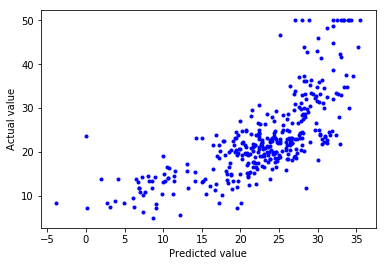

42.260311944177644
21.130155972088822


In [14]:
# ==========================Plotting hypothesis value vs actual value for train set===================
h = x_train.dot(theta.T)
plt.plot(h, y_train, 'b.')
plt.ylabel('Actual value')
plt.xlabel('Predicted value')
plt.show()

print(mean_squared_error(h, y_train))
print(cost_function(x_train, y_train, theta))

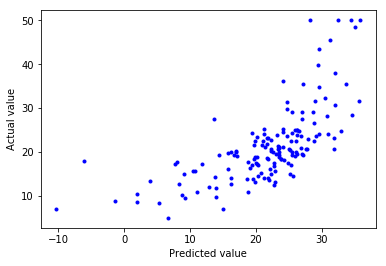

44.244799052967714
22.122399526483854


In [15]:
# ========================== Plotting hypothesis value vs actual value for test set =================

plt.plot(y_pred, y_test, 'b.')
plt.ylabel('Actual value')
plt.xlabel('Predicted value')
plt.show()

print(mean_squared_error(y_pred, y_test))
print(cost_function(x_test, y_test, theta))

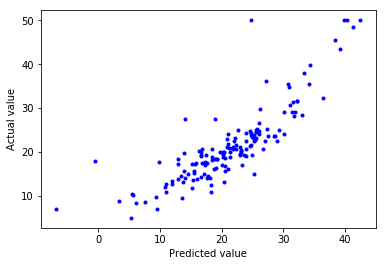

0.7109203586326183
21.540218943932437


In [16]:
# ======================== COMPARING WITH SKLEARN'S LINEAR REGRESSION MODEL =============================

lm = LinearRegression()
lm.fit(x_train, y_train)

y_predict = lm.predict(x_test)

plt.plot(y_predict, y_test, 'b.')
plt.ylabel('Actual value')
plt.xlabel('Predicted value')
plt.show()

print(lm.score(x_test, y_test))
print(mean_squared_error(y_test, y_predict))

### Comparing error acheived by our algorithm with the inbuilt library for linear regression, we see there is a difference between the models.